# __How does Human Land Use Shape the Insect Communities that Transmit Disease__

### __Import Libraries & Data__

In [1]:
# Import libraries
# Pre-processing
import pandas as pd
import os
import numpy as np
import datetime as dt
import warnings
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from matplotlib.patches import Patch

# Feature Selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost
import tensorflow

# Modelling
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score,  KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import TweedieRegressor
from sklearn.pipeline import make_pipeline
from math import sqrt
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Set working directory
os.chdir("/Users/celine.eymery/Documents/University of Manchester/Dissertation/Data")

In [3]:
# Import data for Nonglang (1000m radius)
nonglang1000 = pd.read_csv("Nonglang.csv")

# Import data for Nonglang (250m radius)
nonglang250 = pd.read_csv("Nonglang_250.csv")

# Import data for Nartiang (1000m radius)
nartiang1000 = pd.read_csv("Nartiang.csv")

# Import data for Nartiang (250m radius)
nartiang250 = pd.read_csv("Nartiang_250.csv")

### __Understanding the Data__

Nonglang and Nartiang are the areas where the data was collected. Main difference between the Nonglang1000 and Nonglang250, and Nartiang1000 and Nartiang250 is in the landscape data in the last few columns. One dataset reports the land cover within a 1000m radius, and the other reports the land cover within a 250m radius. I've only used the Nonglang1000 and Nartiang1000 datasets as an example in this 'Understanding the Data' section.

In [4]:
# Display the first few rows of nonglang1000
nonglang1000.head()

,Unnamed: 0,Collection No.,Date,Time,Village,House ID from Epi project,Name of Head of Household,Latitude,Longitude,Elevation,...,An. xui,An. splendidus,An. jamesii,geometry,rice,open_forest,closed_forest,plantation,village,bare_earth
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NKHY001,14/05/2019 00:00,15:58:00,Khyllemsangrin,Khyl049,Lamphrang Marwein,25°43.720,091°10.632,1015.0,...,NaN,NaN,NaN,POINT (-10705.864655825255 6834.178992340226),0.194975,0.289684,0.459543,0.023597,0.024852,0.007349
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NKHY002,14/05/2019 00:00,16:19:00,Khyllemsangrin,Khyl019,Spaidar Mawlieh,25°43.683,091°10.730,1006.0,...,NaN,NaN,NaN,POINT (-10542.019557271775 6765.731121903821),0.160528,0.307464,0.482421,0.029887,0.015093,0.004607
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display the first few rows of nartiang1000
nartiang1000.head()

,Unnamed: 0,Collection No.,Date,Time,Village,House ID from Epi project,Name of Head of Household,Latitude,Longitude,Elevation,...,An. kochi,An. sinensis,An. culicifacies,geometry,rice,open_forest,closed_forest,plantation,village,bare_earth
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NRBAM001,29/10/2019 00:00,03:10:00,Bambthong,Bamb154,Pran war,25°41.224,092°14.937,876.0,...,NaN,NaN,NaN,POINT (96873.34012872442 2574.6404156143212),0.128325,0.080071,0.672451,0.106640,0.006891,0.005622
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NRBAM002,29/10/2019 00:00,03:28:00,Bambthong,Bamb150,Ken phawa,25°41.148,092°14.873,889.0,...,NaN,NaN,NaN,POINT (96767.29208168725 2433.5379301328035),0.143967,0.082426,0.637071,0.122028,0.008460,0.006047
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Provide a summary of the information in the nonglang1000 dataframe
nonglang1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 82 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Unnamed: 0                                                                       398 non-null    float64
 1   Collection No.                                                                   398 non-null    object 
 2   Date                                                                             398 non-null    object 
 3   Time                                                                             398 non-null    object 
 4   Village                                                                          398 non-null    object 
 5   House ID from Epi project                                                        398 non-null    object 
 6   Name of He

In [7]:
# Generate a summary of the key statistics for numerical columns in nonglang1000
nonglang1000.describe()

,Unnamed: 0,Elevation,How many chickens?,How many cows/buffalos?,How many dogs?,How many goats?,How many pigs?,Number of Mosquitoes collected,An. maculatus,An. pseudowillmori,...,An. peditaeniatus,An. xui,An. splendidus,An. jamesii,rice,open_forest,closed_forest,plantation,village,bare_earth
count,398.000000,396.000000,208.000000,23.000000,99.000000,8.000000,124.000000,398.000000,54.000000,36.000000,...,3.0,2.0,3.000000,4.0,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,201.585427,1069.724747,5.687500,2.391304,1.343434,1.875000,1.241935,1.032663,2.259259,1.638889,...,1.0,1.0,2.333333,1.0,0.240403,0.322136,0.371135,0.025474,0.030810,0.010041
std,117.305975,106.891581,5.207152,2.147708,0.625343,0.834523,0.714211,3.432903,2.934410,1.073120,...,0.0,0.0,2.309401,0.0,0.079851,0.065110,0.122165,0.021195,0.016820,0.006021
min,0.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.0,1.0,1.000000,1.0,0.064202,0.197600,0.156571,0.000473,0.000551,0.000100
25%,100.250000,979.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.0,1.0,1.000000,1.0,0.173791,0.259094,0.257242,0.013301,0.020161,0.006430
50%,201.500000,1101.000000,4.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,...,1.0,1.0,1.000000,1.0,0.241386,0.317749,0.396254,0.019731,0.030405,0.009064
75%,300.750000,1160.000000,8.000000,2.000000,2.000000,2.250000,1.000000,1.000000,2.000000,2.000000,...,1.0,1.0,3.000000,1.0,0.305784,0.362928,0.470276,0.028658,0.043894,0.015299
max,407.000000,1286.000000,34.000000,11.000000,3.000000,3.000000,5.000000,38.000000,17.000000,5.000000,...,1.0,1.0,5.000000,1.0,0.387430,0.472533,0.676146,0.141612,0.067064,0.024735


## __Data Pre-Processing__

Here, essential data preprocessing steps are carried out to establish consistency, cleanliness, and enhanced readability across the datasets. The main objective is to prepare the datasets for subsequent analysis and processing, ensuring that the data is in a standardised and uniform format. This process is crucial for accurate insights and reliable results.

The preprocess_dataset function was created to clean the datasets. It involved a series of important operartions to refine the datas structure:
1. It first replaces any empty strings found in the dataset with NaN values. This uniform handling of missing data ensures that the subsequent analysis is not skewed by irregularities in the data.
2. Leading and trailing whitespace is removed from both data entries and column headers. This step is important in preventing any unintended spacing issues that could impact the data's integrity.
3. It replaces any spaces in column names with underscores. Thus creates consistent and standardized column labels that are more conducive to streamlined analysis.

The transform_columns function was designed to refine the datasets content:
1. It applies lowercase conversion to all column entries (excluding the 'Collection_No.' column). Thus ensures a uniform and consistent format throughout the dataset, enhancing the overall readability of the data.
2. For the 'Collection_No.' column, it converts all entries to uppercase to ensure clarity and consistency.

In [8]:
# Create a function that removes unneccesary whitespace from the dataset, and infills word spacing in columns 
# with underscores
def preprocess_dataset(df):
    # Replace empty strings with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)
    # Remove leading and trailing whitespace from the whole dataset
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    # Remove leading and trailing whitespace from column headers
    df.columns = df.columns.str.strip()
    # Replace spaces in column names with underscores
    df.columns = df.columns.str.replace(' ', '_')
    return df

# Create a function that turns all column entries into lowercase to improve readability, except for the 
# 'Collection_No.' column which is converted to uppercase
def transform_columns(dataset, exclude_column):
    for col in dataset.columns:
        if col != exclude_column:
            if dataset[col].dtype == 'object':
                dataset[col] = dataset[col].str.lower()
        else:
            # Transform the 'Collection_No.' column to uppercase for consistency
            if dataset[col].dtype == 'object':
                dataset[col] = dataset[col].str.upper()

# Apply the preprocessing function to each dataset
nonglang1000 = preprocess_dataset(nonglang1000)
nonglang250 = preprocess_dataset(nonglang250)
nartiang1000 = preprocess_dataset(nartiang1000)
nartiang250 = preprocess_dataset(nartiang250)

# Apply the transformation function to each dataset 
transform_columns(nonglang1000, 'Collection_No.')
transform_columns(nonglang250, 'Collection_No.')
transform_columns(nartiang1000, 'Collection_No.')
transform_columns(nartiang250, 'Collection_No.')

In [9]:
# Check for missing values within the four datasets
print('NaN values in nonglang1000\n', nonglang1000.isnull().sum())
print('NaN values in nonglang250\n',nonglang250.isnull().sum())
print('NaN values in nartiang1000\n', nartiang1000.isnull().sum())
print('NaN values in nartiang250\n',nartiang250.isnull().sum())

NaN values in nonglang1000
 Unnamed:_0        398
Collection_No.    398
Date              398
Time              398
Village           398
                 ... 
open_forest       398
closed_forest     398
plantation        398
village           398
bare_earth        398
Length: 82, dtype: int64
NaN values in nonglang250
 Unnamed:_0        408
Collection_No.    408
Date              408
Time              408
Village           408
                 ... 
open_forest       408
closed_forest     408
plantation        408
village           408
bare_earth        408
Length: 82, dtype: int64
NaN values in nartiang1000
 Unnamed:_0        665
Collection_No.    665
Date              665
Time              665
Village           665
                 ... 
open_forest       665
closed_forest     665
plantation        665
village           665
bare_earth        665
Length: 110, dtype: int64
NaN values in nartiang250
 Unnamed:_0        665
Collection_No.    665
Date              665
Time              665


### __Remove Irrelevant Columns__

The following code serves as a purpose for refining our datasets by removing columns that do not contribute to our analysis objectives, or contain empty values. To achieve this, two lists, 'remove_col_nonglang' and 'remove_col_nartiang', were created to encapsulate the column names that are deemed irrelevant. These include columns containing information like household names, vector stages, trap types, and  other attributes that were identified as unnecessary for the analysis.

By leveraging the _drop_ method, we effectively eliminate these columns from their respective datasets, thus streamlining and optimising our data. This process not only reduces computational complexity but also enhances the quality of our data analysis and modeling. The outcome is datasets that are more focused, coherent, and aligned with our research objectives.

In [10]:
# Remove columns from the Nonglang datasets
remove_col_nonglang = [ 'Unnamed:_0', # Deemed unneccessary for analysis
                     'Name_of_Head_of_Household', # Deemed unneccessary for analysis 
                     'geometry',  # Deemed unneccessary for analysis
                     'Vector_stage',  # Deemed unneccessary for analysis, all were 'Adult'
                     'Collection_type', # Deemed unneccessary for analysis, all were 'Trap'
                     'Type_of_trap', # Deemed unneccessary for analysis, all were 'Light trap' except two which were 'Bait trap'
                     'Light_trap_location', # Deemed unneccessary for analysis, all were 'Outdoor', except one
                     'Bait_trap_location',# Deemed unneccessary for analysis now that 'Type of trap' is removed
                     'Specify_cultivated_field_type', # Only has two entries, the rest are MVs
                     'An._nivipes', # Empty column
                     'An._philippinensis', # Empty column
                     'Specify_other_type_of_standing_water_container'] # Deemed unneccessary for analysis, unclear what it means
                     

nonglang1000 = nonglang1000.drop(columns=remove_col_nonglang)
nonglang250 =  nonglang250.drop(columns=remove_col_nonglang)

# Remove irrelevant columns from the Nartiang datasets
remove_col_nartiang = ['Unnamed:_0', # Deemed unneccessary for analysis
                     'Name_of_Head_of_Household', # Deemed unneccessary for analysis 
                     'geometry',  # Deemed unneccessary for analysis
                     'Vector_stage',  # Deemed unneccessary for analysis, all were 'Adult'
                     'Collection_type', # Deemed unneccessary for analysis, all were 'Trap'
                     'Type_of_trap', # Deemed unneccessary for analysis, all were 'Light trap' 
                     'Light_trap_location', # Deemed unneccessary for analysis, all were 'Outdoor'
                     'Bait_trap_location',# Deemed unneccessary for analysis now that 'Type of trap' is removed
                     'Specify_other_trap_type', # Empty column
                     'Specify_cultivated_field_type', # Only has two entries, the rest are MVs 
                     'Specify_other_building_material', # Deemed unneccesary for analysis as not in Nonglang datasets
                     'Specify_other_roof_type', # Deemed unneccessary for analysis as not in Nonglang datasets
                     'Name_of_other_collector',  # Deemed unneccessary for analysis
                     'Resting_collection_place',  # Empty column
                     'Specify_other_resting_collection_place', # Empty column
                     'Biting/landing_host', # Empty column
                     'Animal_host', # Empty column
                     'Other_trap_location', # Empty column
                     'Duration_of_aspiration_(minutes)', # Empty column
                     'Light_trap_deployed_on_previous_night?', # Empty column
                     'Specify_other_environment', # Empty column
                     'An._willmori', # Empty column
                     'An._philippinensis', # Empty column
                     'An._xui',# Empty column
                     'An._splendidus', # Empty column
                     'Collector(s)_(choice=Alman)',  # Deemed unneccessary for analysis
                     'Collector(s)_(choice=Baiaineh)',  # Deemed unneccessary for analysis
                     'Specify_other_repellent.1',  # Deemed unneccessary for analysis
                     'Collector(s)_(choice=Fourness)',  # Deemed unneccessary for analysis
                     'Collector(s)_(choice=Zach)',  # Deemed unneccessary for analysis
                     'Collector(s)_(choice=Oling)',  # Deemed unneccessary for analysis
                     'Collector(s)_(choice=Other)',  # Deemed unneccessary for analysis
                     'Organisation',  # Deemed unneccessary for analysis
                     'Specify_other_repellent',  # Deemed unneccessary for analysis, not in Nonglang datasets, and mostly MVs with only 2 entries
                     'Specify_other_type_of_standing_water_container']  # Deemed unneccessary for analysis


nartiang1000 = nartiang1000.drop(columns=remove_col_nartiang)
nartiang250 = nartiang250.drop(columns=remove_col_nartiang)

### __Rename Columns__

The code below demonstrates the implementation of a custom function named 'rename_columns'. This function is applied to the datasets. The primary objective of this function is to enhance the readability and clarity of these datasets by modifying the names of specific columns.

In [11]:
# Define a function to rename specified columns
def rename_columns(df):
    return df.rename(columns={
    'Collection_No.': 'Collection_ID',
    'House_ID_from_Epi_project': 'House_ID',
    'Building_material_used_for_walls_of_the_house': 'Building_Material',
    'Type_of_roof_of_the_house': 'Roof_Type',
    'Does_the_house_have_an_open_eaves_(space_between_top_of_wall_and_roof)?': 'Open_Eaves',
    'Any_containers_with_standing_water_around_the_house?_(choice=Cistern_outside)': 'Standing_Water_Cistern_Outside',
    'Any_containers_with_standing_water_around_the_house?_(choice=Cistern_inside)': 'Standing_Water_Cistern_Inside',
    'Any_containers_with_standing_water_around_the_house?_(choice=Plastic_container)': 'Standing_Water_Plastic_Container',
    'Any_containers_with_standing_water_around_the_house?_(choice=Tin_can)': 'Standing_Water_Tin_Can',
    'Any_containers_with_standing_water_around_the_house?_(choice=Other)': 'Standing_Water_Other_Container',
    'Any_animals_nearby_at_time_of_collection?': 'Animals_Nearby',
    'What_type?_(choice=Chicken)': 'Animal_Type_Chicken',
    'What_type?_(choice=Cow/Buffalo)': 'Animal_Type_Cattle',
    'What_type?_(choice=Dog)': 'Animal_Type_Dog',
    'What_type?_(choice=Goat)': 'Animal_Type_Goat',
    'What_type?_(choice=Pig)': 'Animal_Type_Pig',
    'What_type?_(choice=Other)': 'Animal_Type_Other',
    'How_many_chickens?': 'Chicken_Count',
    'How_many_cows/buffalos?': 'Cattle_Count',
    'How_many_dogs?': 'Dog_Count',
    'How_many_goats?': 'Goat_Count',
    'How_many_pigs?': 'Pig_Count',
    'How_many_other_animals?': 'Other_Animal_Count',
    'Distance_of_chickens_from_collection_site': 'Chicken_Distance',
    'Distance_of_cows/buffalos_from_collection_site': 'Cattle_Distance',
    'Distance_of_dogs_from_collection_site': 'Dog_Distance',
    'Distance_of_goats_from_collection_site': 'Goat_Distance',
    'Distance_of_pigs_from_collection_site': 'Pig_Distance',
    'Distance_of_others_from_collection_site': 'Other_Animal_Distance',
    'Did_you_sleep_under_and_ITN_last_night?': 'Slept_under_ITN_LN',
    'Did_you_use_a_repellent_last_night?': 'Used_Repellent_LN',
    "Which_type_of_repellent?_(choice=Coil)": "Repellent_Type_Coil_LN",
    "Which_type_of_repellent?_(choice=Cream)": "Repellent_Type_Cream_LN",
    "Which_type_of_repellent?_(choice=Mat)": "Repellent_Type_Mat_LN",
    "Which_type_of_repellent?_(choice=Spray)": "Repellent_Type_Spray_LN",
    "Which_type_of_repellent?_(choice=Vaporizer)": "Repellent_Type_Vaporizer_LN",
    "Which_type_of_repellent?_(choice=Other)": "Repellent_Type_Other_LN",
    "Did_you_use_a_repellent_on_collection_night?": "Used_Repellent_CN",
    "Which_type_of_repellent?_(choice=Coil).1": "Repellent_Type_Coil_CN",
    "Which_type_of_repellent?_(choice=Cream).1": "Repellent_Type_Cream_CN",
    "Which_type_of_repellent?_(choice=Mat).1": "Repellent_Type_Mat_CN",
    "Which_type_of_repellent?_(choice=Spray).1": "Repellent_Type_Spray_CN",
    "Which_type_of_repellent?_(choice=Vaporizer).1": "Repellent_Type_Vaporizer_CN",
    "Which_type_of_repellent?_(choice=Other).1": "Repellent_Type_Other_CN",
    "Number_of_Mosquitoes_collected": "Mosquito_Count",
    }, inplace=True)

# Use the function on each dataset
rename_columns(nonglang1000)
rename_columns(nonglang250)
rename_columns(nartiang1000)
rename_columns(nartiang250)


### __Remove Missing Rows__

In this code, the 'remove_empty_rows' function is designed to eliminate rows from a given DataFrame that contain only missing values (NaNs). The function takes a DataFrame as input and returns a modified DataFrame with empty rows removed while ensuring the index is reset for consistent indexing.

In [12]:
# Create a function to remove missing rows
def remove_empty_rows(df):
    # Drop rows where all values are missing
    df = df.dropna(how='all')
    # Reset the index to ensure sequential order
    df = df.reset_index(drop=True)
    return df

# Apply the function to each dataset
nonglang1000 = remove_empty_rows(nonglang1000)
nonglang250 = remove_empty_rows(nonglang250)
nartiang1000 = remove_empty_rows(nartiang1000)
nartiang250 = remove_empty_rows(nartiang250)






### Fixing Spelling Errors in 'House_ID' Column

In this code, two functions, preprocess_nonglang_house_id and preprocess_nartiang_house_id, are defined to preprocess the 'House_ID' column in the Nonglang and Nartiang datasets, respectively. These functions carry out various steps, such as stripping whitespace, converting to lowercase, handling inconsistent values, removing invalid rows, and ensuring consistent indexing. These operations aim to standardise and clean the 'House_ID' column, ensuring consistency, readability, and accuracy for further analysis and processing.

In [13]:
# Create a function that cleans the 'House_ID' column in the nonglang datasets
def preprocess_nonglang_house_id(df):
    house_id = df['House_ID']
    house_id = house_id.str.strip()
    house_id = house_id.astype(str).str.lower()
    df['House_ID'] = df['House_ID'].replace({'khy': 'khyl', 'Krina': 'Krian', 'Lan': 'Lang'}, regex=True)
    df['House_ID'] = house_id
    df = df[df['House_ID'].astype(str).str.contains('\d', na=False)]
    df = df.reset_index(drop=True)
    house_id = df['House_ID']
    house_id = house_id.apply(lambda x: '0' + x if isinstance(x, str) and x.isdigit() and len(x) == 2 else x)
    df['House_ID'] = house_id
    return df

# Apply the 'preprocess_nonglang_house_id' function to the nonglang datasets
nonglang1000 = preprocess_nonglang_house_id(nonglang1000)
nonglang250 = preprocess_nonglang_house_id(nonglang250)

# Create a function that cleans the 'House_ID' column in the nartiang datasets
def preprocess_nartiang_house_id(df):
    house_id = df['House_ID']
    house_id = house_id.str.strip()
    house_id = house_id.astype(str).str.lower()
    df['House_ID'] = df['House_ID'].replace({'bamb': 'bam'}, regex=True)
    df['House_ID'] = house_id
    df = df[df['House_ID'].astype(str).str.contains('\d', na=False)]
    df = df.reset_index(drop=True)
    house_id = df['House_ID']
    house_id = house_id.apply(lambda x: '0' + x if isinstance(x, str) and x.isdigit() and len(x) == 2 else x)
    df['House_ID'] = house_id
    return df

# Apply the 'preprocess_nartiang_house_id' function to the nartiang datasets
nartiang250 = preprocess_nartiang_house_id(nartiang250)
nartiang1000 = preprocess_nartiang_house_id(nartiang1000)

### __Replace Missing Values with 0__

This code segment uses zero imputation to address MVs within specific columns of the datasets. The columns subject to imputation are specified in the 'cols_to_fillna' list. The code proceeds as follows:

1. The 'cols_to_fillna' list names the columns targeted for missing value replacement with 0. These columns pertain to animal counts and mosquito types.

2. For each dataset the code iterates through the 'cols_to_fillna' list.

3. During each iteration, the code employs the 'fillna(0)' method. This technique replaces any absent or missing values in the specified column with a value of 0.

4. The outcome of this process is that the designated columns within the datasets are standardised with 0 for missing values. Consequently, these columns exhibit a consistent representation, allowing seamless analysis and computations that involve them.

By adopting this zero imputation strategy, the code ensures uniformity in treating missing values as 0. This approach fosters accurate interpretation and computation of the data, enhancing data quality and coherence.

In [14]:
# Create a list of columns to replace MVs with 0 in the nonglang datasets
cols_to_fillna = [
    'Chicken_Count',
    'Cattle_Count',
    'Dog_Count',
    'Goat_Count',
    'Pig_Count',
    'Other_Animal_Count',
    'An._maculatus',
    'An._pseudowillmori',
    'An._willmori',
    'An._jeyporiensis',
    'An._annularis',
    'An._nitidus',
    'An._peditaeniatus',
    'An._xui',
    'An._splendidus',
    'An._jamesii'
]

# Replace missing values with 0 for the specified columns in the nonglang1000 dataset
for col in cols_to_fillna:
    nonglang1000[col] = nonglang1000[col].fillna(0)

# Replace missing values with 0 for the specified columns in nonglang250 dataset
for col in cols_to_fillna:
    nonglang250[col] = nonglang250[col].fillna(0)

In [15]:
# Create a list of columns to replace MVs with 0 in the nartiang datasets
cols_to_fillna = [
    'Chicken_Count',
    'Cattle_Count',
    'Dog_Count',
    'Goat_Count',
    'Pig_Count',
    'Other_Animal_Count',
    'An._maculatus',
    'An._pseudowillmori',
    'An._jeyporiensis',
    'An._annularis',
    'An._nitidus',
    'An._peditaeniatus',
    'An._jamesii',
    'An._nivipes',
    'An._dissidens',
    'An._minimus',
    'An._kochi',
    'An._sinensis',
    'An._culicifacies',
]

# Replace missing values with 0 for the specified columns in the nartiang1000 dataset
for col in cols_to_fillna:
    nartiang1000[col] = nartiang1000[col].fillna(0)

# Replace missing values with 0 for the specified columns in nartiang250 dataset
for col in cols_to_fillna:
    nartiang250[col] = nartiang250[col].fillna(0)

### __Data Type Conversion: Categorical Encoding__

The code below introduces a function called 'replace_values' which replaces specific values in a DataFrame with their designated replacements. The function is applied to four datasets, transforming categorical variables into numerical ones. For instance, 'unchecked' becomes '0', 'checked' becomes '1', 'no' becomes '0', 'yes' becomes '1', 'false' becomes '0', and 'true' becomes '1'. This encoding simplifies the data for further analysis, especially for tasks like machine learning. The transformed datasets, 'nonglang1000', 'nonglang250', 'nartiang1000', and 'nartiang250', now contain numerical representations of categorical variables, enhancing their usability for various analytical purposes.

In [16]:
# Create a function that replaces specified values in the dataset
def replace_values(df, replacements):
    df = df.replace(replacements)
    return df

# Create a dictionary of value replacements
replacements = {"unchecked": 0, "checked": 1, "no": 0, "yes": 1, "false":0, "true":1}

# Apply value replacements to each dataset
nonglang1000 = replace_values(nonglang1000, replacements)
nonglang250 = replace_values(nonglang250, replacements)
nartiang1000 = replace_values(nartiang1000, replacements)
nartiang250 = replace_values(nartiang250, replacements)

### __Data Type Conversion: Date-Time__

The 'preprocess_datetime' function in the code snippet below is designed to create a new 'DateTime' column by combining the 'Date' and 'Time' columns, transforming them into a single datetime format. This consolidated datetime information is more useful for time-series analysis. The function reorganises the DataFrame by moving the newly created 'DateTime' column to the third position. The 'Date' and 'Time' columns are then removed to streamline the dataset.

In [17]:
def preprocess_datetime(df):
    # Add a new column combining 'Date' and 'Time' columns
    df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
    # Get a list of all the columns
    cols = list(df.columns)
    # Move 'Datetime' to index 2 (third position), while retaining the order of other columns
    cols.insert(3, cols.pop(cols.index('DateTime')))
    # Reindex the DataFrame with the new column order
    df = df.reindex(columns=cols)
    # Remove 'Date' and 'Time' columns
    df = df.drop(["Date", "Time"], axis=1)
    return df

# Apply the preprocessing function to each dataset
nonglang1000 = preprocess_datetime(nonglang1000)
nonglang250 = preprocess_datetime(nonglang250)
nartiang1000 = preprocess_datetime(nartiang1000)
nartiang250 = preprocess_datetime(nartiang250)

### __Data Type Conversion: Float to Integer__

This code performs column data type conversion for specific columns within the 'nonglang' and 'nartiang' datasets. It defines two separate functions: 'convert_nonglang_columns_to_integer' and 'convert_nartiang_columns_to_integer'. These functions iterate over specified columns in their respective datasets and convert the values from float type to integer type. This conversion process is accompanied by filling any missing values with zeros. The columns intended for conversion are listed for each dataset, addressing variables related to elevation, repellent usage, animal counts, mosquito types, and more. The applied data type conversion ensures that these columns are represented as integers for further analysis and calculations.

In [18]:
# Define function that converts columns from float type to integer type for the nonglang datasets
def convert_nonglang_columns_to_integer(df, columns):
    for col in columns:
        df[col] = df[col].fillna(0.0).astype(int)
    return df

# Columns to convert to integer type for nonglang datasets
cols_to_convert1 = [
    'Elevation',
    'Open_Eaves',
    'Animals_Nearby',
    'Chicken_Count',
    'Cattle_Count',
    'Dog_Count',
    'Pig_Count',
    'Goat_Count',
    'Open_Eaves',
    'Used_Repellent_LN',
    'Used_Repellent_CN',
    'Repellent_Type_Coil_LN',
    'Repellent_Type_Cream_LN',
    'Repellent_Type_Mat_LN',
    'Repellent_Type_Spray_LN',
    'Repellent_Type_Vaporizer_LN',
    'Repellent_Type_Other_LN',
    'Repellent_Type_Coil_CN',
    'Repellent_Type_Cream_CN',
    'Repellent_Type_Mat_CN',
    'Repellent_Type_Spray_CN',
    'Repellent_Type_Vaporizer_CN',
    'Repellent_Type_Other_CN',
    'Mosquito_Count',
    'An._maculatus',
    'An._pseudowillmori',
    'An._willmori',
    'An._jeyporiensis',
    'An._annularis',
    'An._nitidus',
    'An._peditaeniatus',
    'An._xui',
    'An._splendidus',
    'An._jamesii',
]

# Apply the conversion function to nonglang datasets
nonglang1000 = convert_nonglang_columns_to_integer(nonglang1000, cols_to_convert1)
nonglang250 = convert_nonglang_columns_to_integer(nonglang250, cols_to_convert1)

# Define a function that converts specified columns from float to integer type for the nartiang datasets
def convert_nartiang_columns_to_integer(df, columns):
    for col in columns:
        df[col] = df[col].fillna(0.0).astype(int)
    return df

# Columns to convert to integer type for nartiang datasets
cols_to_convert2 = [
    'Elevation',
    'Open_Eaves',
    'Used_Repellent_LN',
    'Animals_Nearby',
    'Chicken_Count',
    'Cattle_Count',
    'Dog_Count',
    'Pig_Count',
    'Goat_Count',
    'Open_Eaves',
    'Used_Repellent_LN',
    'Used_Repellent_CN',
    'Repellent_Type_Coil_LN',
    'Repellent_Type_Cream_LN',
    'Repellent_Type_Mat_LN',
    'Repellent_Type_Spray_LN',
    'Repellent_Type_Vaporizer_LN',
    'Repellent_Type_Other_LN',
    'Repellent_Type_Coil_CN',
    'Repellent_Type_Cream_CN',
    'Repellent_Type_Mat_CN',
    'Repellent_Type_Spray_CN',
    'Repellent_Type_Vaporizer_CN',
    'Repellent_Type_Other_CN',
    'Mosquito_Count',
    'An._maculatus',
    'An._pseudowillmori',
    'An._jeyporiensis',
    'An._nivipes',
    'An._annularis',
    'An._nitidus',
    'An._peditaeniatus',
    'An._jamesii',
    'An._nivipes',
    'An._dissidens',
    'An._minimus',
    'An._kochi',
    'An._sinensis',
    'An._culicifacies'
]

# Apply the conversion function to nartiang datasets
nartiang1000 = convert_nartiang_columns_to_integer(nartiang1000, cols_to_convert2)
nartiang250 = convert_nartiang_columns_to_integer(nartiang250, cols_to_convert2)

### __Data Type Conversion: Animal Columns__

The code snippet defines a process to clean up and standardise distance values in specified columns across multiple datasets. The columns containing animal distances are listed in 'col_names'. A function called 'clean_distance_column' is created to clean up these distance values. The function removes non-numeric characters ('within' and 'm'), trims leading/trailing spaces, and converts the cleaned values to numeric format, handling invalid entries by setting them to NaN. The 'clean_distance_column' function is then applied to each dataset and column in the 'col_names' list using nested loops. This process ensures that the distance values in the specified columns across all datasets are consistently formatted, improving data quality for subsequent analysis or modeling.

In [19]:
# Define the datasets
datasets = {'nonglang1000': nonglang1000, 'nonglang250': nonglang250, 'nartiang1000': nartiang1000, 'nartiang250': nartiang250}

# List of column names representing animal distances
col_names = ['Chicken_Distance', 'Cattle_Distance', 'Dog_Distance', 'Goat_Distance', 'Pig_Distance', 'Other_Animal_Distance']

# Define a function to clean up the distance values in the specified columns
def clean_distance_column(df, col_name):
    # Remove 'within', 'm', and leading/trailing spaces from the distance values
    df[col_name] = df[col_name].astype(str).str.replace('within', '').str.replace('m', '').str.strip()
    # Convert cleaned distance values to numeric, handling errors by setting invalid entries to NaN
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

# Apply the clean_distance_column function to each dataset
for dataset_name, dataset in datasets.items():
    for col in col_names:
        clean_distance_column(dataset, col)

The provided code snippet performs a series of data transformations on the 'Other_Animal_Count' column in the datasets ('nonglang1000', 'nonglang250', 'nartiang1000', and 'nartiang250'). This column initially contains information about various animal types and their respective counts. The code aims to improve data structure, analysis efficiency, and facilitate further exploration of animal-related data.   

First, the code cleans the 'Other_Animal_Count' column by removing leading/trailing whitespaces and converting the data to lowercase. It then replaces written numbers with digits using a predefined mapping dictionary. MVs are filled with empty strings, and the column is split into separate 'animal_count' and 'animal_type' columns. Next, the code creates specific columns for each unique animal type found in the 'animal_type' column. For each animal type, two new columns are generated: 'Animal_Type_[Animal]' (indicating the presence or absence of the animal in the row) and '[Animal]_Count'_ (providing the count of that animal in the row). Additionally, distance columns are created for each animal type based on the 'Other_Animal_Distance' column. 

Afterwards, intermediate and unnecessary columns are dropped from the dataset to maintain a cleaner and more concise structure. This includes removing columns like 'animal_type', 'animal_count', 'Animal_Type_0', '0_Count', '0_Distance', 'Other_Animal_Count', 'Other_Animal_Distance', and 'Animal_Type_...'. Furthermore, columns beginning with 'Animal_Type' are also dropped.  

The data transformation performed by the code enhances the dataset by creating separate columns for each unique animal type and its associated count and distance. This restructuring allows for easier analysis, filtering, and comparison of animal-related data. It provides a more structured and granular representation, enabling researchers to gain insights and conduct detailed investigations into the presence, counts, and distances of different animal types in the datasets.

In [20]:
def process_other_animal_columns(df):
    # Remove leading/trailing whitespaces
    df['Other_Animal_Count'] = df['Other_Animal_Count'].str.strip()  
     # Convert to lowercase
    df['Other_Animal_Count'] = df['Other_Animal_Count'].str.lower()
    # Replace written numbers with digits
    num_mapping = {"one": "1", "two": "2", "three": "3"}
    for key, value in num_mapping.items():
        df['Other_Animal_Count'] = df['Other_Animal_Count'].str.replace(key, value)
    # Fill missing values with an empty string
    df['Other_Animal_Count'].fillna("", inplace=True)
    # Split count and animal type into separate columns
    df['animal_count'] = df['Other_Animal_Count'].apply(lambda x: x.split(' ')[0] if len(x.split(' ')) > 1 else '0')
    df['animal_type'] = df['Other_Animal_Count'].apply(lambda x: x.split(' ')[1] if len(x.split(' ')) > 1 else None)
    # Convert animal_count to numeric
    df['animal_count'] = pd.to_numeric(df['animal_count'], errors='coerce')
    # Handle missing values in 'animal_type'
    df['animal_type'].fillna('0', inplace=True)
    # Identify unique animal types
    animal_types = set(df['animal_type'])
    # Iterate over all unique animal types
    for animal in animal_types:
        # Functions to check if 'animal' is present in the row
        def check_animal(row):
            if animal in row:
                return 1
            else:
                return 0
        # Function to count the number of 'animal'
        def count_animal(row):
            if row['animal_type'] == animal:
                return row['animal_count']
            else:
                return 0
        # Create new columns for each animal
        df['Animal_Type_{}'.format(animal.capitalize())] = df['animal_type'].apply(check_animal)
        df['{}_Count'.format(animal.capitalize())] = df.apply(count_animal, axis=1)
        df['{}_Distance'.format(animal.capitalize())] = df['Other_Animal_Distance'].where(df['Animal_Type_{}'.format(animal.capitalize())] == 1, np.nan)
    # Remove intermediate columns
    df = df.drop(columns=['animal_type', 'animal_count'])
    # Remove unnecessary columns
    df = df.drop(columns=['Animal_Type_0', '0_Count', '0_Distance', 'Other_Animal_Count', 'Other_Animal_Distance'])
    # Drop columns beginning with 'Animal_Type'
    cols_to_drop = df.filter(regex='^Animal_Type.*').columns
    df = df.drop(columns=cols_to_drop)
    return df

# Apply the function to the datasets
nonglang1000 = process_other_animal_columns(nonglang1000)
nonglang250 = process_other_animal_columns(nonglang250)
nartiang1000 = process_other_animal_columns(nartiang1000)
nartiang250 = process_other_animal_columns(nartiang250)

### __Data Type Conversion: Latitude and Longitude columns from Degrees and Decimal Minutes (DDM) format to Decimal Degrees (DD) format__

The purpose of this code is to transform latitude and longitude coordinates from DDM format to DD format, which is a more commonly used and standardised format for geolocation data. The conversion enables easier and more consistent analysis, visualization, and comparison of spatial information in the datasets. The code ensures that the converted latitude and longitude values are correctly assigned  to the respective columns and retains the original order of other columns in the DataFrame.

In [21]:
# Define a function that converts DDM to DD format
def ddm_to_dd(degrees, minutes):
    return degrees + minutes/60

# Define a function to avoid repeated code
def convert_and_rename(df):
    # Split degrees and minutes for Latitude and Longitude columns
    latitude_degrees = df['Latitude'].str.extract(r'(\d+)°', expand=False).astype(float)
    latitude_minutes = df['Latitude'].str.extract(r'°(\d+\.\d+)', expand=False).astype(float)
    longitude_degrees = df['Longitude'].str.extract(r'(\d+)°', expand=False).astype(float)
    longitude_minutes = df['Longitude'].str.extract(r'°(\d+\.\d+)', expand=False).astype(float)

    # Convert to decimal degrees
    df['Latitude_DD'] = ddm_to_dd(latitude_degrees, latitude_minutes)
    df['Longitude_DD'] = ddm_to_dd(longitude_degrees, longitude_minutes)

    # Adjust longitude values to be negative
    df.loc[df['Longitude'].str.contains('W'), 'Longitude_DD'] *= -1

    # Drop the original 'Latitude' and 'Longitude' columns
    df = df.drop(['Latitude', 'Longitude'], axis=1)

    # Rename 'Latitude_DD' and 'Longitude_DD' to 'Latitude' and 'Longitude'
    df = df.rename(columns={'Latitude_DD': 'Latitude', 'Longitude_DD': 'Longitude'})

    # Get a list of all the columns
    cols = list(df.columns)
    # Move 'Latitude' and 'Longitude' to index 3 and 4 (fourth and fifth positions), while retaining the order of 
    # other columns
    cols.insert(3, cols.pop(cols.index('Latitude')))
    cols.insert(4, cols.pop(cols.index('Longitude')))
    # Reindex the DataFrame with the new column order
    df = df.reindex(columns=cols)
    
    return df

# Apply function to each dataframe
nonglang1000 = convert_and_rename(nonglang1000)
nonglang250 = convert_and_rename(nonglang250)
nartiang1000 = convert_and_rename(nartiang1000)
nartiang250 = convert_and_rename(nartiang250)

### __One-Hot Encoding__

In order to perform statistical analysis or machine learning one must convert the categorical names into numerical representations. One-hot encoding is a technique used to represent categorical variables as binary vectors. It converts categorical data into a numerical format suitable for machine learning algorithms. By creating new binary columns for each category, it preserves the categorical information without assuming any order or hierarchy. One-hot encoding expands the feature space, providing more detailed information to the model and potentially improving its performance. It enables the use of various machine learning algorithms that require numerical inputs. Overall, one-hot encoding is a valuable tool for handling categorical data, facilitating accurate predictions and enhancing the capabilities of machine learning models.

In [22]:
def one_hot_encode_columns(df, columns):
    df = pd.get_dummies(df, columns=columns)
    return df

# One-hot encoding of village names
village_cols = ['Village']
nonglang1000 = one_hot_encode_columns(nonglang1000, village_cols)
nonglang250 = one_hot_encode_columns(nonglang250, village_cols)
nartiang1000 = one_hot_encode_columns(nartiang1000, village_cols)
nartiang250 = one_hot_encode_columns(nartiang250, village_cols)

# One-hot encoding of 'Household'
nartiang1000['Household'].fillna('unknown', inplace=True)
nartiang250['Household'].fillna('unknown', inplace=True)
household_cols = ['Household']
nartiang1000 = one_hot_encode_columns(nartiang1000, household_cols)
nartiang250 = one_hot_encode_columns(nartiang250, household_cols)

# One-hot encoding of house building materials
building_material_cols = ['Building_Material']
nonglang1000 = one_hot_encode_columns(nonglang1000, building_material_cols)
nonglang250 = one_hot_encode_columns(nonglang250, building_material_cols)
nartiang1000 = one_hot_encode_columns(nartiang1000, building_material_cols)
nartiang250 = one_hot_encode_columns(nartiang250, building_material_cols)

# One-hot encoding of 'Roof_Type'
roof_type_cols = ['Roof_Type']
nonglang1000 = one_hot_encode_columns(nonglang1000, roof_type_cols)
nonglang250 = one_hot_encode_columns(nonglang250, roof_type_cols)
nartiang1000 = one_hot_encode_columns(nartiang1000, roof_type_cols)
nartiang250 = one_hot_encode_columns(nartiang250, roof_type_cols)

# One-hot encoding of 'Terrain'
terrain_cols = ['Terrain']
nonglang1000 = one_hot_encode_columns(nonglang1000, terrain_cols)
nonglang250 = one_hot_encode_columns(nonglang250, terrain_cols)
nartiang1000 = one_hot_encode_columns(nartiang1000, terrain_cols)
nartiang250 = one_hot_encode_columns(nartiang250, terrain_cols)

# One-hot encoding of 'Sky'
sky_cols = ['Sky']
nonglang1000 = one_hot_encode_columns(nonglang1000, sky_cols)
nonglang250 = one_hot_encode_columns(nonglang250, sky_cols)
nartiang1000 = one_hot_encode_columns(nartiang1000, sky_cols)
nartiang250 = one_hot_encode_columns(nartiang250, sky_cols)

# One-hot encoding of 'Environment'
environment_cols = ['Environment']
nonglang1000 = one_hot_encode_columns(nonglang1000, environment_cols)
nonglang250 = one_hot_encode_columns(nonglang250, environment_cols)
nartiang1000 = one_hot_encode_columns(nartiang1000, environment_cols)
nartiang250 = one_hot_encode_columns(nartiang250, environment_cols)

# One-hot encoding of 'Wind'
wind_cols = ['Wind']
nonglang1000 = one_hot_encode_columns(nonglang1000, wind_cols)
nonglang250 = one_hot_encode_columns(nonglang250, wind_cols)
nartiang1000 = one_hot_encode_columns(nartiang1000, wind_cols)
nartiang250 = one_hot_encode_columns(nartiang250, wind_cols)

### __Title Formatting__

Title formatting was applied after one-hot encoding. This step ensures that column names are consistent and more easily readable. One-hot encoding introduces new columns for each category in the original variable. To enhance clarity, a function named "capitalize_except_and" was defined. This function capitalises each word in column titles, except for the word "and" and fully capitalised words. The subsequent lines of code capitalise the column titles in the datasets using this function, following which the preprocessing function is applied to each dataset for further modifications. To ensure uniformity, the column titles are capitalised again to account for any inconsistencies. This process helps in maintaining a standardised format across datasets and ensures that preprocessing is applied consistently to enhance their usability.

In [23]:
# Function to capitalise each word, except for "and", and preserve fully capitalised words
def capitalize_except_and(word):
    if word != 'and' and not word.isupper():
        return ' '.join([w.capitalize() for w in word.split('_')])
    else:
        return word

# Capitalise column titles
nonglang1000.columns = ['_'.join([capitalize_except_and(word) for word in title.split('_')]) 
                        for title in nonglang1000.columns]
nonglang250.columns = ['_'.join([capitalize_except_and(word) for word in title.split('_')]) 
                       for title in nonglang250.columns]
nartiang1000.columns = ['_'.join([capitalize_except_and(word) for word in title.split('_')]) 
                        for title in nartiang1000.columns]
nartiang250.columns = ['_'.join([capitalize_except_and(word) for word in title.split('_')]) 
                       for title in nartiang250.columns]


# Apply the preprocessing function to each dataset
nonglang1000 = preprocess_dataset(nonglang1000)
nonglang250 = preprocess_dataset(nonglang250)
nartiang1000 = preprocess_dataset(nartiang1000)
nartiang250 = preprocess_dataset(nartiang250)

# Capitalise column titles again (it won't capitalise each word in the column titles otherwise)
nonglang1000.columns = ['_'.join([capitalize_except_and(word) for word in title.split('_')]) 
                        for title in nonglang1000.columns]
nonglang250.columns = ['_'.join([capitalize_except_and(word) for word in title.split('_')]) 
                       for title in nonglang250.columns]
nartiang1000.columns = ['_'.join([capitalize_except_and(word) for word in title.split('_')]) 
                        for title in nartiang1000.columns]
nartiang250.columns = ['_'.join([capitalize_except_and(word) for word in title.split('_')]) 
                       for title in nartiang250.columns]

# Apply the preprocessing function to each dataset again (it won't capitalise each word in the column title otherwise)
nonglang1000 = preprocess_dataset(nonglang1000)
nonglang250 = preprocess_dataset(nonglang250)
nartiang1000 = preprocess_dataset(nartiang1000)
nartiang250 = preprocess_dataset(nartiang250)

### __Reindex the Dataset Columns__

The dataset's columns were reindexed so that similar columns are next to each other. This is not necessary from a computational perspective, as modern computing allows us to access any column or data point with equal ease, regardless of its location. However, it can make the data easier to understand.

In [24]:
# Create a new order for the Nonglang datasets
nonglang_new_order = [
    'Collection_ID',
    'Datetime',
    'Village_Khyllemsangrin',
    'Village_Kriangrin',
    'Village_Kyrdum',
    'Village_Langja',
    'Village_Mawsikar',
    'Village_Nonglang',
    'Village_Pyndensohstap',
    'Village_Siangra',
    'Village_Umthlu',
    'Village_Umwahlang',
    'House_ID',
    'Latitude',
    'Longitude',
    'Elevation',
    'Building_Material_Bamboo',
    'Building_Material_Concrete',
    'Building_Material_Wood',
    'Roof_Type_Concrete',
    'Roof_Type_Thatched',
    'Roof_Type_Tin',
    'Open_Eaves',
    'Standing_Water_Cistern_Outside',
    'Standing_Water_Plastic_Container',
    'Standing_Water_Tin_Can',
    'Standing_Water_Other_Container',
    'Animals_Nearby',
    'Chicken_Count',
    'Chicken_Distance',
    'Cattle_Count',
    'Cattle_Distance',
    'Dog_Count',
    'Dog_Distance',
    'Goat_Count',
    'Goat_Distance',
    'Pig_Count',
    'Pig_Distance',
    'Horse_Count',
    'Horse_Distance',
    'Duck_Count',
    'Duck_Distance',
    'Cat_Count',
    'Cat_Distance',
    'Terrain_Hill',
    'Terrain_Plateau',
    'Terrain_Valley',
    'Sky_Clear',
    'Sky_Heavy_Rain',
    'Sky_Light_Rain',
    'Sky_Partly_Cloudy',
    'Environment_Secondary_Evergreen_Forest',
    'Environment_Village',
    'Wind_Gusts',
    'Wind_Light',
    'Wind_None',
    'Wind_Strong',
    'Slept_Under_ITN_LN',
    'Used_Repellent_LN',
    'Repellent_Type_Coil_LN',
    'Repellent_Type_Cream_LN',
    'Repellent_Type_Mat_LN',
    'Repellent_Type_Spray_LN',
    'Repellent_Type_Vaporizer_LN',
    'Repellent_Type_Other_LN',
    'Used_Repellent_CN',
    'Repellent_Type_Coil_CN',
    'Repellent_Type_Cream_CN',
    'Repellent_Type_Mat_CN',
    'Repellent_Type_Spray_CN',
    'Repellent_Type_Vaporizer_CN',
    'Repellent_Type_Other_CN',
    'Mosquito_Count',
    'An._Maculatus',
    'An._Pseudowillmori',
    'An._Willmori',
    'An._Jeyporiensis',
    'An._Annularis',
    'An._Nitidus',
    'An._Peditaeniatus',
    'An._Xui',
    'An._Splendidus',
    'An._Jamesii',
    'Rice',
    'Open_Forest',
    'Closed_Forest',
    'Plantation',
    'Village',
    'Bare_Earth'
]

# Add all column names in the order you want them
nonglang1000 = nonglang1000[nonglang_new_order]
nonglang250 = nonglang250[nonglang_new_order]

# Create a new order for the Nartiang datasets
nartiang_new_order = [
    'Collection_ID',
    'Datetime',
    'Village_Bambthong',
    'Village_Mookboo',
    'House_ID',
    'Latitude',
    'Longitude',
    'Elevation',
    'Household_Negative',
    'Household_Positive',
    'Household_Unknown',
    'Building_Material_Brick',
    'Building_Material_Concrete',
    'Building_Material_Mud',
    'Building_Material_Stone',
    'Building_Material_Thatch',
    'Building_Material_Other',
    'Roof_Type_Concrete',
    'Roof_Type_Thatched',
    'Roof_Type_Thatched_and_Tiles',
    'Roof_Type_Tin',
    'Open_Eaves',
    'Standing_Water_Cistern_Outside',
    'Standing_Water_Cistern_Inside',
    'Standing_Water_Plastic_Container',
    'Standing_Water_Tin_Can',
    'Standing_Water_Other_Container',
    'Animals_Nearby',
    'Chicken_Count',
    'Chicken_Distance',
    'Cattle_Count',
    'Cattle_Distance',
    'Dog_Count',
    'Dog_Distance',
    'Goat_Count',
    'Goat_Distance',
    'Pig_Count',
    'Pig_Distance',
    'Cat_Count',
    'Cat_Distance',
    'Terrain_Hill',
    'Terrain_Plain',
    'Terrain_Plateau',
    'Terrain_Valley',
    'Sky_Clear',
    'Sky_Heavy_Rain',
    'Sky_Light_Rain',
    'Sky_Mist',
    'Sky_Overcast',
    'Sky_Partly_Cloudy',
    'Environment_Secondary_Evergreen_Forest',
    'Environment_Village',
    'Environment_Cultivated_Field',
    'Environment_Scrub/bush',
    'Wind_Gusts',
    'Wind_Light',
    'Wind_None',
    'Wind_Strong',
    'Slept_Under_ITN_LN',
    'Used_Repellent_LN',
    'Repellent_Type_Coil_LN',
    'Repellent_Type_Cream_LN',
    'Repellent_Type_Mat_LN',
    'Repellent_Type_Spray_LN',
    'Repellent_Type_Vaporizer_LN',
    'Repellent_Type_Other_LN',
    'Used_Repellent_CN',
    'Repellent_Type_Coil_CN',
    'Repellent_Type_Cream_CN',
    'Repellent_Type_Mat_CN',
    'Repellent_Type_Spray_CN',
    'Repellent_Type_Vaporizer_CN',
    'Repellent_Type_Other_CN',
    'Mosquito_Count',
    'An._Maculatus',
    'An._Pseudowillmori',
    'An._Jeyporiensis',
    'An._Nivipes',
    'An._Annularis',
    'An._Nitidus',
    'An._Peditaeniatus',
    'An._Jamesii',
    'An._Dissidens',
    'An._Minimus',
    'An._Kochi',
    'An._Sinensis',
    'An._Culicifacies',
    'Rice',
    'Open_Forest',
    'Closed_Forest',
    'Plantation',
    'Village',
    'Bare_Earth'
]

# Add all column names in the order you want them
nartiang1000 = nartiang1000[nartiang_new_order]
nartiang250 = nartiang250[nartiang_new_order]

### __Check the Datasets After Pre-Processing Steps__

In [25]:
# Display the first few rows of nonglang1000
nonglang1000.head()

,Collection_ID,Datetime,Village_Khyllemsangrin,Village_Kriangrin,Village_Kyrdum,Village_Langja,Village_Mawsikar,Village_Nonglang,Village_Pyndensohstap,Village_Siangra,...,An._Peditaeniatus,An._Xui,An._Splendidus,An._Jamesii,Rice,Open_Forest,Closed_Forest,Plantation,Village,Bare_Earth
0,NKHY001,2019-05-14 15:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0.194975,0.289684,0.459543,0.023597,0.024852,0.007349
1,NKHY002,2019-05-14 16:19:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0.160528,0.307464,0.482421,0.029887,0.015093,0.004607
2,NKHY003,2019-05-14 16:48:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0.201191,0.294563,0.452839,0.022334,0.022097,0.006976
3,NKHY004,2019-05-14 17:07:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0.185464,0.299717,0.464645,0.025008,0.019163,0.006003
4,NKHY005,2019-05-14 17:23:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0.232429,0.285168,0.423677,0.018253,0.030772,0.009701


In [26]:
# Display the first few rows of nonglang250
nonglang250.head()

,Collection_ID,Datetime,Village_Khyllemsangrin,Village_Kriangrin,Village_Kyrdum,Village_Langja,Village_Mawsikar,Village_Nonglang,Village_Pyndensohstap,Village_Siangra,...,An._Peditaeniatus,An._Xui,An._Splendidus,An._Jamesii,Rice,Open_Forest,Closed_Forest,Plantation,Village,Bare_Earth
0,NKHY001,2019-05-14 15:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0.368979,0.289375,0.291421,0.007784,0.031716,0.010725
1,NKHY002,2019-05-14 16:19:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0.148225,0.289389,0.514997,0.033425,0.008265,0.005700
2,NKHY003,2019-05-14 16:48:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0.244462,0.263078,0.410826,0.013245,0.057093,0.011297
3,NKHY004,2019-05-14 17:07:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0.211102,0.273742,0.451811,0.014435,0.039945,0.008965
4,NKHY005,2019-05-14 17:23:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0.361479,0.271491,0.265426,0.004131,0.077201,0.020272


In [27]:
# Display the first few rows of nartiang1000
nartiang1000.head()

,Collection_ID,Datetime,Village_Bambthong,Village_Mookboo,House_ID,Latitude,Longitude,Elevation,Household_Negative,Household_Positive,...,An._Minimus,An._Kochi,An._Sinensis,An._Culicifacies,Rice,Open_Forest,Closed_Forest,Plantation,Village,Bare_Earth
0,NRBAM001,2019-10-29 03:10:00,1,0,bamb154,25.687067,92.248950,876,0,0,...,0,0,0,0,0.128325,0.080071,0.672451,0.106640,0.006891,0.005622
1,NRBAM002,2019-10-29 03:28:00,1,0,bamb150,25.685800,92.247883,889,0,0,...,0,0,0,0,0.143967,0.082426,0.637071,0.122028,0.008460,0.006047
2,NRBAM003,2019-10-29 03:48:00,1,0,bamb149,25.685117,92.247783,933,0,0,...,0,0,0,0,0.154050,0.085956,0.604823,0.138235,0.009911,0.007025
3,NRBAM004,2019-10-29 04:01:00,1,0,bamb145,25.686517,92.250417,931,0,0,...,0,0,0,0,0.150885,0.094922,0.587895,0.146810,0.009446,0.010041
4,NRBAM005,2019-10-29 04:16:00,1,0,bamb146,25.686250,92.250500,934,0,0,...,0,0,0,0,0.156820,0.097289,0.570292,0.154598,0.010124,0.010876


In [28]:
# Display the first few rows of nartiang250
nartiang250.head()

,Collection_ID,Datetime,Village_Bambthong,Village_Mookboo,House_ID,Latitude,Longitude,Elevation,Household_Negative,Household_Positive,...,An._Minimus,An._Kochi,An._Sinensis,An._Culicifacies,Rice,Open_Forest,Closed_Forest,Plantation,Village,Bare_Earth
0,NRBAM001,2019-10-29 03:10:00,1,0,bamb154,25.687067,92.248950,876,0,0,...,0,0,0,0,0.101303,0.048081,0.774972,0.065737,0.004526,0.005380
1,NRBAM002,2019-10-29 03:28:00,1,0,bamb150,25.685800,92.247883,889,0,0,...,0,0,0,0,0.179238,0.084351,0.536822,0.174709,0.014753,0.010127
2,NRBAM003,2019-10-29 03:48:00,1,0,bamb149,25.685117,92.247783,933,0,0,...,0,0,0,0,0.181787,0.091428,0.386824,0.308263,0.018974,0.012724
3,NRBAM004,2019-10-29 04:01:00,1,0,bamb145,25.686517,92.250417,931,0,0,...,0,0,0,0,0.199800,0.115827,0.321971,0.328204,0.012460,0.021738
4,NRBAM005,2019-10-29 04:16:00,1,0,bamb146,25.686250,92.250500,934,0,0,...,0,0,0,0,0.225390,0.126685,0.232771,0.377335,0.014214,0.023605


## __Exploratory Data Analysis__

### __Mosquito Species Distribution in Nartiang and Nonglang__

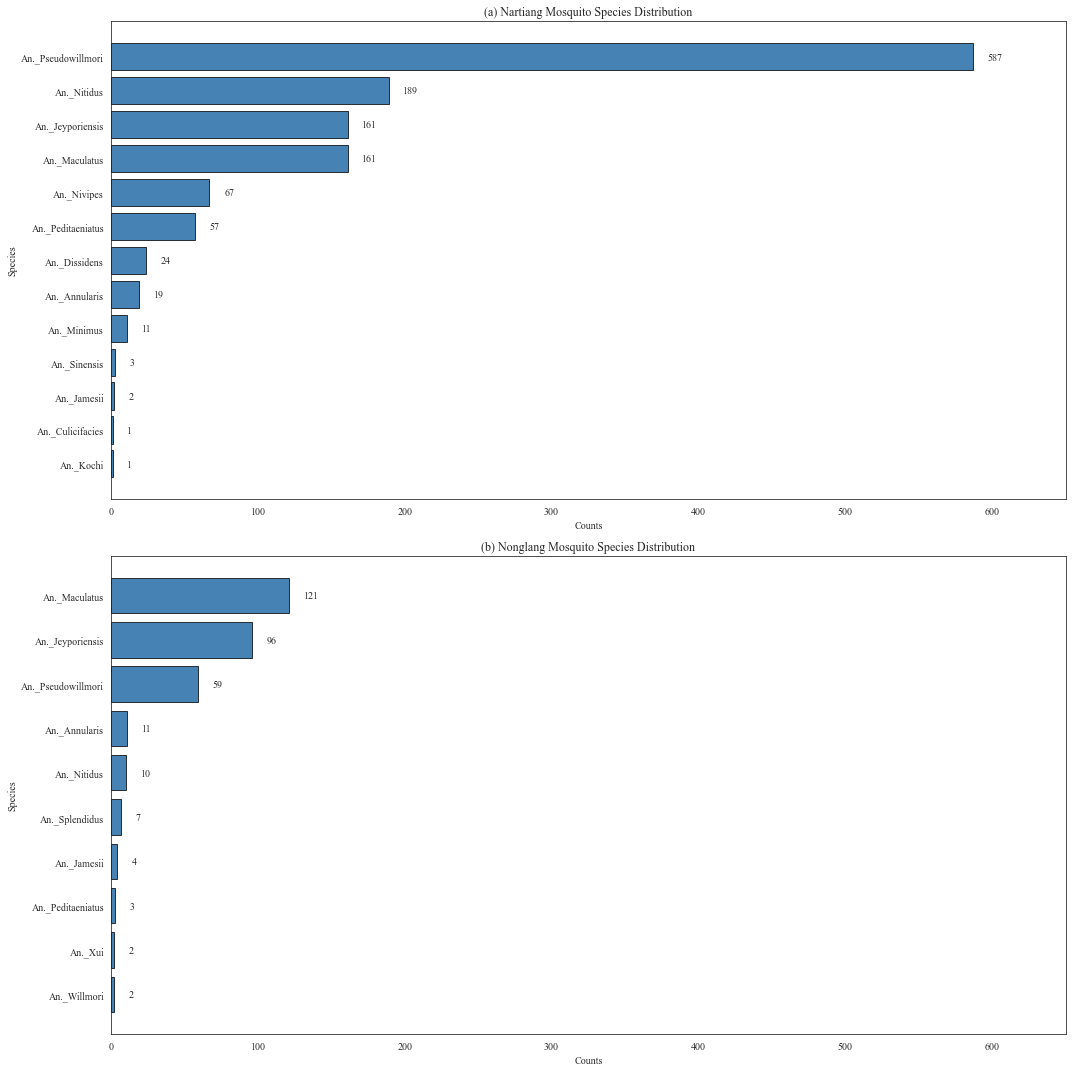

In [29]:
# Set the style of the plots
sns.set_style("white")

# Set global font size and style
plt.rcParams.update({
    'font.size': 25,
    'font.family': 'Times New Roman'
})

# Determine mosquito species in each dataset
nartiang_species = [col for col in nartiang1000.columns if 'An.' in col]
nonglang_species = [col for col in nonglang1000.columns if 'An.' in col]

# Mosquito species distribution
nartiang_mosquito_counts = nartiang1000[nartiang_species].sum().sort_values()
nonglang_mosquito_counts = nonglang1000[nonglang_species].sum().sort_values()

# Create a figure and axes for the two subplots
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

# Plot nartiang data
ax[0].barh(nartiang_mosquito_counts.index, nartiang_mosquito_counts.values, color='steelblue', edgecolor='black', linewidth=0.75)
ax[0].set_title('(a) Nartiang Mosquito Species Distribution')
ax[0].set_xlabel('Counts')
ax[0].set_ylabel('Species')
ax[0].set_xlim(0, 650)

# Plot nonglang data
ax[1].barh(nonglang_mosquito_counts.index, nonglang_mosquito_counts.values, color='steelblue', edgecolor='black', linewidth=0.75)
ax[1].set_title('(b) Nonglang Mosquito Species Distribution')
ax[1].set_xlabel('Counts')
ax[1].set_ylabel('Species')
ax[1].set_xlim(0, 650)

# Add count annotations to the nartiang plot
for i, count in enumerate(nartiang_mosquito_counts.values):
    ax[0].text(count + 10, i, str(count), va='center')

# Add count annotations to the nonglang plot
for i, count in enumerate(nonglang_mosquito_counts.values):
    ax[1].text(count + 10, i, str(count), va='center')

# Display the plot
plt.tight_layout()
plt.show()

### Permutation Test for Mosquito Species Count between Nartiang and Nonglang

In [30]:
# Determine mosquito species in each dataset
nartiang_species = [col for col in nartiang1000.columns if 'An.' in col]
nonglang_species = [col for col in nonglang1000.columns if 'An.' in col]

# Mosquito species distribution
nartiang_mosquito_counts = nartiang1000[nartiang_species].sum().sort_values()
nonglang_mosquito_counts = nonglang1000[nonglang_species].sum().sort_values()

# Number of permutations
num_permutations = 10000

# Observed mean difference
obs_diff = nartiang_mosquito_counts.mean() - nonglang_mosquito_counts.mean()

# Create an array to store permutation sample differences
perm_diffs = np.zeros(num_permutations)

for i in range(num_permutations):
    # Concatenate mosquito counts
    combined_counts = np.concatenate((nartiang_mosquito_counts.values, nonglang_mosquito_counts.values))
    
    # Permute the concatenated array
    permuted_data = np.random.permutation(combined_counts)
    
    # Split the permuted array into two: permuted_nartiang and permuted_nonglang
    permuted_nartiang = permuted_data[:len(nartiang_mosquito_counts)]
    permuted_nonglang = permuted_data[len(nartiang_mosquito_counts):]
    
    # Compute the mean difference for the permuted samples
    perm_diffs[i] = np.mean(permuted_nartiang) - np.mean(permuted_nonglang)

# Compute p-value
p_value = np.sum(perm_diffs >= obs_diff) / num_permutations

# Print the results
print(f"Observed difference in means: {obs_diff}")
print(f"P-value: {p_value}")

Observed difference in means: 67.1923076923077
P-value: 0.091


### Monthly Mosquito Distibutions

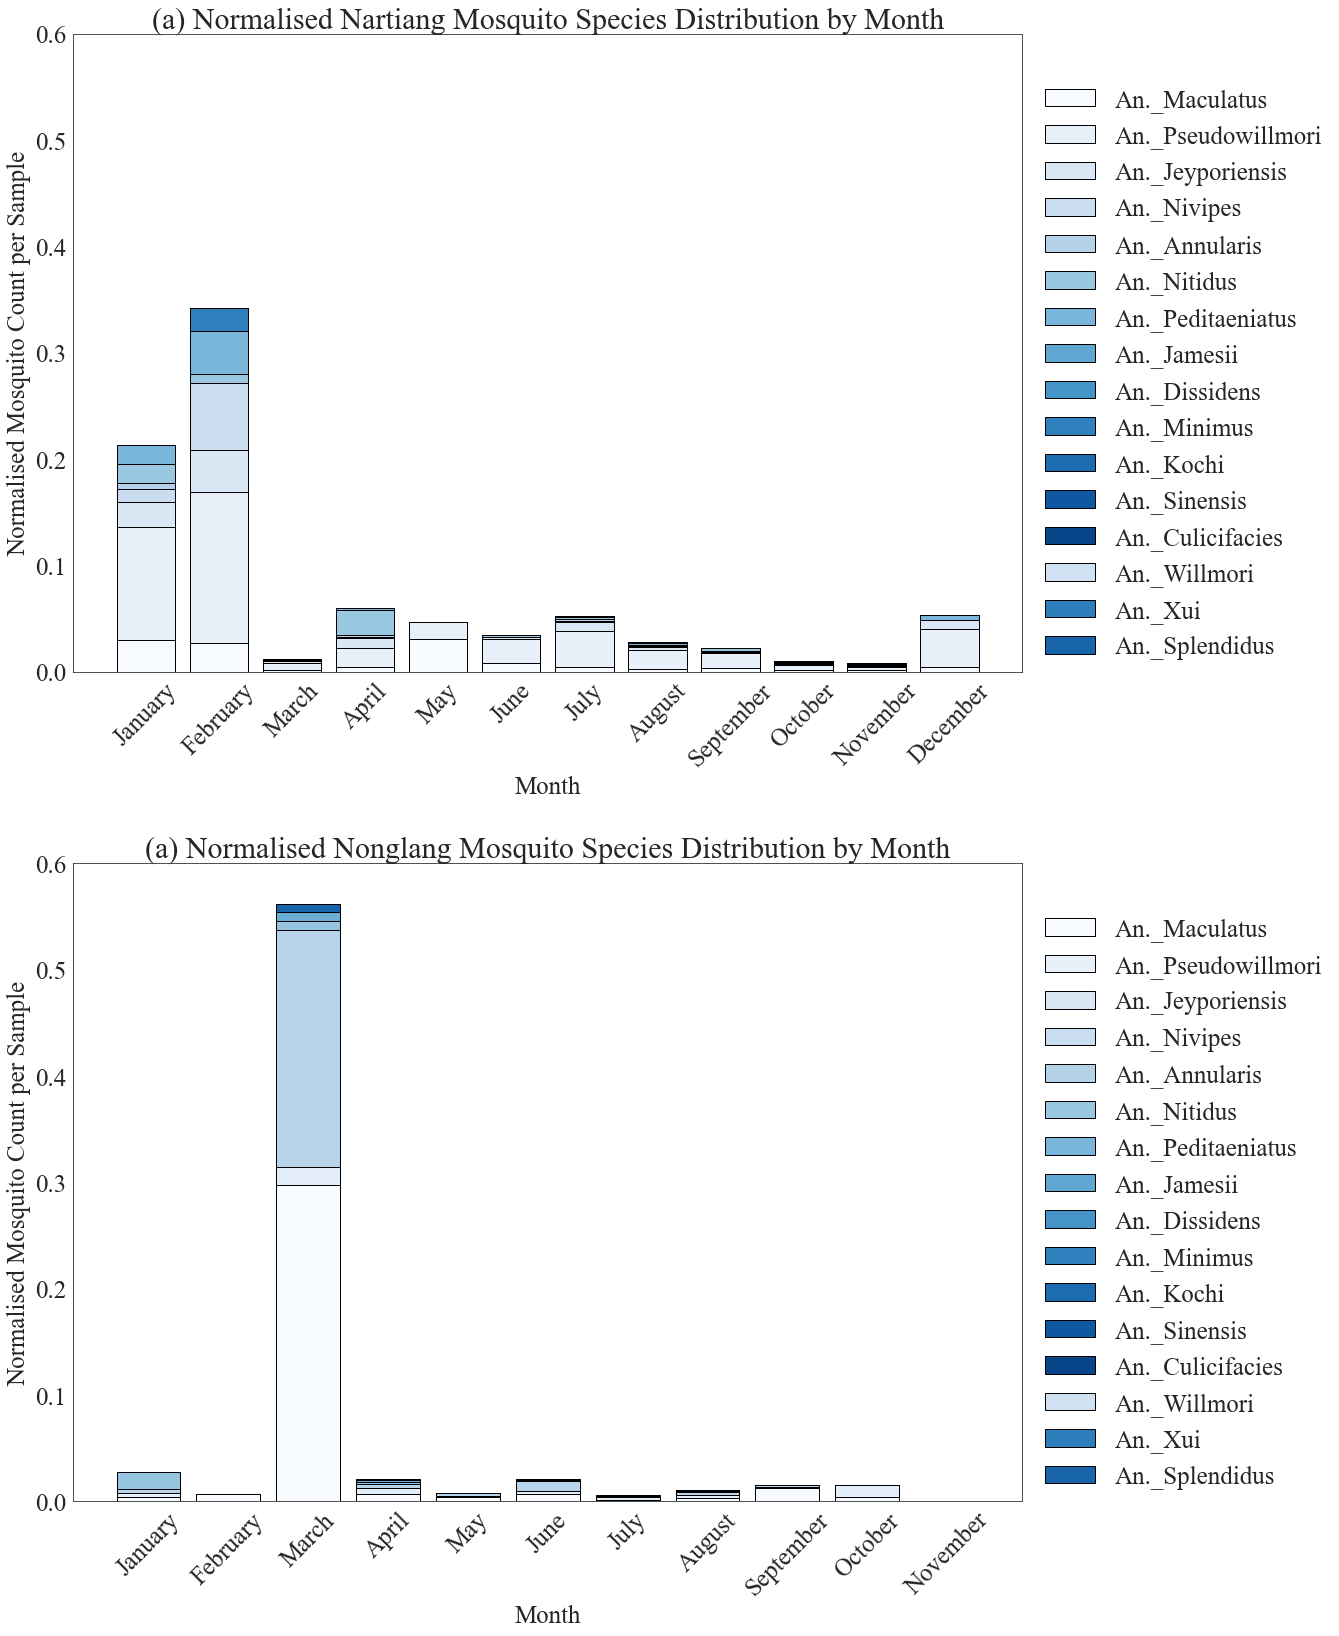

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# Set global font size and style
plt.rcParams.update({
    'font.size': 25,
    'font.family': 'Times New Roman'
})

# Convert 'Datetime' to pandas datetime format
nartiang1000['Datetime'] = pd.to_datetime(nartiang1000['Datetime'])

# Create a new column for the month of the year
nartiang1000['Month'] = nartiang1000['Datetime'].dt.month_name()

# Correct order of months in a year
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define the mosquito species for nartiang1000 
nartiang_mosquito_species = ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Nivipes', 'An._Annularis', 'An._Nitidus', 'An._Peditaeniatus', 'An._Jamesii', 'An._Dissidens', 'An._Minimus', 'An._Kochi', 'An._Sinensis', 'An._Culicifacies']

# Plotting for Nartiang
fig, axes = plt.subplots(2, 1, figsize=(17, 27))

nartiang_mosquito_distributions = nartiang1000.groupby('Month')[nartiang_mosquito_species].mean().loc[order]

# Normalize mosquito counts per sample
nartiang_samples_per_month = nartiang1000['Month'].value_counts().loc[order]
nartiang_mosquito_distributions_normalized = nartiang_mosquito_distributions.div(nartiang_samples_per_month, axis='index')

bottom = np.zeros(len(order))
for i, species in enumerate(nartiang_mosquito_species):
    axes[0].bar(nartiang_mosquito_distributions_normalized.index, nartiang_mosquito_distributions_normalized[species], bottom=bottom, edgecolor='black', label=species, color=plt.cm.Blues(i / len(nartiang_mosquito_species)))
    bottom += nartiang_mosquito_distributions_normalized[species]
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Normalised Mosquito Count per Sample')
axes[0].set_title('(a) Normalised Nartiang Mosquito Species Distribution by Month')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 0.6)

# Correct order of months in a year
order2 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

# Convert 'Datetime' to pandas datetime format
nonglang1000['Datetime'] = pd.to_datetime(nonglang1000['Datetime'])

# Create a new column for the month of the year
nonglang1000['Month'] = nonglang1000['Datetime'].dt.month_name()

# Define the mosquito species for nonglang1000 
nonglang_mosquito_species = ['An._Maculatus', 'An._Pseudowillmori', 'An._Willmori', 'An._Jeyporiensis', 'An._Annularis', 'An._Nitidus', 'An._Peditaeniatus', 'An._Xui', 'An._Splendidus', 'An._Jamesii']

# Plotting for Nonglang
nonglang_mosquito_distributions = nonglang1000.groupby('Month')[nonglang_mosquito_species].mean().loc[order2]

# Normalise mosquito counts per sample
nonglang_samples_per_month = nonglang1000['Month'].value_counts().loc[order2]
nonglang_mosquito_distributions_normalized = nonglang_mosquito_distributions.div(nonglang_samples_per_month, axis='index')

bottom = np.zeros(len(order2))
for i, species in enumerate(nonglang_mosquito_species):
    axes[1].bar(nonglang_mosquito_distributions_normalized.index, nonglang_mosquito_distributions_normalized[species], bottom=bottom, edgecolor='black', label=species, color=plt.cm.Blues(i / len(nonglang_mosquito_species)))
    bottom += nonglang_mosquito_distributions_normalized[species]
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Normalised Mosquito Count per Sample')
axes[1].set_title('(a) Normalised Nonglang Mosquito Species Distribution by Month')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 0.6)

# Collect labels and handles
handles, labels = [], []
for ax in fig.axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

# Remove any duplicates from the labels and handles
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
handles, labels = zip(*unique)

# Position legends
axes[0].legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.95), ncol=1, frameon=False)
axes[1].legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.95), ncol=1, frameon=False)

# Adjust layout
plt.subplots_adjust(hspace=0.3)  # hspace sets the vertical spacing between plots

# Display the plot
plt.show()

#### Permutation Test for Mosquito Species Variability across the Months in Nartiang

In [32]:
# Group the data by 'Month' and sum the 'Mosquito_Count' column to get monthly totals
nartiang_monthly_totals = nartiang1000.groupby('Month')['Mosquito_Count'].sum()

# Compute observed difference in means between consecutive months
obs_diffs = np.diff(nartiang_monthly_totals)

# Absolute mean of these differences, to get a single statistic
obs_mean_diff = np.abs(obs_diffs).mean()

# Number of permutations
num_permutations = 10000

# Create an array to store permutation sample differences
perm_diffs = np.zeros(num_permutations)

for i in range(num_permutations):
    # Permute the monthly mosquito counts
    permuted_counts = np.random.permutation(nartiang_monthly_totals)
    
    # Compute the differences between consecutive permuted months
    perm_month_diffs = np.diff(permuted_counts)
    
    # Compute the absolute mean difference for the permuted samples
    perm_diffs[i] = np.abs(perm_month_diffs).mean()

# Compute p-value
p_value = np.sum(perm_diffs >= obs_mean_diff) / num_permutations

# Print the results
print(f"Observed mean of absolute differences between consecutive months: {obs_mean_diff}")
print(f"P-value: {p_value}")

# If p_value is small (typically <= 0.05), it suggests that the differences between consecutive months are statistically significant.

Observed mean of absolute differences between consecutive months: 92.0
P-value: 0.9244


#### Permutation Test for Mosquito Species Variability across the Months in Nonglang

In [33]:
# Group the data by 'Month' and sum the 'Mosquito_Count' column to get monthly totals
nonglang_monthly_totals = nonglang1000.groupby('Month')['Mosquito_Count'].sum()

# Compute observed difference in means between consecutive months
obs_diffs = np.diff(nonglang_monthly_totals)

# Absolute mean of these differences, to get a single statistic
obs_mean_diff = np.abs(obs_diffs).mean()

# Number of permutations
num_permutations = 10000

# Create an array to store permutation sample differences
perm_diffs = np.zeros(num_permutations)

for i in range(num_permutations):
    # Permute the monthly mosquito counts
    permuted_counts = np.random.permutation(nonglang_monthly_totals)
    
    # Compute the differences between consecutive permuted months
    perm_month_diffs = np.diff(permuted_counts)
    
    # Compute the absolute mean difference for the permuted samples
    perm_diffs[i] = np.abs(perm_month_diffs).mean()

# Compute p-value
p_value = np.sum(perm_diffs >= obs_mean_diff) / num_permutations

# Print the results
print(f"Observed mean of absolute differences between consecutive months: {obs_mean_diff}")
print(f"P-value: {p_value}")

# If p_value is small (typically <= 0.05), it suggests that the differences between consecutive months are statistically significant.

Observed mean of absolute differences between consecutive months: 30.4
P-value: 0.8932


### __Mosquito Distribution by Environment Type__

Which of the two sets of graphs is better, percentage or abundace? I dont get why the first graph (b) isnt level at 100%

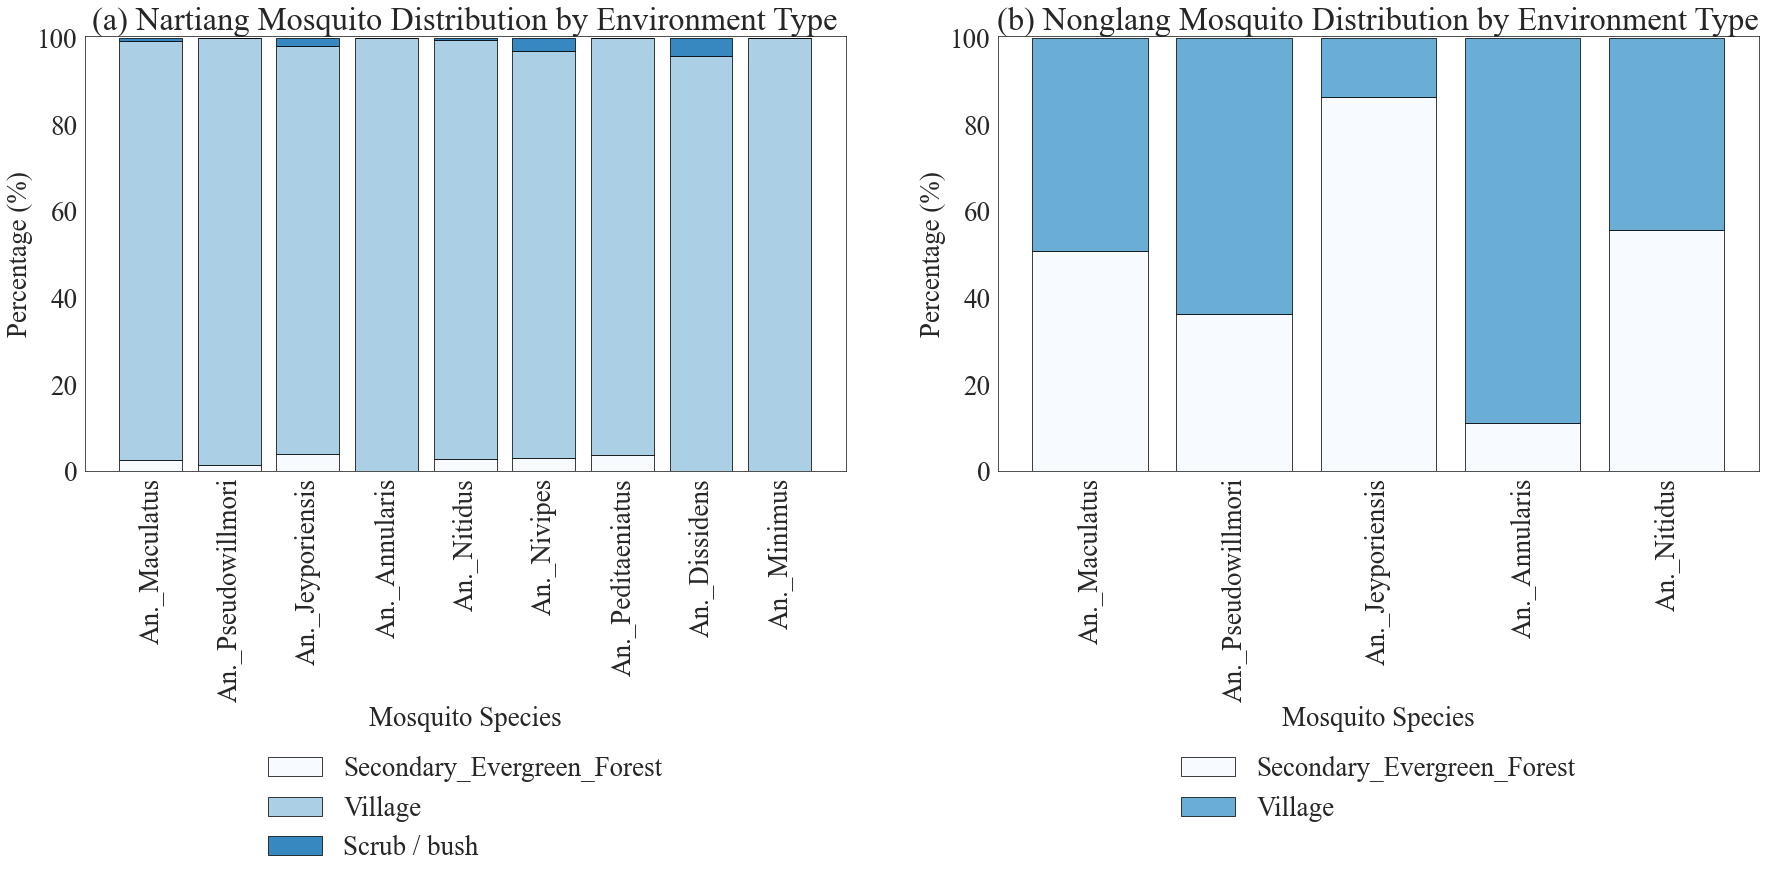

In [34]:
# Set the style of the plots
sns.set_style("white")

# Set global font size and style
plt.rcParams.update({
    'font.size': 27,
    'font.family': 'Times New Roman'
})

# Create list for the mosquito species in nartiang and nonglang
mosquito_species1 = ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Annularis', 'An._Nitidus', 'An._Nivipes', 'An._Peditaeniatus', 'An._Dissidens', 'An._Minimus']
mosquito_species2 = ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Annularis', 'An._Nitidus']

# Select the relevant columns for nartiang1000
nartiang_environment_types = ['Environment_Secondary_Evergreen_Forest', 'Environment_Village', 'Environment_Scrub/bush']
# Select the relevant columns for nonglang1000
nonglang_environment_types = ['Environment_Secondary_Evergreen_Forest', 'Environment_Village']

# Create a new list of labels by removing the 'Environment_' prefix and replacing '/' with ' / ' for better readability
nartiang_labels = [label.replace('Environment_', '').replace('/', ' / ') for label in nartiang_environment_types]
nonglang_labels = [label.replace('Environment_', '').replace('/', ' / ') for label in nonglang_environment_types]

# Remove rows where all 'Environment_' columns are 0
environment_columns = [col for col in nartiang1000.columns if col.startswith('Environment_')]
nartiang1000 = nartiang1000.loc[~(nartiang1000[environment_columns] == 0).all(axis=1)]

environment_columns = [col for col in nonglang1000.columns if col.startswith('Environment_')]
nonglang1000 = nonglang1000.loc[~(nonglang1000[environment_columns] == 0).all(axis=1)]

# Create the stacked bar chart for nartiang1000 and nonglang1000
fig, axes = plt.subplots(1, 2, figsize=(30, 8))

# Loop through the datasets and plot mosquito distributions by environment type
for idx, (df, environment_types, labels, species, ax, title) in enumerate([(nartiang1000, nartiang_environment_types, nartiang_labels, mosquito_species1, axes[0], "(a) Nartiang Mosquito Distribution by Environment Type"),
                                                                            (nonglang1000, nonglang_environment_types, nonglang_labels, mosquito_species2, axes[1], "(b) Nonglang Mosquito Distribution by Environment Type")]):
    # Set plot title and labels
    ax.set_title(title)
    ax.set_xlabel('Mosquito Species')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 100.5)  # Set the y-axis limit to percentage range
    
    # Loop through mosquito species and environment types to create stacked bar chart
    for j, mosquito in enumerate(species):
        mosquito_distributions = []
        total_mosquito_abundance_species = df[mosquito].sum()
        for environment_type in environment_types:
            # Subset the data for the current environment type
            data_subset = df[df[environment_type] == 1]

            # Calculate the mosquito distribution for the current environment type
            mosquito_distribution = data_subset[mosquito].sum()

            # Calculate the percentage distribution
            percentage_distribution = (mosquito_distribution / total_mosquito_abundance_species) * 100

            # Add the percentage distribution to the array
            mosquito_distributions.append(percentage_distribution)

        # Create the stacked bar chart
        bottom = 0
        for i, (distribution, label) in enumerate(zip(mosquito_distributions, labels)):
            ax.bar(j, distribution, bottom=bottom, label=label if j == 0 else "_nolegend_", color=plt.cm.Blues(i / len(environment_types)), edgecolor='black', linewidth=0.75)
            bottom += distribution

    ax.set_xticks(range(len(species)))
    ax.set_xticklabels(species, rotation=90)

# Move the legend to the outside of the plot on the right
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), frameon = False)
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), frameon = False)

# Adjust vertical spacing between plots and legends
plt.subplots_adjust(hspace=0.73) 

# Display the plot
plt.show()

#### Permutation Test for Mosquito Species Variability across the Environment types in Nartiang and Nonglang

In [35]:
def permutation_test_species_environment(data, species, environment_types, num_permutations=10000):
    # Calculate the observed test statistic: max count difference between environment conditions
    obs_stat = data.groupby(environment_types)[species].sum().max() - data.groupby(environment_types)[species].sum().min()

    # Array to store permuted statistics
    perm_stats = np.zeros(num_permutations)

    for i in range(num_permutations):
        # Shuffle the environment types
        shuffled_env = np.random.choice(environment_types, size=len(data), replace=True)
        
        # Recompute test statistic based on shuffled environment types
        perm_stat = data.groupby(shuffled_env)[species].sum().max() - data.groupby(shuffled_env)[species].sum().min()
        perm_stats[i] = perm_stat

    # Calculate p-value: Proportion of permuted statistics >= observed statistic
    p_value = np.sum(perm_stats >= obs_stat) / num_permutations

    return p_value

# Define environment types for each location
nartiang_environment_types = ['Environment_Secondary_Evergreen_Forest', 'Environment_Village', 'Environment_Scrub/bush']
nonglang_environment_types = ['Environment_Secondary_Evergreen_Forest', 'Environment_Village']

# Perform the test for each species in each location
results_nartiang = {}
for species in nartiang_mosquito_species:
    p_val = permutation_test_species_environment(nartiang1000, species, nartiang_environment_types)
    results_nartiang[species] = p_val
results_nonglang = {}
for species in nonglang_mosquito_species:
    p_val = permutation_test_species_environment(nonglang1000, species, nonglang_environment_types)
    results_nonglang[species] = p_val

# Print the results
print("Nartiang Results:", results_nartiang)
print("Nonglang Results:", results_nonglang)

Nartiang Results: {'An._Maculatus': 0.0, 'An._Pseudowillmori': 0.0, 'An._Jeyporiensis': 0.0, 'An._Nivipes': 0.0, 'An._Annularis': 0.0001, 'An._Nitidus': 0.0, 'An._Peditaeniatus': 0.0, 'An._Jamesii': 0.3354, 'An._Dissidens': 0.0, 'An._Minimus': 0.0023, 'An._Kochi': 1.0, 'An._Sinensis': 0.11, 'An._Culicifacies': 1.0}
Nonglang Results: {'An._Maculatus': 0.9717, 'An._Pseudowillmori': 0.2023, 'An._Willmori': 1.0, 'An._Jeyporiensis': 0.0099, 'An._Annularis': 0.0938, 'An._Nitidus': 1.0, 'An._Peditaeniatus': 1.0, 'An._Xui': 0.5029, 'An._Splendidus': 0.7438, 'An._Jamesii': 0.6355}


### __Mosquito Distribution by Sky Conditions__

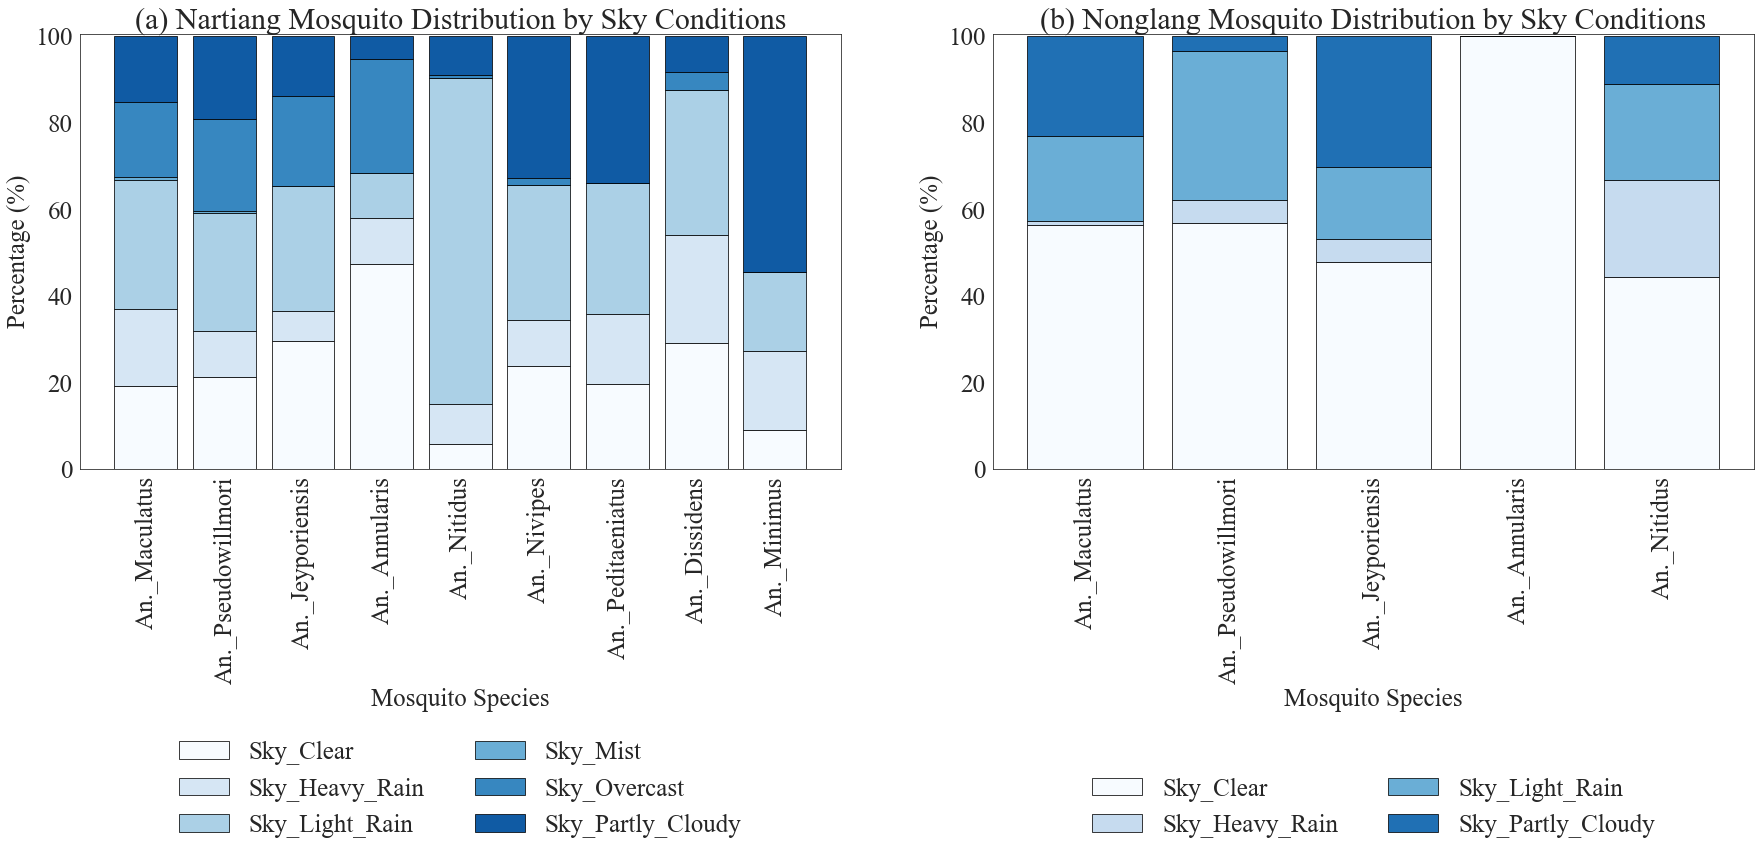

In [36]:
# Set the style of the plots
sns.set_style("white")

# Set global font size and style
plt.rcParams.update({
    'font.size': 25,
    'font.family': 'Times New Roman'
})

# Select the relevant columns for nartiang1000 and nonglang1000
nartiang_sky_types = ['Sky_Clear', 'Sky_Heavy_Rain', 'Sky_Light_Rain', 'Sky_Mist', 'Sky_Overcast', 'Sky_Partly_Cloudy']
nonglang_sky_types = ['Sky_Clear', 'Sky_Heavy_Rain', 'Sky_Light_Rain', 'Sky_Partly_Cloudy']

# Define the color palette for nartiang1000 and nonglang1000
nartiang_palette = plt.cm.get_cmap('Blues')
nonglang_palette = plt.cm.get_cmap('Blues')

# Get columns that start with 'Sky_' for nartiang1000 and nonglang1000
nartiang_sky_columns = nartiang1000.filter(like='Sky_').columns
nonglang_sky_columns = nonglang1000.filter(like='Sky_').columns

# Remove rows where all 'Sky_' columns are 0 for nartiang1000
mask_nartiang = nartiang1000[nartiang_sky_columns].sum(axis=1) != 0
nartiang1000 = nartiang1000[mask_nartiang]

# Remove rows where all 'Sky_' columns are 0 for nonglang1000
mask_nonglang = nonglang1000[nonglang_sky_columns].sum(axis=1) != 0
nonglang1000 = nonglang1000[mask_nonglang]

# Create an empty list to store the mosquito distributions for each species in nartiang1000 and nonglang1000
nartiang_mosquito_distributions = {species: [] for species in mosquito_species1}
nonglang_mosquito_distributions = {species: [] for species in mosquito_species2}

# Calculate mosquito distributions for each sky type in nartiang1000
for species in mosquito_species1:
    total_mosquito_abundance_species = nartiang1000[species].sum()
    for sky_type in nartiang_sky_types:
        data_subset = nartiang1000[nartiang1000[sky_type] == 1]
        mosquito_distribution = (data_subset[species].sum() / total_mosquito_abundance_species) * 100
        nartiang_mosquito_distributions[species].append(mosquito_distribution)

# Calculate mosquito distributions for each sky type in nonglang1000
for species in mosquito_species2:
    total_mosquito_abundance_species = nonglang1000[species].sum()
    for sky_type in nonglang_sky_types:
        data_subset = nonglang1000[nonglang1000[sky_type] == 1]
        mosquito_distribution = (data_subset[species].sum() / total_mosquito_abundance_species) * 100
        nonglang_mosquito_distributions[species].append(mosquito_distribution)

# Create the stacked bar chart for nartiang1000 and nonglang1000
fig, axes = plt.subplots(1, 2, figsize=(30, 8)) 

seen_labels = set()  # Keep track of the labels

# Plot the first stacked bar chart for nartiang1000
for species in mosquito_species1:
    bottom = 0
    for i, sky_type in enumerate(nartiang_sky_types):
        label = sky_type if sky_type not in seen_labels else ""
        seen_labels.add(sky_type)
        axes[0].bar(species, nartiang_mosquito_distributions[species][i], bottom=bottom, label=label, color=nartiang_palette(i / len(nartiang_sky_types)), edgecolor='black', linewidth=0.75)
        bottom += nartiang_mosquito_distributions[species][i]

seen_labels = set()  # Reset the seen labels for the second chart

# Plot the second stacked bar chart for nonglang1000
for species in mosquito_species2:
    bottom = 0
    for i, sky_type in enumerate(nonglang_sky_types):
        label = sky_type if sky_type not in seen_labels else ""
        seen_labels.add(sky_type)
        axes[1].bar(species, nonglang_mosquito_distributions[species][i], bottom=bottom, label=label, color=nonglang_palette(i / len(nonglang_sky_types)), edgecolor='black', linewidth=0.75)
        bottom += nonglang_mosquito_distributions[species][i]

# Set the titles, labels and legend for the plots
axes[0].set_title('(a) Nartiang Mosquito Distribution by Sky Conditions')
axes[0].set_xlabel('Mosquito Species')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_ylim(0, 100.5)  # Set the y-axis limit to 100% for nartiang1000

axes[1].set_title('(b) Nonglang Mosquito Distribution by Sky Conditions')
axes[1].set_xlabel('Mosquito Species')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_ylim(0, 100.5)  # Set the y-axis limit to 100% for nonglang1000

# Rotate x-axis labels and place the legend below the plots
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels 90 degrees
    ax.legend(loc='lower center', ncol=2,bbox_to_anchor=(0.5, -0.9), frameon=False)  # Place the legend below the plot

# Adjust the spacing between the plots and the legend
plt.subplots_adjust(hspace=0.6)

# Display the plot
plt.show()

#### Permutation Test for Mosquito Species Variability across the sky conditions in Nartiang and Nonglang

In [37]:
def permutation_test_species_weather(data, species, sky_types, num_permutations=10000):
    # Calculate the observed test statistic: max count difference between weather conditions
    obs_stat = data.groupby(sky_types)[species].sum().max() - data.groupby(sky_types)[species].sum().min()

    # Array to store permuted statistics
    perm_stats = np.zeros(num_permutations)

    for i in range(num_permutations):
        # Shuffle the sky types
        shuffled_sky = np.random.choice(sky_types, size=len(data), replace=True)
        
        # Recompute test statistic based on shuffled sky types
        perm_stat = data.groupby(shuffled_sky)[species].sum().max() - data.groupby(shuffled_sky)[species].sum().min()
        perm_stats[i] = perm_stat

    # Calculate p-value: Proportion of permuted statistics >= observed statistic
    p_value = np.sum(perm_stats >= obs_stat) / num_permutations

    return p_value

# Perform the test for each species in each location
results_nartiang = {}
for species in nartiang_mosquito_species:
    p_val = permutation_test_species_weather(nartiang1000, species, nartiang_sky_types)
    results_nartiang[species] = p_val

results_nonglang = {}
for species in nonglang_mosquito_species:
    p_val = permutation_test_species_weather(nonglang1000, species, nonglang_sky_types)
    results_nonglang[species] = p_val

# Print the results
print("Nartiang Results:", results_nartiang)
print("Nonglang Results:", results_nonglang)

Nartiang Results: {'An._Maculatus': 0.0055, 'An._Pseudowillmori': 0.0002, 'An._Jeyporiensis': 0.0296, 'An._Nivipes': 0.0705, 'An._Annularis': 0.3065, 'An._Nitidus': 0.1244, 'An._Peditaeniatus': 0.1436, 'An._Jamesii': 1.0, 'An._Dissidens': 0.1448, 'An._Minimus': 0.6542, 'An._Kochi': 1.0, 'An._Sinensis': 0.4434, 'An._Culicifacies': 1.0}
Nonglang Results: {'An._Maculatus': 0.0013, 'An._Pseudowillmori': 0.0002, 'An._Willmori': 1.0, 'An._Jeyporiensis': 0.2571, 'An._Annularis': 0.0004, 'An._Nitidus': 0.7428, 'An._Peditaeniatus': 0.6237, 'An._Xui': 0.2464, 'An._Splendidus': 0.4339, 'An._Jamesii': 0.2018}


### __Mosquito Distribution by Wind Conditions__

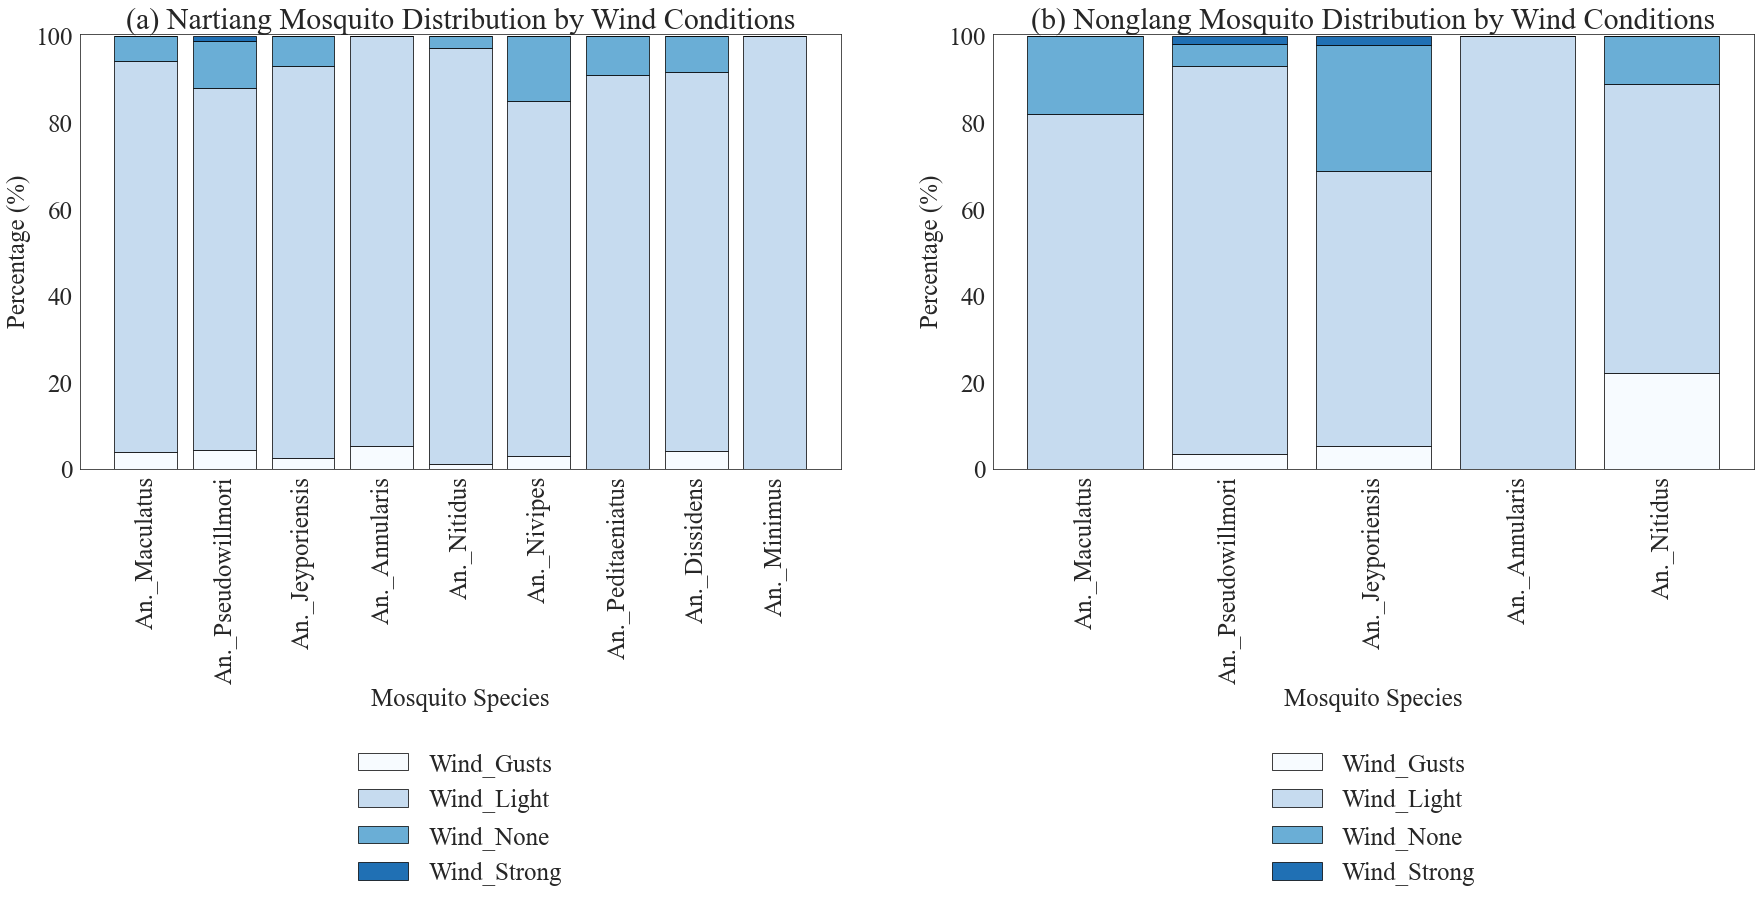

In [38]:
# Set global font size and style
plt.rcParams.update({
    'font.size': 25,
    'font.family': 'Times New Roman'
})

# Define the types of wind conditions for Nartiang and Nonglang
nartiang_wind_types = ['Wind_Gusts', 'Wind_Light', 'Wind_None', 'Wind_Strong']
nonglang_wind_types = ['Wind_Gusts', 'Wind_Light', 'Wind_None', 'Wind_Strong']

# Define the color palette for Nartiang and Nonglang plots
nartiang_palette = plt.cm.get_cmap('Blues')
nonglang_palette = plt.cm.get_cmap('Blues')

# Calculate mosquito distributions for each wind condition in Nartiang
nartiang_mosquito_distributions = []

# Get the list of columns beginning with 'Wind_' 
wind_cols = [col for col in nartiang1000.columns if col.startswith('Wind_')]
wind_cols = [col for col in nonglang1000.columns if col.startswith('Wind_')]

# Remove rows where all wind columns are 0
nartiang1000 = nartiang1000[~(nartiang1000[wind_cols]==0).all(axis=1)]
nonglang1000 = nonglang1000[~(nonglang1000[wind_cols]==0).all(axis=1)]

# Calculate the total mosquito count for Nartiang mosquito species
nartiang_total_mosquito_count = nartiang1000[mosquito_species1].sum()

# Calculate mosquito distributions for each wind condition in Nartiang
for wind_type in nartiang_wind_types:
    data_subset = nartiang1000[nartiang1000[wind_type] == 1]
    mosquito_distribution = (data_subset[mosquito_species1].sum() / nartiang_total_mosquito_count) * 100
    nartiang_mosquito_distributions.append(mosquito_distribution)

# Convert the list of distributions into a numpy array
nartiang_mosquito_distributions = np.array(nartiang_mosquito_distributions)

# Define the maximum percentage for y-axis limit
max_percentage = 100.5

# Create the stacked bar chart for nartiang1000 and nonglang1000
fig, axes = plt.subplots(1, 2, figsize=(30, 8))  

# Initialize the bottom values for stacking bars
bottom = np.zeros(len(mosquito_species1))

# Plot Nartiang mosquito distributions by wind conditions
for i, wind_type in enumerate(nartiang_wind_types):
    axes[0].bar(mosquito_species1, nartiang_mosquito_distributions[i], bottom=bottom, label=wind_type, color=nartiang_palette(i / len(nartiang_wind_types)), edgecolor='black', linewidth=0.75)
    bottom += nartiang_mosquito_distributions[i]
    
# Set titles, labels, and legend for the Nartiang plot
axes[0].set_title('(a) Nartiang Mosquito Distribution by Wind Conditions')
axes[0].set_xlabel('Mosquito Species')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xticks(range(len(mosquito_species1)))
axes[0].set_xticklabels(mosquito_species1, rotation=90)
axes[0].legend()
axes[0].set_ylim(0, max_percentage)

# Calculate mosquito distributions for each wind condition in Nonglang
nonglang_mosquito_distributions = []

# Calculate the total mosquito count for Nonglang mosquito species
nonglang_total_mosquito_count = nonglang1000[mosquito_species2].sum()

# Calculate mosquito distributions for each wind condition in Nonglang
for wind_type in nonglang_wind_types:
    data_subset = nonglang1000[nonglang1000[wind_type] == 1]
    mosquito_distribution = (data_subset[mosquito_species2].sum() / nonglang_total_mosquito_count) * 100
    nonglang_mosquito_distributions.append(mosquito_distribution)

# Convert the list of distributions into a numpy array
nonglang_mosquito_distributions = np.array(nonglang_mosquito_distributions)

# Initialize the bottom values for stacking bars
bottom = np.zeros(len(mosquito_species2))

# Plot Nonglang mosquito distributions by wind conditions
for i, wind_type in enumerate(nonglang_wind_types):
    axes[1].bar(mosquito_species2, nonglang_mosquito_distributions[i], bottom=bottom, label=wind_type, color=nonglang_palette(i / len(nonglang_wind_types)), edgecolor='black', linewidth=0.75)
    bottom += nonglang_mosquito_distributions[i]

# Set titles, labels, and legend for the Nonglang plot
axes[1].set_title('(b) Nonglang Mosquito Distribution by Wind Conditions')
axes[1].set_xlabel('Mosquito Species')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xticks(range(len(mosquito_species2)))
axes[1].set_xticklabels(mosquito_species2, rotation=90)
axes[1].legend()
axes[1].set_ylim(0, max_percentage)

# Move the legend to below the plot
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), frameon = False)
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), frameon = False)

# Adjust the spacing between the plots and the legend
plt.subplots_adjust(hspace=0.6)

# Display the plots
plt.show()

#### Permutation Test for Mosquito Species Variability across the wind conditions in Nartiang and Nonglang

In [39]:
def permutation_test_species_wind(data, species, wind_types, num_permutations=10000):
    # Calculate the observed test statistic: max count difference between wind conditions
    obs_stat = data.groupby(wind_types)[species].sum().max() - data.groupby(wind_types)[species].sum().min()

    # Array to store permuted statistics
    perm_stats = np.zeros(num_permutations)

    for i in range(num_permutations):
        # Shuffle the wind types
        shuffled_wind = np.random.choice(wind_types, size=len(data), replace=True)
        
        # Recompute test statistic based on shuffled wind types
        perm_stat = data.groupby(shuffled_wind)[species].sum().max() - data.groupby(shuffled_wind)[species].sum().min()
        perm_stats[i] = perm_stat

    # Calculate p-value: Proportion of permuted statistics >= observed statistic
    p_value = np.sum(perm_stats >= obs_stat) / num_permutations

    return p_value

# Select the relevant columns for nartiang1000 and nonglang1000
nartiang_wind_types = ['Wind_Gusts', 'Wind_Light', 'Wind_None', 'Wind_Strong']
nonglang_wind_types = ['Wind_Gusts', 'Wind_Light', 'Wind_None', 'Wind_Strong']

# Perform the test for each species in each location
results_nartiang = {}
for species in nartiang_mosquito_species:
    p_val = permutation_test_species_wind(nartiang1000, species, nartiang_wind_types)
    results_nartiang[species] = p_val

results_nonglang = {}
for species in nonglang_mosquito_species:
    p_val = permutation_test_species_wind(nonglang1000, species, nonglang_wind_types)
    results_nonglang[species] = p_val

# Print the results
print("Nartiang Results:", results_nartiang)
print("Nonglang Results:", results_nonglang)

Nartiang Results: {'An._Maculatus': 0.0, 'An._Pseudowillmori': 0.0, 'An._Jeyporiensis': 0.0, 'An._Nivipes': 0.0, 'An._Annularis': 0.0, 'An._Nitidus': 0.0, 'An._Peditaeniatus': 0.0, 'An._Jamesii': 0.2559, 'An._Dissidens': 0.0, 'An._Minimus': 0.0002, 'An._Kochi': 1.0, 'An._Sinensis': 0.631, 'An._Culicifacies': 1.0}
Nonglang Results: {'An._Maculatus': 0.0, 'An._Pseudowillmori': 0.0, 'An._Willmori': 1.0, 'An._Jeyporiensis': 0.0208, 'An._Annularis': 0.0, 'An._Nitidus': 0.0644, 'An._Peditaeniatus': 0.0685, 'An._Xui': 0.2525, 'An._Splendidus': 0.0609, 'An._Jamesii': 0.0178}


### __Mosquito Distribution by House Building Material__

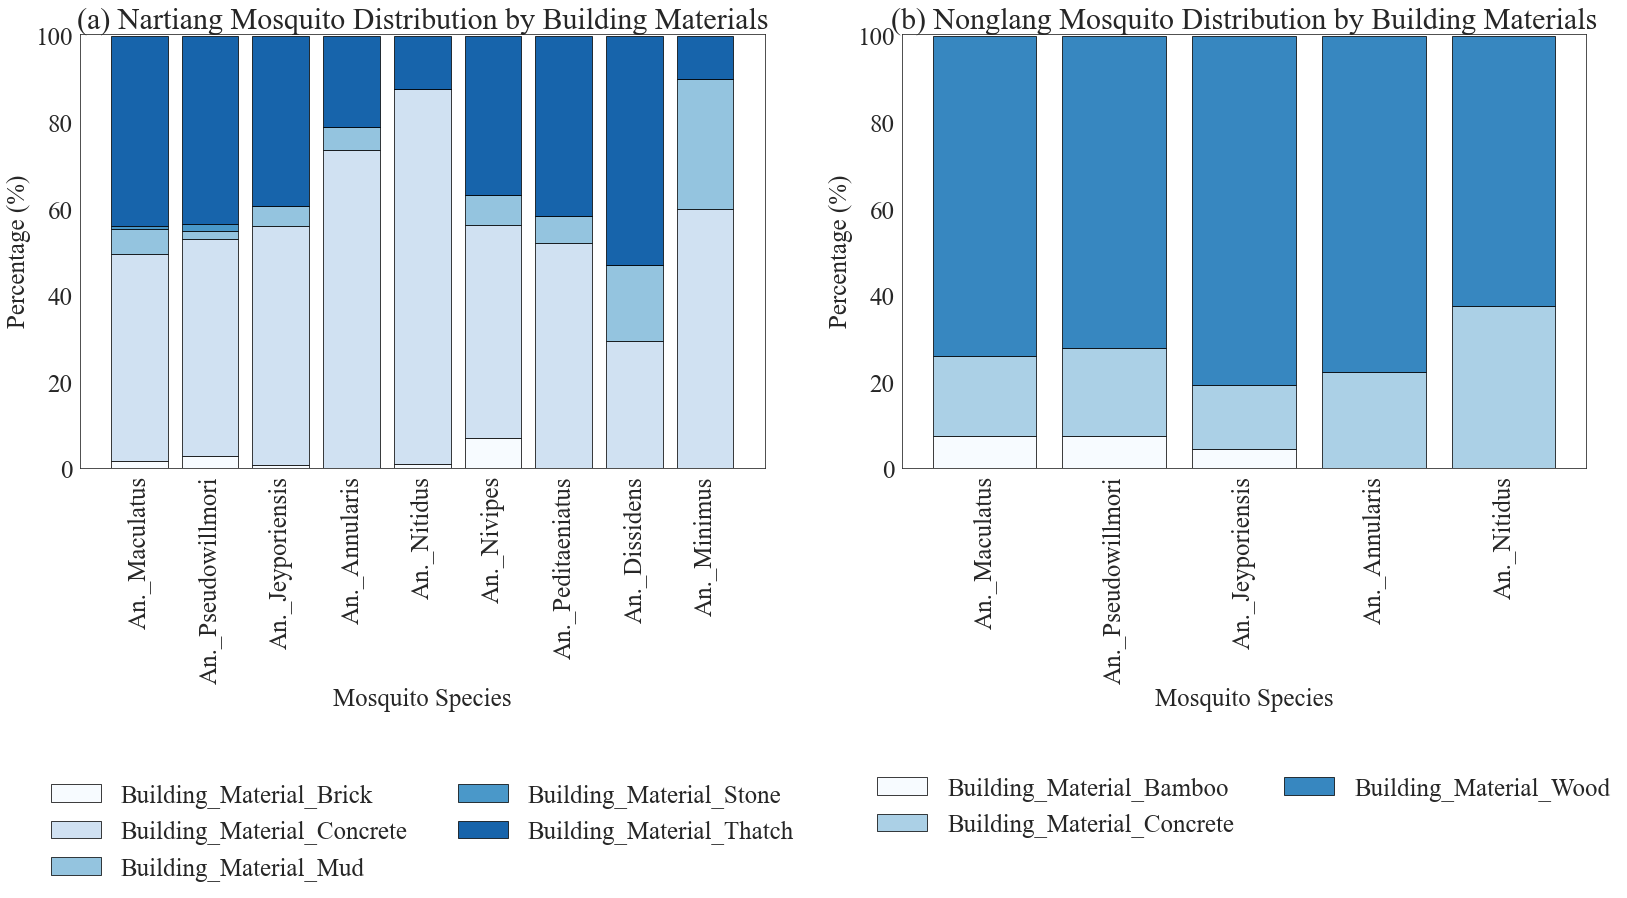

In [40]:
# Set the style of the plots
sns.set_style("white")

# Set global font size and style
plt.rcParams.update({
    'font.size': 25,
    'font.family': 'Times New Roman'
})

# Define the types of building materials for Nartiang and Nonglang
nartiang_material_types = ['Building_Material_Brick', 'Building_Material_Concrete', 'Building_Material_Mud', 'Building_Material_Stone', 'Building_Material_Thatch']
nonglang_material_types = ['Building_Material_Bamboo', 'Building_Material_Concrete', 'Building_Material_Wood']

# Define color palettes for Nartiang and Nonglang plots
nartiang_palette = plt.cm.get_cmap('Blues')
nonglang_palette = plt.cm.get_cmap('Blues')

# Filter columns related to building materials for Nartiang and Nonglang datasets
nartiang_material_columns = nartiang1000[nartiang_material_types].columns
nonglang_material_columns = nonglang1000[nonglang_material_types].columns

# Remove rows where all 'Building_Material_' columns are 0 for Nartiang
mask_nartiang = nartiang1000[nartiang_material_columns].sum(axis=1) != 0
nartiang1000 = nartiang1000[mask_nartiang]

# Remove rows where all 'Building_Material_' columns are 0 for Nonglang
mask_nonglang = nonglang1000[nonglang_material_columns].sum(axis=1) != 0
nonglang1000 = nonglang1000[mask_nonglang]

# Initialise dictionaries to store mosquito distributions for Nartiang and Nonglang
nartiang_mosquito_distributions = {species: [] for species in mosquito_species1}
nonglang_mosquito_distributions = {species: [] for species in mosquito_species2}

# Calculate mosquito distributions for each building material type in Nartiang
for species in mosquito_species1:
    total_distribution = 0
    for material_type in nartiang_material_types:
        data_subset = nartiang1000[nartiang1000[material_type] == 1]
        mosquito_distribution = data_subset[species].sum()
        nartiang_mosquito_distributions[species].append(mosquito_distribution)
        total_distribution += mosquito_distribution

    # Normalise the distributions to percentages
    nartiang_mosquito_distributions[species] = [100 * dist/total_distribution for dist in nartiang_mosquito_distributions[species]]

# Calculate mosquito distributions for each building material type in Nonglnaf
for species in mosquito_species2:
    total_distribution = 0
    for material_type in nonglang_material_types:
        data_subset = nonglang1000[nonglang1000[material_type] == 1]
        mosquito_distribution = data_subset[species].sum()
        nonglang_mosquito_distributions[species].append(mosquito_distribution)
        total_distribution += mosquito_distribution

    # Normalise the distributions to percentages
    nonglang_mosquito_distributions[species] = [100 * dist/total_distribution for dist in nonglang_mosquito_distributions[species]]

# Create the stacked bar chart for Nartiang and Nonglang
fig, axes = plt.subplots(1, 2, figsize=(27, 8))

seen_labels = set()  # Keep track of the labels we've seen

# Plot the first stacked bar chart for Nartiang
for species in mosquito_species1:
    bottom = 0
    for i, material_type in enumerate(nartiang_material_types):
        label = material_type if material_type not in seen_labels else ""
        seen_labels.add(material_type)
        axes[0].bar(species, nartiang_mosquito_distributions[species][i], bottom=bottom, label=label, color=nartiang_palette(i / len(nartiang_material_types)), edgecolor='black', linewidth=0.75)
        bottom += nartiang_mosquito_distributions[species][i]

seen_labels = set()  # Reset the seen labels for the second chart

# Plot the second stacked bar chart for Nonglang
for species in mosquito_species2:
    bottom = 0
    for i, material_type in enumerate(nonglang_material_types):
        label = material_type if material_type not in seen_labels else ""
        seen_labels.add(material_type)
        axes[1].bar(species, nonglang_mosquito_distributions[species][i], bottom=bottom, label=label, color=nonglang_palette(i / len(nonglang_material_types)), edgecolor='black', linewidth=0.75)
        bottom += nonglang_mosquito_distributions[species][i]

# Set the titles, labels and legend for the plots
axes[0].set_title('(a) Nartiang Mosquito Distribution by Building Materials')
axes[0].set_xlabel('Mosquito Species')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_ylim(0, 100.5)  
axes[0].set_xticklabels(mosquito_species1, rotation=90)

axes[1].set_title('(b) Nonglang Mosquito Distribution by Building Materials')
axes[1].set_xlabel('Mosquito Species')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_ylim(0, 100.5) 
axes[1].set_xticklabels(mosquito_species1, rotation=90)

# Rotate x-axis labels and place the legend below the plots
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels 90 degrees
    axes[0].legend(loc='lower center', ncol=2,bbox_to_anchor=(0.5, -1), frameon=False)  
    axes[1].legend(loc='lower center', ncol=2,bbox_to_anchor=(0.5, -0.9), frameon=False)  

# Adjust the spacing between the plots and the legend
plt.subplots_adjust(hspace=0.1)

# Display the plots
plt.show()

#### Permutation Test for Mosquito Species Variability across the house building materials in Nartiang and Nonglang

In [41]:
def permutation_test_species_material(data, species, material_types, num_permutations=10000):
    # Calculate the observed test statistic: max count difference between building materials
    obs_stat = data.groupby(material_types)[species].sum().max() - data.groupby(material_types)[species].sum().min()

    # Array to store permuted statistics
    perm_stats = np.zeros(num_permutations)

    for i in range(num_permutations):
        # Shuffle the material types
        shuffled_material = np.random.choice(material_types, size=len(data), replace=True)
        
        # Recompute test statistic based on shuffled material types
        perm_stat = data.groupby(shuffled_material)[species].sum().max() - data.groupby(shuffled_material)[species].sum().min()
        perm_stats[i] = perm_stat

    # Calculate p-value: Proportion of permuted statistics >= observed statistic
    p_value = np.sum(perm_stats >= obs_stat) / num_permutations

    return p_value

nartiang_material_types = ['Building_Material_Brick', 'Building_Material_Concrete', 'Building_Material_Mud', 'Building_Material_Stone', 'Building_Material_Thatch']
nonglang_material_types = ['Building_Material_Bamboo', 'Building_Material_Concrete', 'Building_Material_Wood']

# Perform the test for each species in each location
results_nartiang = {}
for species in nartiang_mosquito_species:
    p_val = permutation_test_species_material(nartiang1000, species, nartiang_material_types)
    results_nartiang[species] = p_val

results_nonglang = {}
for species in nonglang_mosquito_species:
    p_val = permutation_test_species_material(nonglang1000, species, nonglang_material_types)
    results_nonglang[species] = p_val

# Print the results
print("Nartiang Results:", results_nartiang)
print("Nonglang Results:", results_nonglang)

Nartiang Results: {'An._Maculatus': 0.0002, 'An._Pseudowillmori': 0.0, 'An._Jeyporiensis': 0.0001, 'An._Nivipes': 0.0056, 'An._Annularis': 0.004, 'An._Nitidus': 0.0027, 'An._Peditaeniatus': 0.0139, 'An._Jamesii': 1.0, 'An._Dissidens': 0.0261, 'An._Minimus': 0.6338, 'An._Kochi': 1.0, 'An._Sinensis': 0.52, 'An._Culicifacies': 1.0}
Nonglang Results: {'An._Maculatus': 0.0, 'An._Pseudowillmori': 0.0, 'An._Willmori': 1.0, 'An._Jeyporiensis': 0.0011, 'An._Annularis': 0.049, 'An._Nitidus': 0.1785, 'An._Peditaeniatus': 0.1087, 'An._Xui': 0.3324, 'An._Splendidus': 0.5514, 'An._Jamesii': 0.3337}


### __Mosquito Distribution by Animal Type__

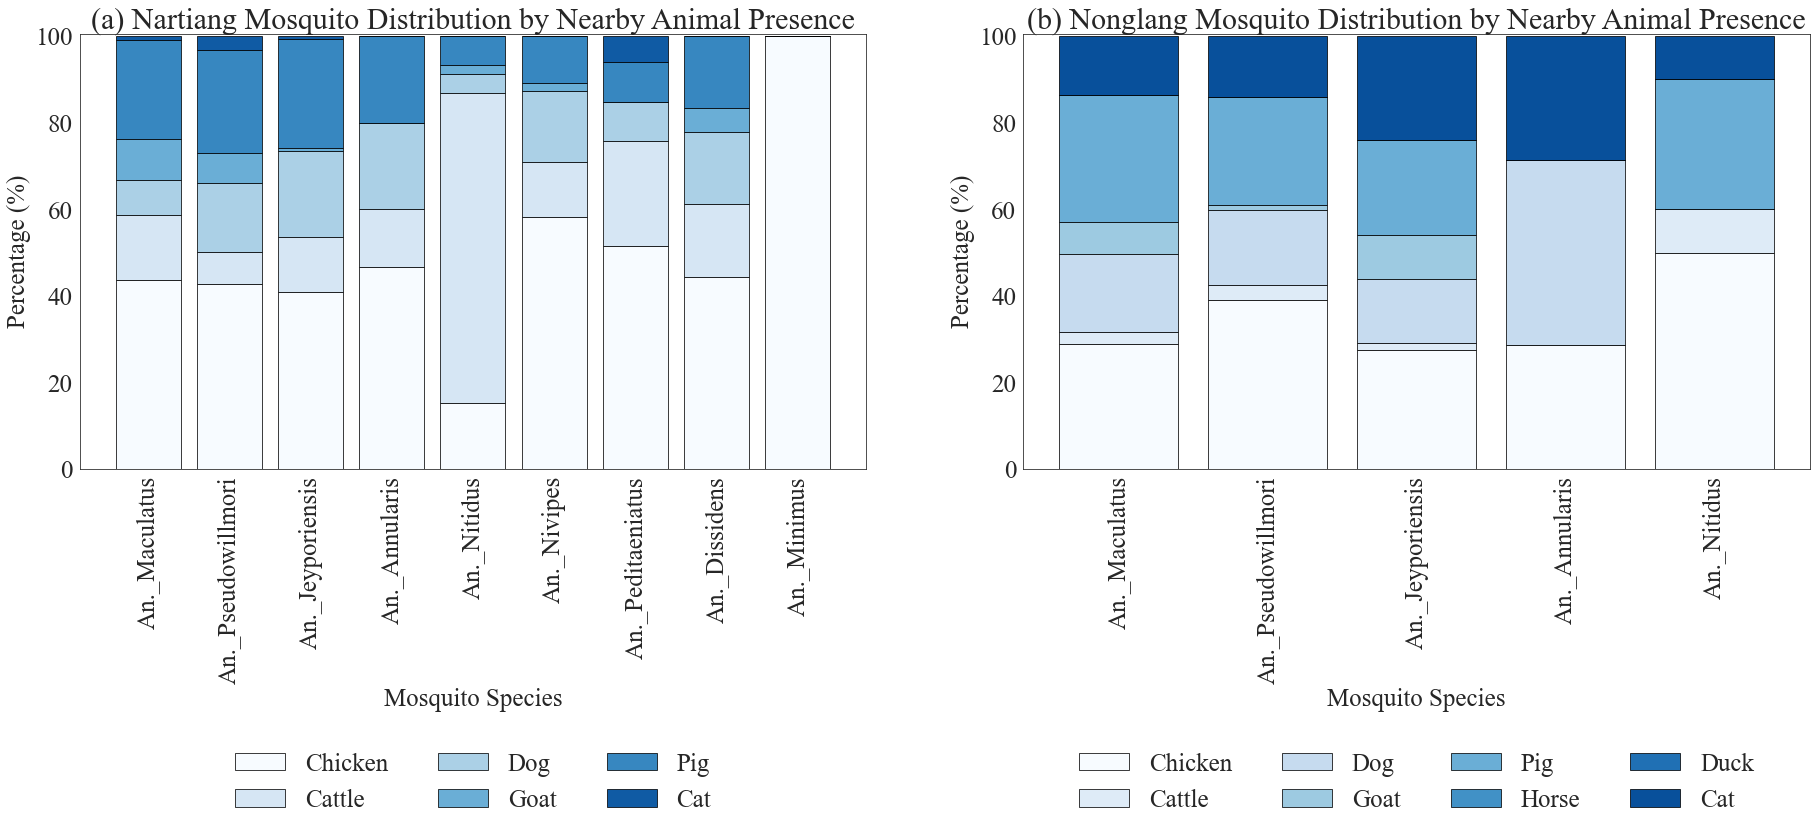

In [42]:
# Set global font size and style
plt.rcParams.update({
    'font.size': 25,
    'font.family': 'Times New Roman'
})

# Select the relevant columns for Nartiang and Nonglang
nartiang_animal_types = ['Chicken_Count', 'Cattle_Count', 'Dog_Count', 'Goat_Count', 'Pig_Count', 'Cat_Count']
nonglang_animal_types = ['Chicken_Count', 'Cattle_Count', 'Dog_Count', 'Goat_Count', 'Pig_Count', 'Horse_Count', 'Duck_Count', 'Cat_Count']

# Define the color palette for Nartiang and Nonglang
nartiang_palette = plt.cm.get_cmap('Blues')
nonglang_palette = plt.cm.get_cmap('Blues')

# Get columns that start with 'Animal_' for Nartiang and Nonglang
nartiang_animal_columns = nartiang1000[nartiang_animal_types].columns
nonglang_animal_columns = nonglang1000[nonglang_animal_types].columns

# Remove rows where all 'Animal_' columns are 0 for Nartiang
mask_nartiang = nartiang1000[nartiang_animal_columns].sum(axis=1) != 0
nartiang1000 = nartiang1000[mask_nartiang]

# Remove rows where all 'Animal_' columns are 0 for Nonglang
mask_nonglang = nonglang1000[nonglang_animal_columns].sum(axis=1) != 0
nonglang1000 = nonglang1000[mask_nonglang]

# Initialize dictionaries to store mosquito distributions for Nartiang and Nonglang
nartiang_mosquito_distributions = {species: [] for species in mosquito_species1}
nonglang_mosquito_distributions = {species: [] for species in mosquito_species2}

# Calculate mosquito distributions for each animal type in Nartiang
for species in mosquito_species1:
    total_distribution = 0
    for animal_type in nartiang_animal_types:
        data_subset = nartiang1000[nartiang1000[animal_type] > 0]
        mosquito_distribution = data_subset[species].sum()
        nartiang_mosquito_distributions[species].append(mosquito_distribution)
        total_distribution += mosquito_distribution

    # Normalize the distributions to percentages
    nartiang_mosquito_distributions[species] = [100 * dist/total_distribution for dist in nartiang_mosquito_distributions[species]]

# Calculate mosquito distributions for each animal type in Nongalng
for species in mosquito_species2:
    total_distribution = 0
    for animal_type in nonglang_animal_types:
        data_subset = nonglang1000[nonglang1000[animal_type] > 0]
        mosquito_distribution = data_subset[species].sum()
        nonglang_mosquito_distributions[species].append(mosquito_distribution)
        total_distribution += mosquito_distribution

    # Normalize the distributions to percentages
    nonglang_mosquito_distributions[species] = [100 * dist/total_distribution for dist in nonglang_mosquito_distributions[species]]


# Create the stacked bar chart for Nartiang and Nonglang
fig, axes = plt.subplots(1, 2, figsize=(31, 8))
seen_labels = set()  

# Plot the first stacked bar chart for nartiang1000
for species in mosquito_species1:
    bottom = 0
    for i, animal_type in enumerate(nartiang_animal_types):
        label = animal_type.replace('_Count', '') if animal_type not in seen_labels else ""
        seen_labels.add(animal_type)
        axes[0].bar(species, nartiang_mosquito_distributions[species][i], bottom=bottom, label=label, color=nartiang_palette(i / len(nartiang_animal_types)), edgecolor='black', linewidth=0.75)
        bottom += nartiang_mosquito_distributions[species][i]

# Reset the seen labels for the second chart
seen_labels = set() 

# Plot the second stacked bar chart for Nonglang
for species in mosquito_species2:
    bottom = 0
    for i, animal_type in enumerate(nonglang_animal_types):
        label = animal_type.replace('_Count', '') if animal_type not in seen_labels else ""
        seen_labels.add(animal_type)
        axes[1].bar(species, nonglang_mosquito_distributions[species][i], bottom=bottom, label=label, color=nonglang_palette(i / len(nonglang_animal_types)), edgecolor='black', linewidth=0.75)
        bottom += nonglang_mosquito_distributions[species][i]


# Set the titles, labels and legend for the plots
axes[0].set_title('(a) Nartiang Mosquito Distribution by Nearby Animal Presence')
axes[0].set_xlabel('Mosquito Species')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_ylim(0, 100.5) 

axes[1].set_title('(b) Nonglang Mosquito Distribution by Nearby Animal Presence')
axes[1].set_xlabel('Mosquito Species')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_ylim(0, 100.5) 

# Move the legend to the outside of the plot on the bottom
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=3, frameon = False)
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol= 4,frameon = False)
axes[0].set_xticklabels(mosquito_species1, rotation=90)
axes[1].set_xticklabels(mosquito_species2, rotation=90)

# Adjust spacing between the plots
plt.subplots_adjust(hspace=0.7)

# Display the plots
plt.show()

#### Permutation Test for Mosquito Species Variability across the house building materials in Nartiang and Nonglang

In [43]:
def permutation_test_species_animal(data, species, animal_types, num_permutations=10000):
    # Calculate the observed test statistic: max count difference between animal types
    obs_stat = data.groupby(animal_types)[species].sum().max() - data.groupby(animal_types)[species].sum().min()

    # Array to store permuted statistics
    perm_stats = np.zeros(num_permutations)

    for i in range(num_permutations):
        # Shuffle the animal types
        shuffled_animals = np.random.choice(animal_types, size=len(data), replace=True)
        
        # Recompute test statistic based on shuffled animal types
        perm_stat = data.groupby(shuffled_animals)[species].sum().max() - data.groupby(shuffled_animals)[species].sum().min()
        perm_stats[i] = perm_stat

    # Calculate p-value: Proportion of permuted statistics >= observed statistic
    p_value = np.sum(perm_stats >= obs_stat) / num_permutations

    return p_value


# Perform the test for each species in each location
results_nartiang = {}
for species in nartiang_mosquito_species:
    p_val = permutation_test_species_animal(nartiang1000, species, nartiang_animal_types)
    results_nartiang[species] = p_val

results_nonglang = {}
for species in nonglang_mosquito_species:
    p_val = permutation_test_species_animal(nonglang1000, species, nonglang_animal_types)
    results_nonglang[species] = p_val

# Print the results
print("Nartiang Results:", results_nartiang)
print("Nonglang Results:", results_nonglang)

Nartiang Results: {'An._Maculatus': 0.9442, 'An._Pseudowillmori': 0.9544, 'An._Jeyporiensis': 0.8938, 'An._Nivipes': 0.5106, 'An._Annularis': 1.0, 'An._Nitidus': 0.8738, 'An._Peditaeniatus': 0.9414, 'An._Jamesii': 1.0, 'An._Dissidens': 0.901, 'An._Minimus': 0.1702, 'An._Kochi': 1.0, 'An._Sinensis': 1.0, 'An._Culicifacies': 1.0}
Nonglang Results: {'An._Maculatus': 0.9184, 'An._Pseudowillmori': 0.8787, 'An._Willmori': 1.0, 'An._Jeyporiensis': 0.9401, 'An._Annularis': 1.0, 'An._Nitidus': 1.0, 'An._Peditaeniatus': 1.0, 'An._Xui': 1.0, 'An._Splendidus': 1.0, 'An._Jamesii': 1.0}


### __Mosquito Distribution by Average Land Use Percentage__

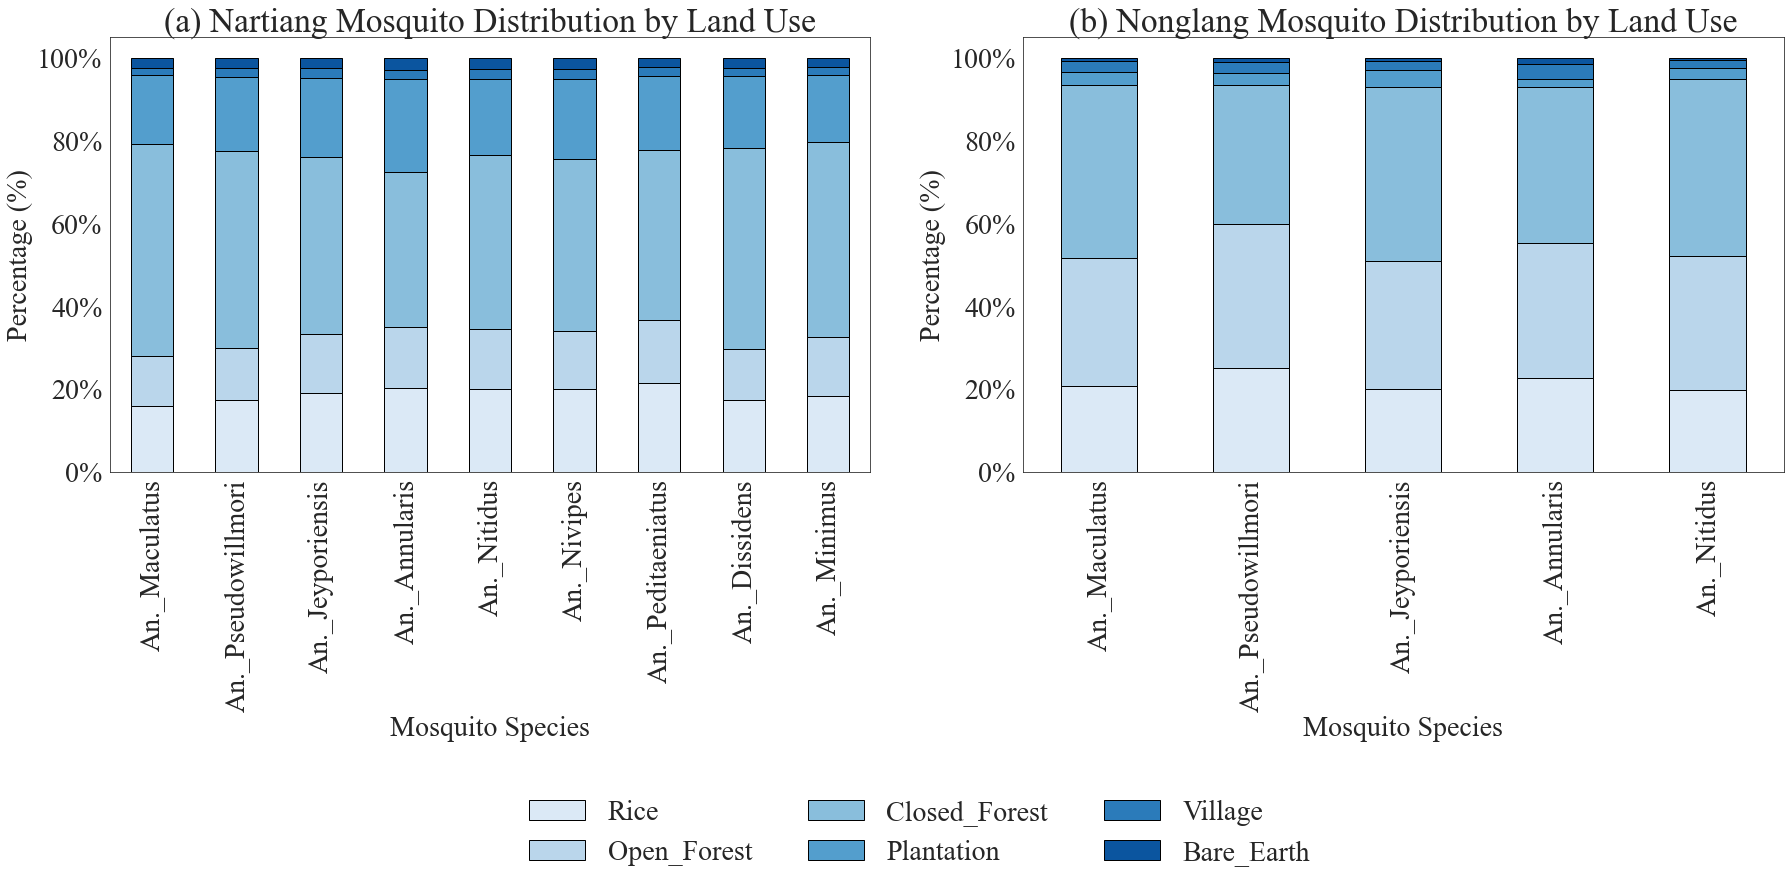

In [44]:
# Set the style of the plots
sns.set_style("white")

# Set global font size and style
plt.rcParams.update({
    'font.size': 28,
    'font.family': 'Times New Roman'
})

# Calculate the average land use percentages for each individual mosquito species in Nartiang
averages1 = pd.DataFrame()
land_use_categories = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']

for species in ['An._Maculatus',
                'An._Pseudowillmori',
                'An._Jeyporiensis',
                'An._Annularis',
                'An._Nitidus',
                'An._Nivipes',
                'An._Peditaeniatus',
                'An._Dissidens',
                'An._Minimus']:
    species_averages = nartiang1000[nartiang1000[species] > 0][land_use_categories].mean()
    species_averages['Mosquito_Species'] = species
    averages1 = averages1.append(species_averages, ignore_index=True)

# Calculate the average land use percentages for each individual mosquito species in Nonglang
averages2 = pd.DataFrame()

for species in ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Annularis', 'An._Nitidus']:
    species_averages = nonglang1000[nonglang1000[species] > 0][land_use_categories].mean()
    species_averages['Mosquito_Species'] = species
    averages2 = averages2.append(species_averages, ignore_index=True)

# Set the color palette to blues
sns.set_palette('Blues')

# Create the subplots for side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(30, 8))  # Create a figure and a set of subplots

# Plot the first chart
averages1.set_index('Mosquito_Species')[land_use_categories].plot(kind='bar', stacked=True, ax=axs[0], edgecolor='black', legend=False)
axs[0].set_xlabel('Mosquito Species')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('(a) Nartiang Mosquito Distribution by Land Use')
locs = axs[0].get_yticks()
axs[0].set_yticklabels(['{:.0f}%'.format(x*100) for x in locs])

# Plot the second chart
averages2.set_index('Mosquito_Species')[land_use_categories].plot(kind='bar', stacked=True, ax=axs[1], edgecolor='black', legend=False)
axs[1].set_xlabel('Mosquito Species')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('(b) Nonglang Mosquito Distribution by Land Use')
locs = axs[1].get_yticks()
axs[1].set_yticklabels(['{:.0f}%'.format(x*100) for x in locs])

# Add single legend outside of the plot
handles, labels = axs[0].get_legend_handles_labels()  # get the handles and labels from any subplot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=3, frameon = False)  # add a single legend to the figure

# Adjust vertical spacing between plots
plt.subplots_adjust(hspace=0.7)

# Display the charts
plt.show()

#### Permutation Test for Mosquito Species Variability across the land uses in Nartiang and Nonglang

In [45]:
def permutation_test_species_landuse(data, species, land_use_categories, num_permutations=10000):
    # Calculate the observed test statistic: max count difference between land uses
    obs_stat = data.groupby(land_use_categories)[species].sum().max() - data.groupby(land_use_categories)[species].sum().min()

    # Array to store permuted statistics
    perm_stats = np.zeros(num_permutations)

    for i in range(num_permutations):
        # Shuffle the land uses
        shuffled_land_use = np.random.choice(land_use_categories, size=len(data), replace=True)
        
        # Recompute test statistic based on shuffled land uses
        perm_stat = data.groupby(shuffled_land_use)[species].sum().max() - data.groupby(shuffled_land_use)[species].sum().min()
        perm_stats[i] = perm_stat

    # Calculate p-value: Proportion of permuted statistics >= observed statistic
    p_value = np.sum(perm_stats >= obs_stat) / num_permutations

    return p_value

# Land use categories
land_use_categories = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Perform the test for each species in each location
results_nartiang = {}
for species in nartiang_mosquito_species:
    p_val = permutation_test_species_landuse(nartiang1000, species, land_use_categories)
    results_nartiang[species] = p_val

results_nonglang = {}
for species in nonglang_mosquito_species:
    p_val = permutation_test_species_landuse(nonglang1000, species, land_use_categories)
    results_nonglang[species] = p_val

# Print results
print("Nartiang Results:", results_nartiang)
print("Nonglang Results:", results_nonglang)

Nartiang Results: {'An._Maculatus': 0.9665, 'An._Pseudowillmori': 0.9809, 'An._Jeyporiensis': 0.9182, 'An._Nivipes': 0.8379, 'An._Annularis': 1.0, 'An._Nitidus': 0.8748, 'An._Peditaeniatus': 0.938, 'An._Jamesii': 1.0, 'An._Dissidens': 0.9083, 'An._Minimus': 1.0, 'An._Kochi': 1.0, 'An._Sinensis': 1.0, 'An._Culicifacies': 1.0}
Nonglang Results: {'An._Maculatus': 0.9234, 'An._Pseudowillmori': 0.9588, 'An._Willmori': 1.0, 'An._Jeyporiensis': 0.8126, 'An._Annularis': 1.0, 'An._Nitidus': 0.9837, 'An._Peditaeniatus': 1.0, 'An._Xui': 1.0, 'An._Splendidus': 1.0, 'An._Jamesii': 1.0}


## __PERMANOVA__

In [46]:
# Save the Nonglang dataset to a CSV file
df.to_csv('NEWnonglang1000.csv', index=False)

# Save the Nartiang dataset to a CSV file
df.to_csv('NEWnartiang1000.csv', index=False)

The PERMANOVA test is carried out in R, in the files 'Nonglang_PERMANOVA.R' and 'Nartiang_PERMANOVA.R'.

## __Nonglang RFE Feature Selection__

#### All 5 Mosquitoes

In [47]:
# Calculate a simple diversity metric: count of species present in each row
nonglang1000['diversity'] = nonglang1000[['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Annularis', 'An._Nitidus']].gt(0).sum(axis=1)

# Define the predictor columns
nonglang_predictor_columns = ['Building_Material_Bamboo', 'Building_Material_Concrete',
                     'Building_Material_Wood', 'Roof_Type_Concrete', 'Roof_Type_Thatched', 'Roof_Type_Tin',
                     'Animals_Nearby', 'Chicken_Count', 'Cattle_Count', 'Dog_Count', 'Goat_Count', 'Pig_Count',
                     'Horse_Count', 'Duck_Count', 'Cat_Count', 'Terrain_Hill', 'Terrain_Plateau', 'Terrain_Valley',
                     'Sky_Clear', 'Sky_Heavy_Rain', 'Sky_Light_Rain', 'Sky_Partly_Cloudy',
                     'Environment_Secondary_Evergreen_Forest', 'Environment_Village', 'Wind_Gusts', 'Wind_Light',
                     'Wind_None', 'Wind_Strong', 'Slept_Under_ITN_LN', 'Used_Repellent_LN', 'Repellent_Type_Coil_LN',
                     'Repellent_Type_Cream_LN', 'Repellent_Type_Mat_LN', 'Repellent_Type_Spray_LN',
                     'Repellent_Type_Vaporizer_LN', 'Repellent_Type_Other_LN', 'Rice', 'Open_Forest', 'Closed_Forest',
                     'Plantation', 'Village', 'Bare_Earth']

X = nonglang1000[nonglang_predictor_columns]
y = nonglang1000['diversity']

# Initialise the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE (Recursive Feature Elimination) with an estimator and desired number of features
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Pig_Count', 'Sky_Light_Rain', 'Rice', 'Plantation', 'Village',
       'Bare_Earth'],
      dtype='object')


#### An. Maculatus

In [48]:
# Load the data
data = nonglang1000

# Calculate the occurrence count of 'An._Maculatus' in each row
data['An._Maculatus'] = data[['An._Maculatus']].gt(0).sum(axis=1)

# Define the predictor columns
nonglang_predictor_columns = ['Building_Material_Bamboo', 'Building_Material_Concrete',
                     'Building_Material_Wood', 'Roof_Type_Concrete', 'Roof_Type_Thatched', 'Roof_Type_Tin',
                     'Animals_Nearby', 'Chicken_Count', 'Cattle_Count', 'Dog_Count', 'Goat_Count', 'Pig_Count',
                     'Horse_Count', 'Duck_Count', 'Cat_Count', 'Terrain_Hill', 'Terrain_Plateau', 'Terrain_Valley',
                     'Sky_Clear', 'Sky_Heavy_Rain', 'Sky_Light_Rain', 'Sky_Partly_Cloudy',
                     'Environment_Secondary_Evergreen_Forest', 'Environment_Village', 'Wind_Gusts', 'Wind_Light',
                     'Wind_None', 'Wind_Strong', 'Slept_Under_ITN_LN', 'Used_Repellent_LN', 'Repellent_Type_Coil_LN',
                     'Repellent_Type_Cream_LN', 'Repellent_Type_Mat_LN', 'Repellent_Type_Spray_LN',
                     'Repellent_Type_Vaporizer_LN', 'Repellent_Type_Other_LN', 'Rice', 'Open_Forest', 'Closed_Forest',
                     'Plantation', 'Village', 'Bare_Earth']

X = data[nonglang_predictor_columns]
y = data['An._Maculatus']

# Initialise the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village',
       'Bare_Earth'],
      dtype='object')


#### An. Pseudowillmori

In [49]:
# Calculate the occurrence count of 'An._Pseudowillmori' in each row
data['An._Pseudowillmori'] = data[['An._Pseudowillmori']].gt(0).sum(axis=1)

# Define the predictor columns
nonglang_predictor_columns = ['Building_Material_Bamboo', 'Building_Material_Concrete',
                     'Building_Material_Wood', 'Roof_Type_Concrete', 'Roof_Type_Thatched', 'Roof_Type_Tin',
                     'Animals_Nearby', 'Chicken_Count', 'Cattle_Count', 'Dog_Count', 'Goat_Count', 'Pig_Count',
                     'Horse_Count', 'Duck_Count', 'Cat_Count', 'Terrain_Hill', 'Terrain_Plateau', 'Terrain_Valley',
                     'Sky_Clear', 'Sky_Heavy_Rain', 'Sky_Light_Rain', 'Sky_Partly_Cloudy',
                     'Environment_Secondary_Evergreen_Forest', 'Environment_Village', 'Wind_Gusts', 'Wind_Light',
                     'Wind_None', 'Wind_Strong', 'Slept_Under_ITN_LN', 'Used_Repellent_LN', 'Repellent_Type_Coil_LN',
                     'Repellent_Type_Cream_LN', 'Repellent_Type_Mat_LN', 'Repellent_Type_Spray_LN',
                     'Repellent_Type_Vaporizer_LN', 'Repellent_Type_Other_LN', 'Rice', 'Open_Forest', 'Closed_Forest',
                     'Plantation', 'Village', 'Bare_Earth']

X = data[nonglang_predictor_columns]
y = data['An._Pseudowillmori']

# Initialise the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Pig_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village',
       'Bare_Earth'],
      dtype='object')


#### An. Jeyporensis

In [50]:
# Calculate the occurrence count of 'An._Jeyporiensis' in each row
data['An._Jeyporiensis'] = data[['An._Jeyporiensis']].gt(0).sum(axis=1)

# Define the predictor columns
nonglang_predictor_columns = ['Building_Material_Bamboo', 'Building_Material_Concrete',
                     'Building_Material_Wood', 'Roof_Type_Concrete', 'Roof_Type_Thatched', 'Roof_Type_Tin',
                     'Animals_Nearby', 'Chicken_Count', 'Cattle_Count', 'Dog_Count', 'Goat_Count', 'Pig_Count',
                     'Horse_Count', 'Duck_Count', 'Cat_Count', 'Terrain_Hill', 'Terrain_Plateau', 'Terrain_Valley',
                     'Sky_Clear', 'Sky_Heavy_Rain', 'Sky_Light_Rain', 'Sky_Partly_Cloudy',
                     'Environment_Secondary_Evergreen_Forest', 'Environment_Village', 'Wind_Gusts', 'Wind_Light',
                     'Wind_None', 'Wind_Strong', 'Slept_Under_ITN_LN', 'Used_Repellent_LN', 'Repellent_Type_Coil_LN',
                     'Repellent_Type_Cream_LN', 'Repellent_Type_Mat_LN', 'Repellent_Type_Spray_LN',
                     'Repellent_Type_Vaporizer_LN', 'Repellent_Type_Other_LN', 'Rice', 'Open_Forest', 'Closed_Forest',
                     'Plantation', 'Village', 'Bare_Earth']

X = data[nonglang_predictor_columns]
y = data['An._Jeyporiensis']

# Initialise the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village',
       'Bare_Earth'],
      dtype='object')


#### An. Annualaris

In [51]:
# Calculate the occurrence count of 'An._Annularis' in each row
data['An._Annularis'] = data[['An._Annularis']].gt(0).sum(axis=1)

# Define the predictor columns
nonglang_predictor_columns = ['Building_Material_Bamboo', 'Building_Material_Concrete',
                     'Building_Material_Wood', 'Roof_Type_Concrete', 'Roof_Type_Thatched', 'Roof_Type_Tin',
                     'Animals_Nearby', 'Chicken_Count', 'Cattle_Count', 'Dog_Count', 'Goat_Count', 'Pig_Count',
                     'Horse_Count', 'Duck_Count', 'Cat_Count', 'Terrain_Hill', 'Terrain_Plateau', 'Terrain_Valley',
                     'Sky_Clear', 'Sky_Heavy_Rain', 'Sky_Light_Rain', 'Sky_Partly_Cloudy',
                     'Environment_Secondary_Evergreen_Forest', 'Environment_Village', 'Wind_Gusts', 'Wind_Light',
                     'Wind_None', 'Wind_Strong', 'Slept_Under_ITN_LN', 'Used_Repellent_LN', 'Repellent_Type_Coil_LN',
                     'Repellent_Type_Cream_LN', 'Repellent_Type_Mat_LN', 'Repellent_Type_Spray_LN',
                     'Repellent_Type_Vaporizer_LN', 'Repellent_Type_Other_LN', 'Rice', 'Open_Forest', 'Closed_Forest',
                     'Plantation', 'Village', 'Bare_Earth']

X = data[nonglang_predictor_columns]
y = data['An._Annularis']

# Initialise the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Cat_Count', 'Rice', 'Open_Forest', 'Closed_Forest', 'Village',
       'Bare_Earth'],
      dtype='object')


#### An. Nitidus

In [52]:
# Calculate the occurrence count of 'An._Nitidus' in each row
data['An._Nitidus'] = data[['An._Nitidus']].gt(0).sum(axis=1)

# Define the predictor columns
nonglang_predictor_columns = ['Building_Material_Bamboo', 'Building_Material_Concrete',
                     'Building_Material_Wood', 'Roof_Type_Concrete', 'Roof_Type_Thatched', 'Roof_Type_Tin',
                     'Animals_Nearby', 'Chicken_Count', 'Cattle_Count', 'Dog_Count', 'Goat_Count', 'Pig_Count',
                     'Horse_Count', 'Duck_Count', 'Cat_Count', 'Terrain_Hill', 'Terrain_Plateau', 'Terrain_Valley',
                     'Sky_Clear', 'Sky_Heavy_Rain', 'Sky_Light_Rain', 'Sky_Partly_Cloudy',
                     'Environment_Secondary_Evergreen_Forest', 'Environment_Village', 'Wind_Gusts', 'Wind_Light',
                     'Wind_None', 'Wind_Strong', 'Slept_Under_ITN_LN', 'Used_Repellent_LN', 'Repellent_Type_Coil_LN',
                     'Repellent_Type_Cream_LN', 'Repellent_Type_Mat_LN', 'Repellent_Type_Spray_LN',
                     'Repellent_Type_Vaporizer_LN', 'Repellent_Type_Other_LN', 'Rice', 'Open_Forest', 'Closed_Forest',
                     'Plantation', 'Village', 'Bare_Earth']

X = data[nonglang_predictor_columns]
y = data['An._Nitidus']

# Initialise the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Sky_Light_Rain', 'Rice', 'Open_Forest', 'Plantation', 'Village',
       'Bare_Earth'],
      dtype='object')


## __Nartiang RFE Feature Selection__

#### All 5 Mosquitoes

In [115]:
# Calculate a simple diversity metric: count of species present in each row
nartiang1000['diversity'] = nartiang1000[['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Nivipes', 'An._Nitidus']].gt(0).sum(axis=1)

# Define the predictor columns
nartiang_predictor_columns = [
    'Building_Material_Brick',
    'Building_Material_Concrete',
    'Building_Material_Mud',
    'Building_Material_Stone',
    'Building_Material_Thatch',
    'Building_Material_Other',
    'Roof_Type_Concrete',
    'Roof_Type_Thatched',
    'Roof_Type_Thatched_and_Tiles',
    'Roof_Type_Tin',
    'Animals_Nearby',
    'Chicken_Count',
    'Cattle_Count',
    'Dog_Count',
    'Goat_Count',
    'Pig_Count',
    'Cat_Count',
    'Terrain_Hill',
    'Terrain_Plain',
    'Terrain_Plateau',
    'Terrain_Valley',
    'Sky_Clear',
    'Sky_Heavy_Rain',
    'Sky_Light_Rain',
    'Sky_Mist',
    'Sky_Overcast',
    'Sky_Partly_Cloudy',
    'Environment_Secondary_Evergreen_Forest',
    'Environment_Village',
    'Environment_Cultivated_Field',
    'Environment_Scrub/bush',
    'Wind_Gusts',
    'Wind_Light',
    'Wind_None',
    'Wind_Strong',
    'Slept_Under_ITN_LN',
    'Used_Repellent_LN',
    'Repellent_Type_Coil_LN',
    'Repellent_Type_Cream_LN',
    'Repellent_Type_Mat_LN',
    'Repellent_Type_Spray_LN',
    'Repellent_Type_Vaporizer_LN',
    'Used_Repellent_CN',
    'Repellent_Type_Coil_CN',
    'Repellent_Type_Cream_CN',
    'Repellent_Type_Mat_CN',
    'Repellent_Type_Spray_CN',
    'Repellent_Type_Vaporizer_CN',
    'Rice',
    'Open_Forest',
    'Closed_Forest',
    'Plantation',
    'Village',
    'Bare_Earth'
]

X = nartiang1000[nartiang_predictor_columns]
y = nartiang1000['diversity']

# Initialise the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village',
       'Bare_Earth'],
      dtype='object')


#### An. Maculatus

In [116]:
# Load the data
data = nartiang1000

# Calculate the occurrence count of 'An._Maculatus' in each row
data['An._Maculatus'] = data[['An._Maculatus']].gt(0).sum(axis=1)

# Define the predictor columns
nartiang_predictor_columns = [
    'Building_Material_Brick',
    'Building_Material_Concrete',
    'Building_Material_Mud',
    'Building_Material_Stone',
    'Building_Material_Thatch',
    'Building_Material_Other',
    'Roof_Type_Concrete',
    'Roof_Type_Thatched',
    'Roof_Type_Thatched_and_Tiles',
    'Roof_Type_Tin',
    'Animals_Nearby',
    'Chicken_Count',
    'Cattle_Count',
    'Dog_Count',
    'Goat_Count',
    'Pig_Count',
    'Cat_Count',
    'Terrain_Hill',
    'Terrain_Plain',
    'Terrain_Plateau',
    'Terrain_Valley',
    'Sky_Clear',
    'Sky_Heavy_Rain',
    'Sky_Light_Rain',
    'Sky_Mist',
    'Sky_Overcast',
    'Sky_Partly_Cloudy',
    'Environment_Secondary_Evergreen_Forest',
    'Environment_Village',
    'Environment_Cultivated_Field',
    'Environment_Scrub/bush',
    'Wind_Gusts',
    'Wind_Light',
    'Wind_None',
    'Wind_Strong',
    'Slept_Under_ITN_LN',
    'Used_Repellent_LN',
    'Repellent_Type_Coil_LN',
    'Repellent_Type_Cream_LN',
    'Repellent_Type_Mat_LN',
    'Repellent_Type_Spray_LN',
    'Repellent_Type_Vaporizer_LN',
    'Used_Repellent_CN',
    'Repellent_Type_Coil_CN',
    'Repellent_Type_Cream_CN',
    'Repellent_Type_Mat_CN',
    'Repellent_Type_Spray_CN',
    'Repellent_Type_Vaporizer_CN',
    'Rice',
    'Open_Forest',
    'Closed_Forest',
    'Plantation',
    'Village',
    'Bare_Earth'
]

X = data[nartiang_predictor_columns]
y = data['An._Maculatus']

# Initialise the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village',
       'Bare_Earth'],
      dtype='object')


#### An. Pseudowillmori

In [117]:
# Calculate the occurrence count of 'An._Pseudowillmori' in each row
data['An._Pseudowillmori'] = data[['An._Pseudowillmori']].gt(0).sum(axis=1)

# Define the predictor columns
nartiang_predictor_columns = [
    'Building_Material_Brick',
    'Building_Material_Concrete',
    'Building_Material_Mud',
    'Building_Material_Stone',
    'Building_Material_Thatch',
    'Building_Material_Other',
    'Roof_Type_Concrete',
    'Roof_Type_Thatched',
    'Roof_Type_Thatched_and_Tiles',
    'Roof_Type_Tin',
    'Animals_Nearby',
    'Chicken_Count',
    'Cattle_Count',
    'Dog_Count',
    'Goat_Count',
    'Pig_Count',
    'Cat_Count',
    'Terrain_Hill',
    'Terrain_Plain',
    'Terrain_Plateau',
    'Terrain_Valley',
    'Sky_Clear',
    'Sky_Heavy_Rain',
    'Sky_Light_Rain',
    'Sky_Mist',
    'Sky_Overcast',
    'Sky_Partly_Cloudy',
    'Environment_Secondary_Evergreen_Forest',
    'Environment_Village',
    'Environment_Cultivated_Field',
    'Environment_Scrub/bush',
    'Wind_Gusts',
    'Wind_Light',
    'Wind_None',
    'Wind_Strong',
    'Slept_Under_ITN_LN',
    'Used_Repellent_LN',
    'Repellent_Type_Coil_LN',
    'Repellent_Type_Cream_LN',
    'Repellent_Type_Mat_LN',
    'Repellent_Type_Spray_LN',
    'Repellent_Type_Vaporizer_LN',
    'Used_Repellent_CN',
    'Repellent_Type_Coil_CN',
    'Repellent_Type_Cream_CN',
    'Repellent_Type_Mat_CN',
    'Repellent_Type_Spray_CN',
    'Repellent_Type_Vaporizer_CN',
    'Rice',
    'Open_Forest',
    'Closed_Forest',
    'Plantation',
    'Village',
    'Bare_Earth'
]

X = data[nartiang_predictor_columns]
y = data['An._Pseudowillmori']

# Initialise the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village',
       'Bare_Earth'],
      dtype='object')


#### An. Jeyporiensis

In [118]:
# Calculate the occurrence count of 'An._Jeyporiensis' in each row
data['An._Jeyporiensis'] = data[['An._Jeyporiensis']].gt(0).sum(axis=1)

# Define the predictor columns
nartiang_predictor_columns = [
    'Building_Material_Brick',
    'Building_Material_Concrete',
    'Building_Material_Mud',
    'Building_Material_Stone',
    'Building_Material_Thatch',
    'Building_Material_Other',
    'Roof_Type_Concrete',
    'Roof_Type_Thatched',
    'Roof_Type_Thatched_and_Tiles',
    'Roof_Type_Tin',
    'Animals_Nearby',
    'Chicken_Count',
    'Cattle_Count',
    'Dog_Count',
    'Goat_Count',
    'Pig_Count',
    'Cat_Count',
    'Terrain_Hill',
    'Terrain_Plain',
    'Terrain_Plateau',
    'Terrain_Valley',
    'Sky_Clear',
    'Sky_Heavy_Rain',
    'Sky_Light_Rain',
    'Sky_Mist',
    'Sky_Overcast',
    'Sky_Partly_Cloudy',
    'Environment_Secondary_Evergreen_Forest',
    'Environment_Village',
    'Environment_Cultivated_Field',
    'Environment_Scrub/bush',
    'Wind_Gusts',
    'Wind_Light',
    'Wind_None',
    'Wind_Strong',
    'Slept_Under_ITN_LN',
    'Used_Repellent_LN',
    'Repellent_Type_Coil_LN',
    'Repellent_Type_Cream_LN',
    'Repellent_Type_Mat_LN',
    'Repellent_Type_Spray_LN',
    'Repellent_Type_Vaporizer_LN',
    'Used_Repellent_CN',
    'Repellent_Type_Coil_CN',
    'Repellent_Type_Cream_CN',
    'Repellent_Type_Mat_CN',
    'Repellent_Type_Spray_CN',
    'Repellent_Type_Vaporizer_CN',
    'Rice',
    'Open_Forest',
    'Closed_Forest',
    'Plantation',
    'Village',
    'Bare_Earth'
]

X = data[nartiang_predictor_columns]
y = data['An._Jeyporiensis']

# Initializs the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Chicken_Count', 'Open_Forest', 'Closed_Forest', 'Plantation',
       'Village', 'Bare_Earth'],
      dtype='object')


#### An. Nivipes

In [119]:
# Calculate the occurrence count of 'An._Nivipes' in each row
data['An._Nivipes'] = data[['An._Nivipes']].gt(0).sum(axis=1)

# Define the predictor columns
nartiang_predictor_columns = [
    'Building_Material_Brick',
    'Building_Material_Concrete',
    'Building_Material_Mud',
    'Building_Material_Stone',
    'Building_Material_Thatch',
    'Building_Material_Other',
    'Roof_Type_Concrete',
    'Roof_Type_Thatched',
    'Roof_Type_Thatched_and_Tiles',
    'Roof_Type_Tin',
    'Animals_Nearby',
    'Chicken_Count',
    'Cattle_Count',
    'Dog_Count',
    'Goat_Count',
    'Pig_Count',
    'Cat_Count',
    'Terrain_Hill',
    'Terrain_Plain',
    'Terrain_Plateau',
    'Terrain_Valley',
    'Sky_Clear',
    'Sky_Heavy_Rain',
    'Sky_Light_Rain',
    'Sky_Mist',
    'Sky_Overcast',
    'Sky_Partly_Cloudy',
    'Environment_Secondary_Evergreen_Forest',
    'Environment_Village',
    'Environment_Cultivated_Field',
    'Environment_Scrub/bush',
    'Wind_Gusts',
    'Wind_Light',
    'Wind_None',
    'Wind_Strong',
    'Slept_Under_ITN_LN',
    'Used_Repellent_LN',
    'Repellent_Type_Coil_LN',
    'Repellent_Type_Cream_LN',
    'Repellent_Type_Mat_LN',
    'Repellent_Type_Spray_LN',
    'Repellent_Type_Vaporizer_LN',
    'Used_Repellent_CN',
    'Repellent_Type_Coil_CN',
    'Repellent_Type_Cream_CN',
    'Repellent_Type_Mat_CN',
    'Repellent_Type_Spray_CN',
    'Repellent_Type_Vaporizer_CN',
    'Rice',
    'Open_Forest',
    'Closed_Forest',
    'Plantation',
    'Village',
    'Bare_Earth'
]

X = data[nartiang_predictor_columns]
y = data['An._Nivipes']

# Initialise the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print the selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village',
       'Bare_Earth'],
      dtype='object')


#### An. Nitidus

In [120]:
# Calculate the occurrence count of 'An._Nitidus' in each row
data['An._Nitidus'] = data[['An._Nitidus']].gt(0).sum(axis=1)

# Define the predictor columns
nartiang_predictor_columns = [
    'Building_Material_Brick',
    'Building_Material_Concrete',
    'Building_Material_Mud',
    'Building_Material_Stone',
    'Building_Material_Thatch',
    'Building_Material_Other',
    'Roof_Type_Concrete',
    'Roof_Type_Thatched',
    'Roof_Type_Thatched_and_Tiles',
    'Roof_Type_Tin',
    'Animals_Nearby',
    'Chicken_Count',
    'Cattle_Count',
    'Dog_Count',
    'Goat_Count',
    'Pig_Count',
    'Cat_Count',
    'Terrain_Hill',
    'Terrain_Plain',
    'Terrain_Plateau',
    'Terrain_Valley',
    'Sky_Clear',
    'Sky_Heavy_Rain',
    'Sky_Light_Rain',
    'Sky_Mist',
    'Sky_Overcast',
    'Sky_Partly_Cloudy',
    'Environment_Secondary_Evergreen_Forest',
    'Environment_Village',
    'Environment_Cultivated_Field',
    'Environment_Scrub/bush',
    'Wind_Gusts',
    'Wind_Light',
    'Wind_None',
    'Wind_Strong',
    'Slept_Under_ITN_LN',
    'Used_Repellent_LN',
    'Repellent_Type_Coil_LN',
    'Repellent_Type_Cream_LN',
    'Repellent_Type_Mat_LN',
    'Repellent_Type_Spray_LN',
    'Repellent_Type_Vaporizer_LN',
    'Used_Repellent_CN',
    'Repellent_Type_Coil_CN',
    'Repellent_Type_Cream_CN',
    'Repellent_Type_Mat_CN',
    'Repellent_Type_Spray_CN',
    'Repellent_Type_Vaporizer_CN',
    'Rice',
    'Open_Forest',
    'Closed_Forest',
    'Plantation',
    'Village',
    'Bare_Earth'
]

X = data[nartiang_predictor_columns]
y = data['An._Nitidus']

# Initialise the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Initialise RFE
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the data
rfe.fit(X, y)

# Get a mask of selected features
feature_mask = rfe.support_

# Get selected features
selected_features = X.columns[feature_mask]

# Print selected features
print("Selected Features: ", selected_features)

Selected Features:  Index(['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village',
       'Bare_Earth'],
      dtype='object')


# __Modelling for Nonglang__

## __Generalised Linear Model (GLM)__

### __An. Maculatus__

In [59]:
# Load the data
data = nonglang1000 

# Select predictor columns
predictor_columns =  ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Select target column
target_column = 'An._Maculatus'

# Extract predictor and target data
X = data[predictor_columns]
Y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Scale predictors using StandardScaler based on the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the same transformation to test data
X_test = scaler.transform(X_test)

# Create a GLM Model with Gaussian distribution
model = TweedieRegressor(power=0, alpha=0.5, link='log')

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Print the Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Print the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Print the Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Define a pipeline that applies the scaler and the model
pipeline = Pipeline([('scaler', StandardScaler()), ('model', TweedieRegressor(power=0, alpha=0.5, link='log'))])

# Perform 10-fold Cross Validation (CV)
cv_scores = cross_val_score(pipeline, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Absolute Error: 0.23840344928263643
Mean Squared Error: 0.11337557312739013
Root Mean Squared Error: 0.3367128942101715
R2 Score: 0.007791953963931175
10-fold CV RMSE:  0.3410534930953253


### An. Pseudowillmori

In [60]:
# Select predictor columns
predictor_columns = ['Pig_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Select target column
target_column = 'An._Pseudowillmori'

# Extract predictor and target data
X = data[predictor_columns]
Y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Define a pipeline that applies the scaler and the model
pipeline = make_pipeline(StandardScaler(), TweedieRegressor(power=0, alpha=0.5, link='log'))

# Fit and transform the training data and transform test data using the pipeline
pipeline.fit(X_train, Y_train)

# Make predictions
Y_pred = pipeline.predict(X_test)

# Print the MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Print the MSE
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Print the RMSE
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(pipeline, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Absolute Error: 0.14649196065529763
Mean Squared Error: 0.052525379995115626
Root Mean Squared Error: 0.22918416174577952
R2 Score: -0.05342567656870756
10-fold CV RMSE:  0.27923481728551813


### An. Jeyporensis

In [61]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Select target column
target_column = 'An._Jeyporiensis'

# Extract predictor and target data
X = data[predictor_columns]
Y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Create a pipeline that applies standard scaling and fits the TweedieRegressor model
pipeline = make_pipeline(StandardScaler(), TweedieRegressor(power=0, alpha=0.5, link='log'))

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Make predictions using the pipeline
Y_pred = pipeline.predict(X_test)

# Print the MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Print the MSE
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Print the RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE on training data
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE on training data: ", -cv_scores.mean())

Mean Absolute Error: 0.1363634334291763
Mean Squared Error: 0.05130061244368745
Root Mean Squared Error: 0.22649638505655548
R2 Score: -0.028862282898398206
10-fold CV RMSE on training data:  0.2789449151202893


### An. Annularis

In [62]:
# Select predictor columns
predictor_columns = ['Cat_Count', 'Rice', 'Open_Forest', 'Closed_Forest', 'Village', 'Bare_Earth']

# Select target column
target_column = 'An._Annularis'

# Extract predictor and target data
X = data[predictor_columns]
Y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Create a pipeline that applies standard scaling and fits the TweedieRegressor model
pipeline = make_pipeline(StandardScaler(), TweedieRegressor(power=0, alpha=0.5, link='log'))

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Make predictions using the pipeline
Y_pred = pipeline.predict(X_test)

# Print the MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Print the MSE
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Print the RMSE
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV on the training data using the pipeline and print the average RMSE
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE on training data: ", -cv_scores.mean())

Mean Absolute Error: 0.02169898430286242
Mean Squared Error: 0.01300400123114805
Root Mean Squared Error: 0.11403508771929827
R2 Score: -0.001481481481481417
10-fold CV RMSE on training data:  0.03825940709647789


### An. Nitidus

In [63]:
# Select predictor columns
predictor_columns = ['Sky_Light_Rain', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Select target column. Here, I assume 'An._Maculatus' is your target, replace it with your actual target column
target_column = 'An._Nitidus'

# Extract predictor and target data
X = data[predictor_columns]
Y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Create a pipeline that includes standard scaling and TweedieRegressor model
pipeline = make_pipeline(StandardScaler(), TweedieRegressor(power=0, alpha=0.5, link='log'))

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Make predictions using the pipeline
Y_pred = pipeline.predict(X_test)

# Print the MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Print the MSE
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Print the RMSE
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV on the training data using the pipeline and print the average RMSE
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE on training data: ", -cv_scores.mean())

Mean Absolute Error: 0.03450797393744553
Mean Squared Error: 0.013061133179810802
Root Mean Squared Error: 0.11428531480383122
R2 Score: -0.005881403287828713
10-fold CV RMSE on training data:  0.10530140712889824


## __Random Forest Regressor Model__

### All 5 Mosquito Species

In [64]:
# Select predictor columns
predictor_columns = ['Pig_Count', 'Sky_Light_Rain', 'Rice', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Scale predictor features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Select target columns
target_columns = ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Annularis', 'An._Nitidus']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best model parameters
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train)

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold cross-validation and print the average RMSE
cv_scores = cross_val_score(CV_model, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Squared Error: [0.11622994 0.06371342 0.04335029 0.01180253 0.01343141]
Root Mean Squared Error: [0.34092512 0.25241517 0.20820732 0.10863943 0.11589394]
Mean Absolute Error: [0.22813723 0.1576543  0.1122858  0.02616562 0.03358166]
R2 Score: -0.03762432785118035
Feature Importances: [0.15095042 0.02830381 0.21216137 0.18764257 0.21300543 0.2079364 ]
10-fold CV RMSE:  0.20402771568639788


### An. Maculatus

In [65]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Scale predictor features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Select target columns
target_columns = ['An._Maculatus']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create the Random Forest Regressor model
model = RandomForestRegressor(random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best model parameters
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train)

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print the performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(CV_model.best_estimator_, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Squared Error: [0.11930167]
Root Mean Squared Error: [0.34540074]
Mean Absolute Error: [0.23131665]
R2 Score: -0.09075814183775366
Feature Importances: [0.15448357 0.17469683 0.14849242 0.18535812 0.16313443 0.17383463]
10-fold CV RMSE:  0.3531933214433286


### An. Pseudowillmori

In [66]:
# Select predictor columns
predictor_columns = ['Pig_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Scale predictor features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Select target columns
target_columns = ['An._Pseudowillmori']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create the Random Forest Regressor model
model = RandomForestRegressor(random_state=0)

# Create the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best model parameters
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train)

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print the performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(CV_model.best_estimator_, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Squared Error: [0.06758738]
Root Mean Squared Error: [0.25997573]
Mean Absolute Error: [0.16160388]
R2 Score: -0.4228921868340061
Feature Importances: [0.22720246 0.13337754 0.19435878 0.1828529  0.13584862 0.12635969]
10-fold CV RMSE:  0.2887504152471412


### An. Jeyporiensis

In [67]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Scale predictor features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Select target columns
target_columns = ['An._Jeyporiensis']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create the Random Forest Regressor model
model = RandomForestRegressor(random_state=0)

# Create the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best model parameters
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train)

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print the performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(CV_model.best_estimator_, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Squared Error: [0.04000917]
Root Mean Squared Error: [0.20002293]
Mean Absolute Error: [0.10374661]
R2 Score: 0.3171767831104292
Feature Importances: [0.16296112 0.13553098 0.1671036  0.13586904 0.21133893 0.18719634]
10-fold CV RMSE:  0.22018849294956638


### An. Annularis    

In [68]:
# Select predictor columns
predictor_columns = ['Cat_Count', 'Rice', 'Open_Forest', 'Closed_Forest', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Scale predictor features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Select target columns
target_columns = ['An._Annularis']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Create the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best model parameters
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train)

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print the performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(CV_model.best_estimator_, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Squared Error: [0.0120924]
Root Mean Squared Error: [0.10996547]
Mean Absolute Error: [0.01572679]
R2 Score: 0.02036215531125729
Feature Importances: [0.         0.21454077 0.31610396 0.19222081 0.16738729 0.10974718]
10-fold CV RMSE:  0.048714496326108844


### An. Nitidus

In [69]:
# Select predictor columns
predictor_columns = ['Sky_Light_Rain', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Scale predictor features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Select target columns
target_columns = ['An._Nitidus']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create the Random Forest Regressor model
model = RandomForestRegressor(random_state=0)

# Create the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best model parameters
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train)

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print the performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(CV_model.best_estimator_, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Squared Error: [0.01559701]
Root Mean Squared Error: [0.12488799]
Mean Absolute Error: [0.03469881]
R2 Score: -0.26355531903900786
Feature Importances: [0.03723718 0.19032495 0.19361233 0.20173518 0.10217096 0.27491939]
10-fold CV RMSE:  0.1331428219141955


## __XGBoost Model__

### All 5 Mosquito Species

In [70]:
# Select predictor columns
predictor_columns = ['Pig_Count', 'Sky_Light_Rain', 'Rice', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Annularis', 'An._Nitidus'] 
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialise the base model (XGBoost Regressor)
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialise the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initialise the GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data and find the best parameters
grid_search.fit(X_train, Y_train)

# Print the best parameters found through hyperparameter tuning
print(grid_search.best_params_)

# Use the best model from hyperparameter tuning to predict on the test set
model_best = grid_search.best_estimator_

# Predict on the test set using the best model
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", np.mean(mse))

rmse = np.sqrt(np.mean(mse))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
print("10-fold CV RMSE: ", np.sqrt(-cv_scores.mean()))

{'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__min_child_weight': 2, 'estimator__n_estimators': 200, 'estimator__subsample': 1}
Mean Squared Error: 0.05510742594293957
Root Mean Squared Error: 0.23474970914346108
Mean Absolute Error: [0.26356869 0.1885319  0.16408045 0.0849543  0.09988929]
R2 Score: -0.3057835974093187
10-fold CV RMSE:  0.26610681118208684


### An. Maculatus

In [71]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target column
target_columns = ['An._Maculatus']
Y = data[target_columns]

# Fit random forest model to get feature importances
forest = RandomForestRegressor(n_estimators=200, random_state=0)
forest.fit(X, Y)

# Get the importance of each feature
importances = forest.feature_importances_

# Sort the indices based on feature importances
indices = np.argsort(importances)[::-1]

# Select the top 5 features
top_k = 5
top_features = [predictor_columns[i] for i in indices[:top_k]]
print("Top {} features selected by RandomForestRegressor:".format(top_k), top_features)

# Update X with top features
X = X[top_features]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialise the base model
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialise the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initialise the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to the data and find the best parameters
grid_search.fit(X_train, Y_train)

# Print the best parameters
print(grid_search.best_params_)

# Use the best model to predict on the test set
model_best = grid_search.best_estimator_

# Predict on the test set using the best model
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", np.mean(mse))

rmse = np.sqrt(np.mean(mse))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
print("10-fold CV RMSE: ", np.sqrt(-cv_scores.mean()))

Top 5 features selected by RandomForestRegressor: ['Plantation', 'Bare_Earth', 'Village', 'Open_Forest', 'Closed_Forest']
{'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__min_child_weight': 4, 'estimator__n_estimators': 200, 'estimator__subsample': 0.5}
Mean Squared Error: 0.12013984593739468
Root Mean Squared Error: 0.3466119529638219
Mean Absolute Error: [0.27221138]
R2 Score: -0.09842144857046575
10-fold CV RMSE:  0.36952096223818354


### An. Pseudowillmori

In [72]:
# Select predictor columns
predictor_columns = ['Pig_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target column
target_columns = ['An._Pseudowillmori']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialise the base model (XGBoost)
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialise the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initialise the GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV to the data and find the best parameters
grid_search.fit(X_train, Y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Use the best model to predict on the test set
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error for Each Target:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error for Each Target:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error for Each Target:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE on training data: ", np.sqrt(-cv_scores.mean()))


Best Parameters: {'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__min_child_weight': 4, 'estimator__n_estimators': 200, 'estimator__subsample': 0.7}
Mean Squared Error for Each Target: [0.07945855]
Root Mean Squared Error for Each Target: [0.28188392]
Mean Absolute Error for Each Target: [0.20730999]
R2 Score: -0.672811490557301
10-fold CV RMSE on training data:  0.563683721339439


### An. Jeyporiensis

In [73]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Jeyporiensis']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialise the base model (XGBoost)
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialise the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initialise the GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit GridSearchCV to the data and find the best parameters
grid_search.fit(X_train, Y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Use the best model to perform cross-validation on the training data
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, Y_train, cv=10, scoring='neg_root_mean_squared_error')
print("Cross-validation RMSE on training data: ", np.sqrt(-cv_scores.mean()))

# Predict on the test set using the best model
Y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error for Each Target:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error for Each Target:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error for Each Target:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, Y_train, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE on training data: ", np.sqrt(-cv_scores.mean()))


Best Parameters: {'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__min_child_weight': 4, 'estimator__n_estimators': 200, 'estimator__subsample': 0.5}
Cross-validation RMSE on training data:  0.5319874762552802
Mean Squared Error for Each Target: [0.04486693]
Root Mean Squared Error for Each Target: [0.21181816]
Mean Absolute Error for Each Target: [0.15692856]
R2 Score: 0.23427100224853048
10-fold CV RMSE on training data:  0.5319874762552802


### An. Annularis

In [74]:
# Select predictor columns
predictor_columns = ['Cat_Count', 'Rice', 'Open_Forest', 'Closed_Forest', 'Village', 'Bare_Earth'] 
X = data[predictor_columns]

# Select target column(s)
target_columns = ['An._Annularis'] 
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialise the base model (XGBoost)
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialise the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initialise the GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV to the data and find the best parameters
grid_search.fit(X_train_scaled, Y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Use the best model to predict on the test set
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test_scaled)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error for Each Target:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error for Each Target:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error for Each Target:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(model_best, X_train_scaled, Y_train, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE on training data: ", np.sqrt(-cv_scores.mean()))

Best Parameters: {'estimator__learning_rate': 0.05, 'estimator__max_depth': 5, 'estimator__min_child_weight': 4, 'estimator__n_estimators': 500, 'estimator__subsample': 1}
Mean Squared Error for Each Target: [0.016231]
Root Mean Squared Error for Each Target: [0.12740094]
Mean Absolute Error for Each Target: [0.02762375]
R2 Score: -0.3149163908493873
10-fold CV RMSE on training data:  0.2704701107509344


### An. Nitidus

In [75]:
# Select predictor columns
predictor_columns = ['Sky_Light_Rain', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Nitidus'] 
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialise the base model
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialise the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initialise the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit to the data and find the best parameters
grid_search.fit(X_train, Y_train)

# Print the best parameters
print(grid_search.best_params_)

# Use the best model to predict on the test set
model_best = grid_search.best_estimator_

# Predict on the test set using the best model
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", np.sqrt(-cv_scores.mean()))

{'estimator__learning_rate': 0.05, 'estimator__max_depth': 3, 'estimator__min_child_weight': 4, 'estimator__n_estimators': 100, 'estimator__subsample': 0.5}
Mean Squared Error: [0.01823657]
Root Mean Squared Error: [0.13504286]
Mean Absolute Error: [0.04871991]
R2 Score: -0.4773932475121936
10-fold CV RMSE:  0.37056185201195385


## __Support Vector Machine (SVM)__

### All 5 Mosquito Species

In [76]:
# Select predictor columns
predictor_columns = ['Pig_Count', 'Sky_Light_Rain', 'Rice', 'Plantation', 'Village', 'Bare_Earth'] 
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Annularis', 'An._Nitidus']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data for better model performance
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

Mean Squared Error: [0.1229052  0.05081162 0.04744516 0.0198805  0.01719381]
Root Mean Squared Error: [0.35057837 0.22541433 0.21781909 0.14099824 0.13112518]
Mean Absolute Error: [0.20576147 0.13784509 0.12490757 0.10939602 0.09071398]
R2 Score: -0.20132851360465498
10-fold CV RMSE: 0.26061793551121354
Best Hyperparameters:
{'estimator__C': 1, 'estimator__epsilon': 0.1, 'estimator__kernel': 'rbf'}


### An. Maculatus

In [77]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']  
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Maculatus'] 
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data for better model performance
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

Mean Squared Error: [0.11006695]
Root Mean Squared Error: [0.33176339]
Mean Absolute Error: [0.1997967]
R2 Score: -0.00632638317916645
10-fold CV RMSE: 0.3570346427107699


### An. Pseudowillmori

In [78]:
# Select predictor columns
predictor_columns = ['Pig_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']  
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Pseudowillmori']  
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data for better model performance
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

Mean Squared Error: [0.05002184]
Root Mean Squared Error: [0.22365563]
Mean Absolute Error: [0.14004472]
R2 Score: -0.05309141755044222
10-fold CV RMSE: 0.3093219511702924


### An. Jeyporiensis

In [79]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth'] 
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Jeyporiensis'] 
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data for better model performance
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

Mean Squared Error: [0.04837996]
Root Mean Squared Error: [0.21995445]
Mean Absolute Error: [0.13066182]
R2 Score: 0.17431535099567463
10-fold CV RMSE: 0.2830405427220321


### An. Annularis

In [80]:
# Select predictor columns
predictor_columns = ['Cat_Count', 'Rice', 'Open_Forest', 'Closed_Forest', 'Village', 'Bare_Earth'] 
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Annularis']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data for better model performance
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

Mean Squared Error: [0.01234898]
Root Mean Squared Error: [0.11112599]
Mean Absolute Error: [0.02185815]
R2 Score: -0.00042407306366687436
10-fold CV RMSE: 0.09368059393015571


### An. Nitidus

In [81]:
# Select predictor columns
predictor_columns = ['Sky_Light_Rain', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth'] 
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Nitidus']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data for better model performance
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

Mean Squared Error: [0.01234337]
Root Mean Squared Error: [0.11110071]
Mean Absolute Error: [0.02220559]
R2 Score: 3.09594115078804e-05
10-fold CV RMSE: 0.1470116501932724


## __Neural Networks__

### All 5 Mosquito Species

Epoch 1/200
7/7 [==============================] - 1s 40ms/step - loss: 2.2280 - val_loss: 1.6591
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 1.9403 - val_loss: 1.5963
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 1.8446 - val_loss: 1.5403
Epoch 4/200
7/7 [==============================] - 0s 13ms/step - loss: 1.7627 - val_loss: 1.4907
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 1.7101 - val_loss: 1.4438
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 1.6153 - val_loss: 1.4010
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 1.5397 - val_loss: 1.3608
Epoch 8/200
7/7 [==============================] - 0s 14ms/step - loss: 1.5202 - val_loss: 1.3216
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 1.4753 - val_loss: 1.2840
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 1.3636 - val_loss: 1.2481
Epoch 11/200
7/7 [====

7/7 [==============================] - 0s 12ms/step - loss: 0.1322 - val_loss: 0.1128
Epoch 85/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1293 - val_loss: 0.1101
Epoch 86/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1267 - val_loss: 0.1076
Epoch 87/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1240 - val_loss: 0.1051
Epoch 88/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1220 - val_loss: 0.1028
Epoch 89/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1195 - val_loss: 0.1005
Epoch 90/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1173 - val_loss: 0.0983
Epoch 91/200
7/7 [==============================] - 0s 14ms/step - loss: 0.1151 - val_loss: 0.0963
Epoch 92/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1133 - val_loss: 0.0942
Epoch 93/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1107 - val_loss: 0.0921
Epoch 94/200
7/7 [=========

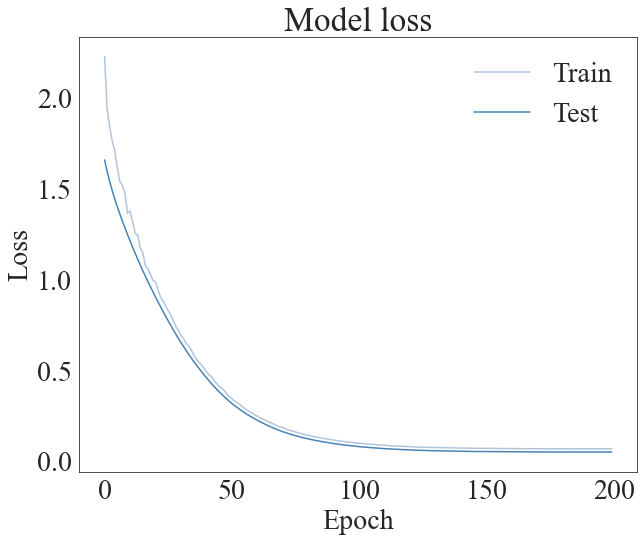

In [82]:
# Select predictor columns
predictor_columns = ['Pig_Count', 'Sky_Light_Rain', 'Rice', 'Plantation', 'Village', 'Bare_Earth']

# Select target columns
target_columns = ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Annularis', 'An._Nitidus']

X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Function to create and compile the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', 
                    kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise and train the model
model = create_model()
history = model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=200, batch_size=32)

# Make predictions on the test set
Y_pred = model.predict(X_test_scaled)

# Print performance metrics
mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('MAE:', mean_absolute_error(Y_test, Y_pred))
for i in range(Y_test.shape[1]):
    print(f"R^2 for target variable {i}: ", r2_score(Y_test.iloc[:, i].values, Y_pred[:, i]))

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train_scaled):
    model_cv = create_model()
    model_cv.fit(X_train_scaled[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0)
    Y_pred_cv = model_cv.predict(X_train_scaled[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
    
# Calculate and print the average RMSE from 10-fold CV
cv_rmse = np.sqrt(np.mean(cv_scores))
print("10-fold CV RMSE:", cv_rmse)
    
# Plot the training and validation loss history
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()

### An. Maculatus

3/3 [==============================] - 0s 6ms/step
Target Variable: An._Maculatus
MSE: 0.10981768836831791
RMSE: 0.33138751993446874
MAE: 0.23453040421009064
R^2: -0.004047436510335123

1/1 [==============================] - 0s 55ms/step
10-fold CV RMSE: 0.3547158351674242


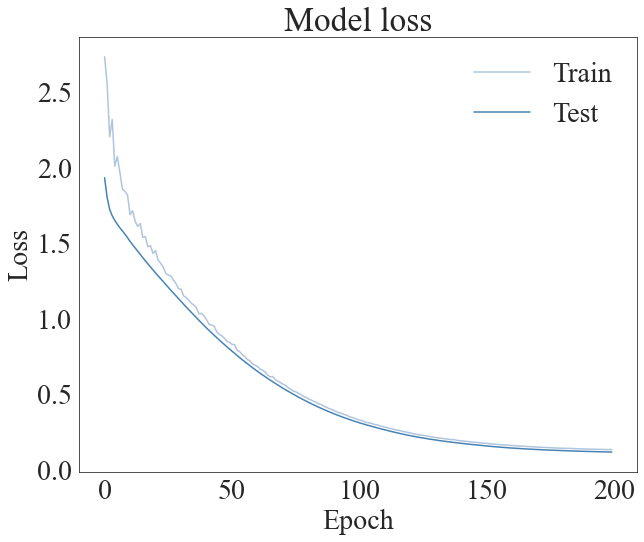

In [83]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Select target columns
target_columns = ['An._Maculatus']

# Prepare predictor and target datasets
X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data using StandardScaler
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', 
                    kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Create the model
model = create_model()

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Fit the model and record the history
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Print performance metrics for each target variable
for i in range(Y_test.shape[1]):
    mse = mean_squared_error(Y_test.iloc[:, i], Y_pred[:, i])
    print('Target Variable:', target_columns[i])
    print('MSE:', mse)
    print('RMSE:', np.sqrt(mse))
    print('MAE:', mean_absolute_error(Y_test.iloc[:, i], Y_pred[:, i]))
    print("R^2:", r2_score(Y_test.iloc[:, i], Y_pred[:, i]))
    print()

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train):
    model_cv = create_model()
    model_cv.fit(X_train[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0)
    Y_pred_cv = model_cv.predict(X_train[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
cv_rmse = np.sqrt(np.mean(cv_scores))
print('10-fold CV RMSE:', cv_rmse)

# Plot history for loss on training and validation set
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()

### An. Pseudowillmori

3/3 [==============================] - 0s 2ms/step
MSE: 0.05040624673841383
RMSE: 0.22451335536759018
MAE: 0.1435186210088432
R^2: -0.06118414186134413
1/1 [==============================] - 0s 55ms/step
10-fold CV RMSE: 0.31038802245115416


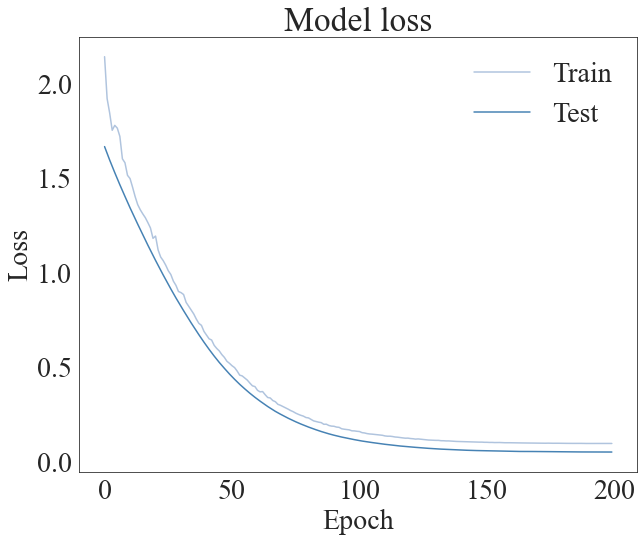

In [84]:
# Select predictor columns
predictor_columns = ['Pig_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Select target columns
target_columns = ['An._Pseudowillmori']

# Prepare predictor and target datasets
X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data using StandardScaler
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', 
                    kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Create the model
model = create_model()

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Fit the model and record the history
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Print performance metrics
mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('MAE:', mean_absolute_error(Y_test, Y_pred))
print("R^2:", r2_score(Y_test, Y_pred))

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train):
    model_cv = create_model()
    model_cv.fit(X_train[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0)
    Y_pred_cv = model_cv.predict(X_train[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
cv_rmse = np.sqrt(np.mean(cv_scores))
print('10-fold CV RMSE:', cv_rmse)

# Plot history for loss on training and validation set
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()

### An. Jeyporiensis

3/3 [==============================] - 0s 5ms/step
MSE: 0.059327898981369254
RMSE: 0.24357319019417809
MAE: 0.14089578576385975
R^2: -0.012529475948702018
1/1 [==============================] - 0s 58ms/step
10-fold CV RMSE: 0.28664768673101776


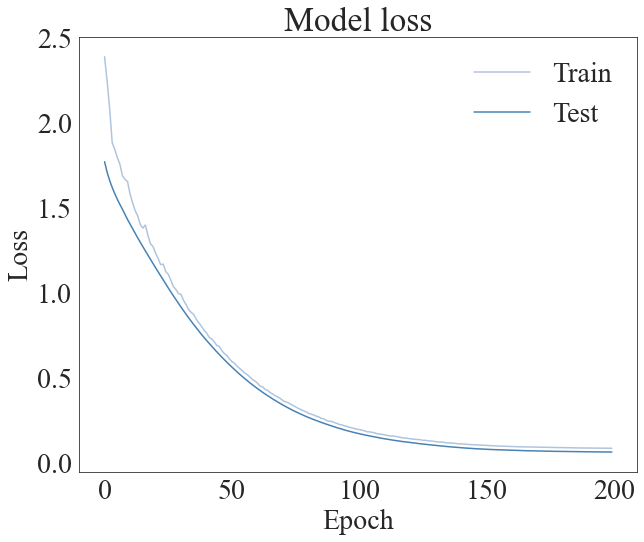

In [85]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Select target columns
target_columns = ['An._Jeyporiensis']

# Prepare predictor and target datasets
X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data using StandardScaler
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', 
                    kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Create the model
model = create_model()

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Fit the model and record the history
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Print performance metrics
mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('MAE:', mean_absolute_error(Y_test, Y_pred))
print("R^2:", r2_score(Y_test, Y_pred))

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train):
    model_cv = create_model()
    model_cv.fit(X_train[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0)
    Y_pred_cv = model_cv.predict(X_train[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
cv_rmse = np.sqrt(np.mean(cv_scores))
print('10-fold CV RMSE:', cv_rmse)

# Plot history for loss on training and validation set
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()

### An. Annularis

3/3 [==============================] - 0s 2ms/step
MSE: 0.01235602507555905
RMSE: 0.11115765864554296
MAE: 0.021271509118378162
R^2: -0.0009944365009864065
1/1 [==============================] - 0s 55ms/step
10-fold CV RMSE: 0.09371740056524688


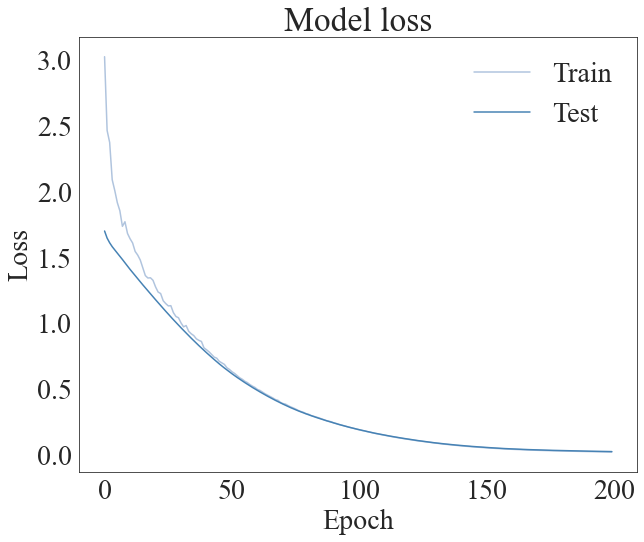

In [86]:
# Select predictor columns
predictor_columns = ['Cat_Count', 'Rice', 'Open_Forest', 'Closed_Forest', 'Village', 'Bare_Earth']

# Select target columns
target_columns = ['An._Annularis']

# Prepare predictor and target datasets
X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data using StandardScaler
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', 
                    kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Create the model
model = create_model()

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Fit the model and record the history
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Print performance metrics
mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('MAE:', mean_absolute_error(Y_test, Y_pred))
print("R^2:", r2_score(Y_test, Y_pred))

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train):
    model_cv = create_model()
    model_cv.fit(X_train[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0)
    Y_pred_cv = model_cv.predict(X_train[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
cv_rmse = np.sqrt(np.mean(cv_scores))
print('10-fold CV RMSE:', cv_rmse)

# Plot history for loss on training and validation set
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()

### An. Nitidus

3/3 [==============================] - 0s 2ms/step
MSE: 0.01244439549415848
RMSE: 0.11155445080389433
MAE: 0.03446891722269356
R^2: -0.00815355902043402
1/1 [==============================] - 0s 56ms/step
10-fold CV RMSE: 0.14695925196276668


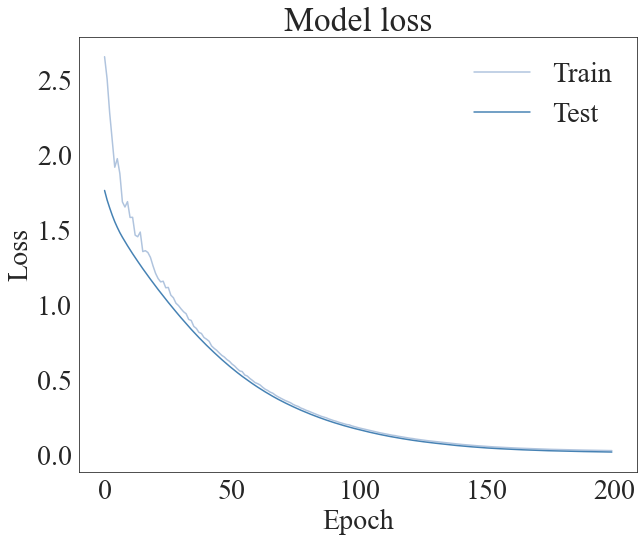

In [87]:
# Select predictor columns
predictor_columns = ['Sky_Light_Rain', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Select target columns
target_columns = ['An._Nitidus']

# Prepare predictor and target datasets
X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data using StandardScaler
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', 
                    kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Create the model
model = create_model()

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Fit the model and record the history
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Print performance metrics
mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('MAE:', mean_absolute_error(Y_test, Y_pred))
print("R^2:", r2_score(Y_test, Y_pred))

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train):
    model_cv = create_model()
    model_cv.fit(X_train[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0)
    Y_pred_cv = model_cv.predict(X_train[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
cv_rmse = np.sqrt(np.mean(cv_scores))
print('10-fold CV RMSE:', cv_rmse)

# Plot history for loss on training and validation set
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()

# __Modelling for Nartiang__

## __Generalised Linear Model (GLM)__

### An. Maculatus

In [88]:
# Load the data
data = nartiang1000

# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village',  'Bare_Earth']

# Select target column
target_column = 'An._Maculatus'

# Extract predictor and target data
Y = data[target_column]
X = data[predictor_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Create a GLM Model with Gaussian distribution
model = TweedieRegressor(power=0, alpha=0.5, link='log')

# Fit the model to the training data
model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test_scaled)

# Print the MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Print the MSE
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Print the RMSE
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Define a pipeline that applies the scaler and the model
pipeline = make_pipeline(scaler, model)

# Perform 10-fold CV
cv_scores = cross_val_score(pipeline, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Absolute Error: 0.20957603480812126
Mean Squared Error: 0.11368876100294094
Root Mean Squared Error: 0.3371776401289696
R2 Score: -0.002355909509262677
10-fold CV RMSE:  0.3116349434151475


### An. Pseudowillmori

In [89]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Select target column
target_column = 'An._Pseudowillmori'

# Extract predictor and target data
Y = data[target_column]
X = data[predictor_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Create a GLM Model with Gaussian distribution
model = TweedieRegressor(power=0, alpha=0.5, link='log')

# Fit the model to the training data
model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test_scaled)

# Print the MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Print the MSE
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Print the RMSE
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Define a pipeline that applies the scaler and the model
pipeline = make_pipeline(scaler, model)

# Perform 10-fold CV
cv_scores = cross_val_score(pipeline, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Absolute Error: 0.37818595571357116
Mean Squared Error: 0.16800194724110137
Root Mean Squared Error: 0.40988040602241693
R2 Score: -0.06754390499150276
10-fold CV RMSE:  0.44538785243818013


### An. Jeyporiensis

In [90]:
# Select predictor columns
predictor_columns =['Chicken_Count', 'Open_Forest', 'Closed_Forest', 'Plantation',  'Village', 'Bare_Earth']

# Select target column
target_column = 'An._Jeyporiensis'

# Extract predictor and target data
Y = data[target_column]
X = data[predictor_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Create a GLM Model with Gaussian distribution
model = TweedieRegressor(power=0, alpha=0.5, link='log')

# Fit the model to the training data
model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test_scaled)

# Print the MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Print the MSE
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Print the RMSE
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Define a pipeline that applies the scaler and the model
pipeline = make_pipeline(scaler, model)

# Perform 10-fold CV
cv_scores = cross_val_score(pipeline, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Absolute Error: 0.17450448504440774
Mean Squared Error: 0.07197086897038163
Root Mean Squared Error: 0.26827386933948977
R2 Score: -0.023800731034134603
10-fold CV RMSE:  0.2856334570597152


### An. Nivipes

In [91]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village',  'Bare_Earth']

# Select target column
target_column = 'An._Nivipes'

# Extract predictor and target data
Y = data[target_column]
X = data[predictor_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Create a GLM Model with Gaussian distribution
model = TweedieRegressor(power=0, alpha=0.5, link='log')

# Fit the model to the training data
model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test_scaled)

# Print the MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Print the MSE
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Print the RMSE
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Define a pipeline that applies the scaler and the model
pipeline = make_pipeline(scaler, model)

# Perform 10-fold CV
cv_scores = cross_val_score(pipeline, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Absolute Error: 0.11515036829832306
Mean Squared Error: 0.060999400028712625
Root Mean Squared Error: 0.24698056609521452
R2 Score: -0.0005793058973326826
10-fold CV RMSE:  0.20273548331751917


### An. Nitidus

In [92]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Select target column
target_column = 'An._Nitidus'

# Extract predictor and target data
Y = data[target_column]
X = data[predictor_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Create a GLM Model with Gaussian distribution
model = TweedieRegressor(power=0, alpha=0.5, link='log')

# Fit the model to the training data
model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test_scaled)

# Print the MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Print the MSE
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Print the RMSE
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Define a pipeline that applies the scaler and the model
pipeline = make_pipeline(scaler, model)

# Perform 10-fold CV
cv_scores = cross_val_score(pipeline, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Absolute Error: 0.09242419265352912
Mean Squared Error: 0.041677573460416985
Root Mean Squared Error: 0.20415085956325774
R2 Score: -0.002156198207299509
10-fold CV RMSE:  0.1885102232137891


## __Random Forest Regressor Model__

  ### All 5 Mosquito Species

In [93]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']

# Select target columns
target_columns = ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Nivipes', 'An._Nitidus']

X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Create a pipeline that scales the data and then runs the random forest regressor
pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=0))
])

# Create the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 500, 1000],
    'regressor__max_depth': [None, 5, 10, 15, 20],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best parameters
CV_model = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train)

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print the performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.named_steps['regressor'].feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(CV_model, X, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Squared Error: [0.10912811 0.17031095 0.07725804 0.06143613 0.04140451]
Root Mean Squared Error: [0.33034544 0.41268747 0.27795331 0.24786313 0.20348099]
Mean Absolute Error: [0.2030763  0.37236801 0.17304366 0.1153594  0.08654367]
R2 Score: -0.029341508738618384
Feature Importances: [0.09219011 0.14064455 0.2001425  0.15658074 0.23868223 0.17175987]
10-fold CV RMSE:  0.29048333290871775


### An. Maculatus

In [94]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Scale predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select target columns
target_columns = ['An._Maculatus']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.26, random_state=0)

# Create the Random Forest Regressor model
model = RandomForestRegressor(random_state=0)

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best parameters
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train.values.ravel())  # Convert Y_train to a 1D array

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print the performance metrics
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(CV_model.best_estimator_, X_scaled, Y.values.ravel(), cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())


Mean Squared Error: 0.11374629197561459
Root Mean Squared Error: 0.3372629418949176
Mean Absolute Error: 0.203585925101667
R2 Score: -0.002863140918335505
Feature Importances: [0.08096456 0.16718894 0.19433196 0.204094   0.19453812 0.15888242]
10-fold CV RMSE:  0.313032095192109


### An. Pseudowillmori

In [95]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Scale predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select target columns
target_columns = ['An._Pseudowillmori']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.26, random_state=0)

# Create the Random Forest Regressor model
model = RandomForestRegressor(random_state=0)

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best parameters
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train)

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print the performance metrics
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(CV_model.best_estimator_, X_scaled, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Squared Error: 0.16990360119671727
Root Mean Squared Error: 0.41219364526484065
Mean Absolute Error: 0.374068819163085
R2 Score: -0.07962768808484588
Feature Importances: [0.10227796 0.15619301 0.15403805 0.14667099 0.22868889 0.21213109]
10-fold CV RMSE:  0.44712402818409036


### An. Jeyporiensis

In [96]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Scale predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select target columns
target_columns = ['An._Jeyporiensis']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.26, random_state=0)

# Create the Random Forest Regressor model
model = RandomForestRegressor(random_state=0)

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best parameters
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train)

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print the performance metrics
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(CV_model.best_estimator_, X_scaled, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Squared Error: 0.08703228692793576
Root Mean Squared Error: 0.2950123504667826
Mean Absolute Error: 0.16386541199248275
R2 Score: -0.23805256564377864
Feature Importances: [0.10902192 0.23946509 0.17177521 0.20977476 0.12810334 0.14185969]
10-fold CV RMSE:  0.2903841741130981


### An. Nivipes

In [97]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Scale predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select target columns
target_columns = ['An._Nivipes']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.26, random_state=0)

# Create the Random Forest Regressor model
model = RandomForestRegressor(random_state=0)

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best parameters
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train)

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print the performance metrics
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(CV_model.best_estimator_, X_scaled, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Squared Error: 0.05662735759997399
Root Mean Squared Error: 0.23796503440626313
Mean Absolute Error: 0.11440485860869462
R2 Score: 0.07113574665469014
Feature Importances: [0.14049601 0.17358258 0.16744042 0.14373008 0.22307781 0.1516731 ]
10-fold CV RMSE:  0.22269943047182544


### An. Nitidus

In [98]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Scale predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select target columns
target_columns = ['An._Nitidus']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.26, random_state=0)

# Create the Random Forest Regressor model
model = RandomForestRegressor(random_state=0)

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best parameters
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_model.fit(X_train, Y_train)

# Use the best model from RandomizedSearchCV to make predictions
Y_pred = CV_model.best_estimator_.predict(X_test)

# Print the performance metrics
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Print feature importances
importances = CV_model.best_estimator_.feature_importances_
print("Feature Importances:", importances)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(CV_model.best_estimator_, X_scaled, Y, cv=10, scoring='neg_root_mean_squared_error')
print("10-fold CV RMSE: ", -cv_scores.mean())

Mean Squared Error: 0.040803587455108585
Root Mean Squared Error: 0.2019989788466976
Mean Absolute Error: 0.07978617539879991
R2 Score: 0.018859192556707205
Feature Importances: [0.06079013 0.17077106 0.18922207 0.20259751 0.14617422 0.23044503]
10-fold CV RMSE:  0.20377079179018348


## __XGBoost Model__

### All 5 Mosquito Species

In [99]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Nivipes', 'An._Nitidus'] 
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialise the base model
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialise the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initialise the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to the data and find the best parameters
grid_search.fit(X_train, Y_train)

# Print the best parameters
print(grid_search.best_params_)

# Use the best model to predict on the test set
model_best = grid_search.best_estimator_

# Predict on the test set using the best model
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", np.mean(mse))

rmse = np.sqrt(np.mean(mse))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
print("10-fold CV RMSE: ", np.sqrt(-cv_scores.mean()))

{'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__min_child_weight': 4, 'estimator__n_estimators': 200, 'estimator__subsample': 1}
Mean Squared Error: 0.09616212021753114
Root Mean Squared Error: 0.3101001777128338
Mean Absolute Error: [0.24169277 0.39111708 0.20908315 0.1685714  0.14282879]
R2 Score: -0.09258820698579869
10-fold CV RMSE:  0.33127423336445294


 ### An. Maculatus

In [100]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village',  'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Maculatus'] 
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialise the base model
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initialise the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to the data and find the best parameters
grid_search.fit(X_train, Y_train)

# Print the best parameters
print(grid_search.best_params_)

# Use the best model to predict on the test set
model_best = grid_search.best_estimator_

# Predict on the test set using the best model
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", np.mean(mse))

rmse = np.sqrt(np.mean(mse))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
print("10-fold CV RMSE: ", np.sqrt(-cv_scores.mean()))

{'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__min_child_weight': 2, 'estimator__n_estimators': 200, 'estimator__subsample': 0.5}
Mean Squared Error: 0.11258730325281195
Root Mean Squared Error: 0.3355403153911791
Mean Absolute Error: [0.2417518]
R2 Score: 0.007355276321041049
10-fold CV RMSE:  0.3250721271676456


### An. Pseudowillmori

In [101]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Pseudowillmori'] 
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialise the base model
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialise the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initializs the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to the data and find the best parameters
grid_search.fit(X_train, Y_train)

# Print the best parameters
print(grid_search.best_params_)

# Use the best model to predict on the test set
model_best = grid_search.best_estimator_

# Predict on the test set using the best model
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", np.mean(mse))

rmse = np.sqrt(np.mean(mse))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
print("10-fold CV RMSE: ", np.sqrt(-cv_scores.mean()))

{'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__min_child_weight': 4, 'estimator__n_estimators': 200, 'estimator__subsample': 1}
Mean Squared Error: 0.17627924421625282
Root Mean Squared Error: 0.4198562185037311
Mean Absolute Error: [0.39111708]
R2 Score: -0.1201407830678407
10-fold CV RMSE:  0.4573147415435976


### An. Jeyporiensis

In [102]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Open_Forest', 'Closed_Forest', 'Plantation',  'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Jeyporiensis'] 
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialise the base model
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialise the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initialise the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to the data and find the best parameters
grid_search.fit(X_train, Y_train)

# Print the best parameters
print(grid_search.best_params_)

# Use the best model to predict on the test set
model_best = grid_search.best_estimator_

# Predict on the test set using the best model
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", np.mean(mse))

rmse = np.sqrt(np.mean(mse))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
print("10-fold CV RMSE: ", np.sqrt(-cv_scores.mean()))

{'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__min_child_weight': 1, 'estimator__n_estimators': 200, 'estimator__subsample': 1}
Mean Squared Error: 0.0847369536645017
Root Mean Squared Error: 0.2910961244408824
Mean Absolute Error: [0.20980224]
R2 Score: -0.20540096775855865
10-fold CV RMSE:  0.33136871128219353


### An. Nivipes

In [103]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village',  'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Nivipes'] 
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialise the base model
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialise the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initialise the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to the data and find the best parameters
grid_search.fit(X_train, Y_train)

# Print the best parameters
print(grid_search.best_params_)

# Use the best model to predict on the test set
model_best = grid_search.best_estimator_


# Predict on the test set using the best model
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", np.mean(mse))

rmse = np.sqrt(np.mean(mse))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
print("10-fold CV RMSE: ", np.sqrt(-cv_scores.mean()))

{'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__min_child_weight': 4, 'estimator__n_estimators': 200, 'estimator__subsample': 0.7}
Mean Squared Error: 0.06412299909104995
Root Mean Squared Error: 0.25322519442395525
Mean Absolute Error: [0.16933565]
R2 Score: -0.05181601609815267
10-fold CV RMSE:  0.25309868123642226


### An. Nitidus

In [104]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Nitidus'] 
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialise the base model
xgb_base = xgb.XGBRegressor(objective='reg:squarederror')

# Initialise the MultiOutputRegressor with XGBoost as the base estimator
model = MultiOutputRegressor(xgb_base)

# Define parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 500],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 4],
    'estimator__subsample': [0.5, 0.7, 1]
}

# Initialise the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to the data and find the best parameters
grid_search.fit(X_train, Y_train)

# Print the best parameters
print(grid_search.best_params_)

# Use the best model to predict on the test set
model_best = grid_search.best_estimator_

# Predict on the test set using the best model
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", np.mean(mse))

rmse = np.sqrt(np.mean(mse))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform cross-validation on the training data using the best model
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
print("10-fold CV RMSE: ", np.sqrt(-cv_scores.mean()))

{'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__min_child_weight': 4, 'estimator__n_estimators': 200, 'estimator__subsample': 0.5}
Mean Squared Error: 0.045560268472152575
Root Mean Squared Error: 0.21344851480427915
Mean Absolute Error: [0.13741375]
R2 Score: -0.0955173646258507
10-fold CV RMSE:  0.24401033617336068


## __Support Vector Machine__

 ### All 5 Mosquito Species

In [ ]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Annularis', 'An._Nitidus']  
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

### An. Maculatus

In [105]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village',  'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Maculatus']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

Mean Squared Error: [0.11111391]
Root Mean Squared Error: [0.33333754]
Mean Absolute Error: [0.19441006]
R2 Score: 0.020345669168014835
10-fold CV RMSE: 0.3123359914459799
Best Hyperparameters:
{'estimator__C': 1, 'estimator__epsilon': 0.1, 'estimator__kernel': 'rbf'}


### An. Pseudowillmori

In [ ]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Pseudowillmori']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

### An. Jeyporiensis

In [106]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Open_Forest', 'Closed_Forest', 'Plantation',  'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Jeyporiensis']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

Mean Squared Error: [0.07090481]
Root Mean Squared Error: [0.26627957]
Mean Absolute Error: [0.16101428]
R2 Score: -0.008635777188989113
10-fold CV RMSE: 0.318987545088804
Best Hyperparameters:
{'estimator__C': 0.1, 'estimator__epsilon': 0.1, 'estimator__kernel': 'rbf'}


### An. Nivipes

In [107]:
# Select predictor columns
predictor_columns = ['Rice', 'Open_Forest', 'Closed_Forest', 'Plantation', 'Village',  'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Nivipes']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

Mean Squared Error: [0.06402324]
Root Mean Squared Error: [0.25302814]
Mean Absolute Error: [0.0739449]
R2 Score: -0.05017962557743849
10-fold CV RMSE: 0.23712945651423908
Best Hyperparameters:
{'estimator__C': 10, 'estimator__epsilon': 0.01, 'estimator__kernel': 'linear'}


### An. Nitidus

In [ ]:
# Select predictor columns
predictor_columns = ['Chicken_Count', 'Rice', 'Open_Forest', 'Plantation', 'Village', 'Bare_Earth']
X = data[predictor_columns]

# Select target columns
target_columns = ['An._Nitidus']
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Create a MultiOutputRegressor with Support Vector Regression (SVR) as the base estimator
model = MultiOutputRegressor(SVR())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.2],
    'estimator__kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Use the best model from GridSearchCV to make predictions
model_best = grid_search.best_estimator_
Y_pred = model_best.predict(X_test)

# Calculate additional performance metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error:", mae)

# Print the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Perform 10-fold CV and print the average RMSE
cv_scores = cross_val_score(model_best, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("10-fold CV RMSE:", cv_rmse)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

## __Neural Networks__

### All 5 Mosquito Species

3/3 [==============================] - 0s 2ms/step
MSE: 0.09149006829677948
RMSE: 0.3024732522005532
MAE: 0.19498674924606862
R^2 for target variable 0:  -0.005245570219646778
R^2 for target variable 1:  -0.07196491301048691
R^2 for target variable 2:  -0.02389323375734209
R^2 for target variable 3:  -0.000678462923365597
R^2 for target variable 4:  -0.003977607456830956
1/1 [==============================] - 0s 55ms/step
10-fold CV RMSE: 0.32118279749679607


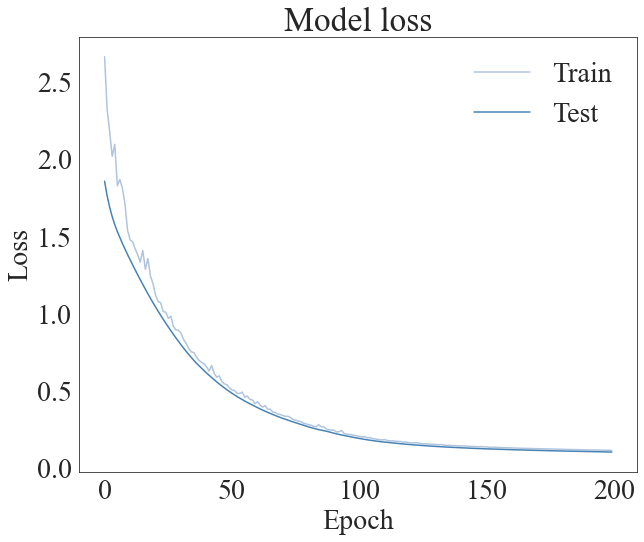

In [108]:
# Select predictor columns
predictor_columns = ['Latitude', 'Longitude', 'Elevation', 'Open_Forest', 'Village',
       'Bare_Earth']

# Select target columns
target_columns = ['An._Maculatus', 'An._Pseudowillmori', 'An._Jeyporiensis', 'An._Nivipes', 'An._Nitidus']
X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Create the model
model = create_model()

# Fit the model and record the history
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=0)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Print performance metrics
mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('MAE:', mean_absolute_error(Y_test, Y_pred))
for i in range(Y_test.shape[1]):
    print(f"R^2 for target variable {i}: ", r2_score(Y_test.iloc[:, i].values, Y_pred[:, i]))

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train):
    model_cv = create_model()
    model_cv.fit(X_train[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0)
    Y_pred_cv = model_cv.predict(X_train[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
cv_rmse = np.sqrt(np.mean(cv_scores))
print('10-fold CV RMSE:', cv_rmse)

# Plot history for loss on training and validation set
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()

### An. Maculatus

3/3 [==============================] - 0s 2ms/step
Target Variable: An._Maculatus
MSE: 0.11401367795418312
RMSE: 0.33765911501717694
MAE: 0.2088574154059524
R^2: -0.00522059396271457

1/1 [==============================] - 0s 55ms/step
10-fold CV RMSE: 0.31093070271624584


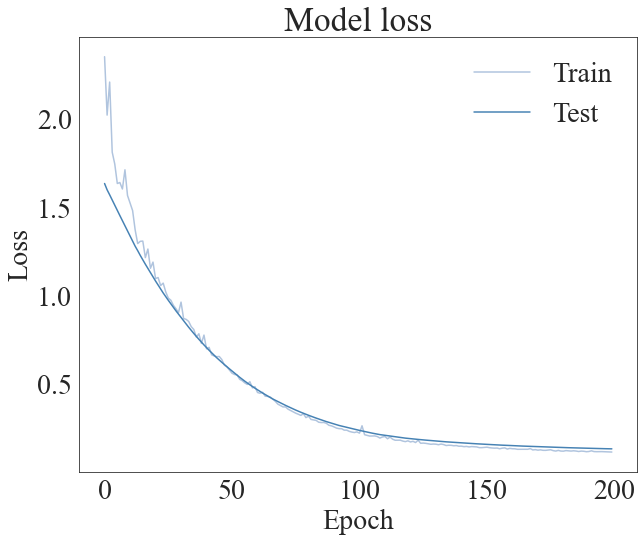

In [109]:
# Select predictor columns
predictor_columns = ['Longitude', 'Elevation', 'Open_Forest', 'Closed_Forest', 'Plantation',
       'Village']

# Select target columns
target_columns = ['An._Maculatus']
X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Create the model
model = create_model()

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Fit the model and record the history
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Print performance metrics
for i in range(Y_test.shape[1]):
    mse = mean_squared_error(Y_test.iloc[:, i], Y_pred[:, i])
    print('Target Variable:', target_columns[i])
    print('MSE:', mse)
    print('RMSE:', np.sqrt(mse))
    print('MAE:', mean_absolute_error(Y_test.iloc[:, i], Y_pred[:, i]))
    print("R^2:", r2_score(Y_test.iloc[:, i], Y_pred[:, i]))
    print()

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train):
    model_cv = create_model()
    model_cv.fit(X_train[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])
    Y_pred_cv = model_cv.predict(X_train[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
cv_rmse = np.sqrt(np.mean(cv_scores))
print('10-fold CV RMSE:', cv_rmse)

# Plot history for loss on training and validation set
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()

### An. Pseudowillmori

3/3 [==============================] - 0s 2ms/step
Target Variable: An._Pseudowillmori
MSE: 0.16781197796651912
RMSE: 0.40964860303254924
MAE: 0.3769378195638242
R^2: -0.06633677290436757

1/1 [==============================] - 0s 57ms/step
10-fold CV RMSE: 0.4596533711749129


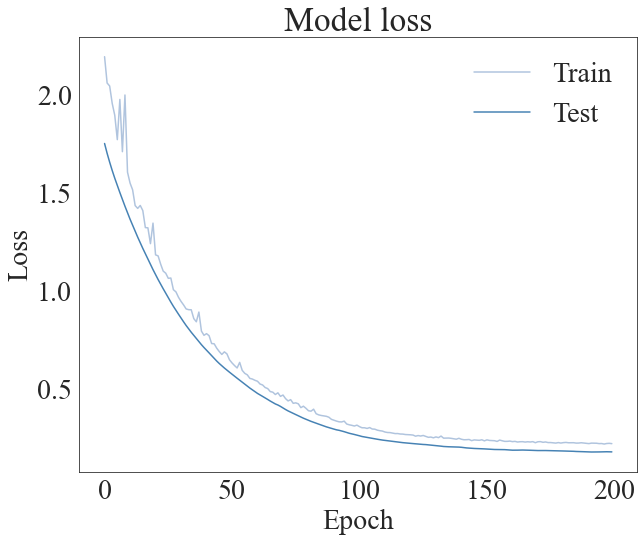

In [110]:
# Select predictor columns
predictor_columns = ['Latitude', 'Longitude', 'Elevation', 'Rice', 'Village', 'Bare_Earth']

# Select target columns
target_columns = ['An._Pseudowillmori']
X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Create the model
model = create_model()

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Fit the model and record the history
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Print performance metrics
for i in range(Y_test.shape[1]):
    mse = mean_squared_error(Y_test.iloc[:, i], Y_pred[:, i])
    print('Target Variable:', target_columns[i])
    print('MSE:', mse)
    print('RMSE:', np.sqrt(mse))
    print('MAE:', mean_absolute_error(Y_test.iloc[:, i], Y_pred[:, i]))
    print("R^2:", r2_score(Y_test.iloc[:, i], Y_pred[:, i]))
    print()

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train):
    model_cv = create_model()
    model_cv.fit(X_train[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])
    Y_pred_cv = model_cv.predict(X_train[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
cv_rmse = np.sqrt(np.mean(cv_scores))
print('10-fold CV RMSE:', cv_rmse)

# Plot history for loss on training and validation set
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()

### An. Jeyporiensis

3/3 [==============================] - 0s 3ms/step
Target Variable: An._Jeyporiensis
MSE: 0.07159254274145496
RMSE: 0.267567828300517
MAE: 0.1711030471260133
R^2: -0.018418960947352625

1/1 [==============================] - 0s 56ms/step
10-fold CV RMSE: 0.3196168452095837


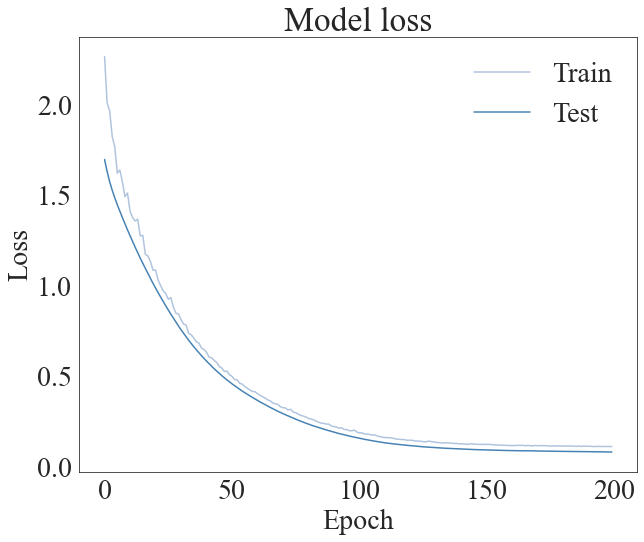

In [111]:
# Select predictor columns
predictor_columns = ['Elevation', 'Chicken_Count', 'Rice', 'Open_Forest', 'Plantation',
       'Bare_Earth']

# Select target columns
target_columns = ['An._Jeyporiensis']
X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Create the model
model = create_model()

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Fit the model and record the history
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Print performance metrics
for i in range(Y_test.shape[1]):
    mse = mean_squared_error(Y_test.iloc[:, i], Y_pred[:, i])
    print('Target Variable:', target_columns[i])
    print('MSE:', mse)
    print('RMSE:', np.sqrt(mse))
    print('MAE:', mean_absolute_error(Y_test.iloc[:, i], Y_pred[:, i]))
    print("R^2:", r2_score(Y_test.iloc[:, i], Y_pred[:, i]))
    print()

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train):
    model_cv = create_model()
    model_cv.fit(X_train[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])
    Y_pred_cv = model_cv.predict(X_train[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
cv_rmse = np.sqrt(np.mean(cv_scores))
print('10-fold CV RMSE:', cv_rmse)

# Plot history for loss on training and validation set
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()

### An. Nivipes

3/3 [==============================] - 0s 2ms/step
Target Variable: An._Nivipes
MSE: 0.061036345571906285
RMSE: 0.24705534920722985
MAE: 0.11453630682080984
R^2: -0.0011853273655324514

1/1 [==============================] - 0s 59ms/step
10-fold CV RMSE: 0.2332073025634141


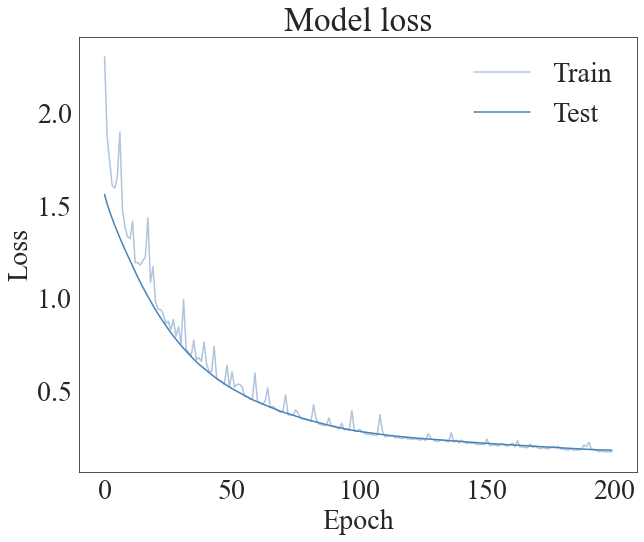

In [112]:
# Select predictor columns
predictor_columns = ['Latitude', 'Elevation', 'Rice', 'Open_Forest', 'Closed_Forest',
       'Village']

# Select target columns
target_columns = ['An._Nivipes']
X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Create the model
model = create_model()

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Fit the model and record the history
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Print performance metrics
for i in range(Y_test.shape[1]):
    mse = mean_squared_error(Y_test.iloc[:, i], Y_pred[:, i])
    print('Target Variable:', target_columns[i])
    print('MSE:', mse)
    print('RMSE:', np.sqrt(mse))
    print('MAE:', mean_absolute_error(Y_test.iloc[:, i], Y_pred[:, i]))
    print("R^2:", r2_score(Y_test.iloc[:, i], Y_pred[:, i]))
    print()

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train):
    model_cv = create_model()
    model_cv.fit(X_train[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])
    Y_pred_cv = model_cv.predict(X_train[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
cv_rmse = np.sqrt(np.mean(cv_scores))
print('10-fold CV RMSE:', cv_rmse)

# Plot history for loss on training and validation set
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()

### An. Nitidus

3/3 [==============================] - 0s 2ms/step
Target Variable: An._Nitidus
MSE: 0.0416762069854787
RMSE: 0.2041475128074763
MAE: 0.09175575451682443
R^2: -0.0021233406962835044

1/1 [==============================] - 0s 59ms/step
10-fold CV RMSE: 0.22626721121894966


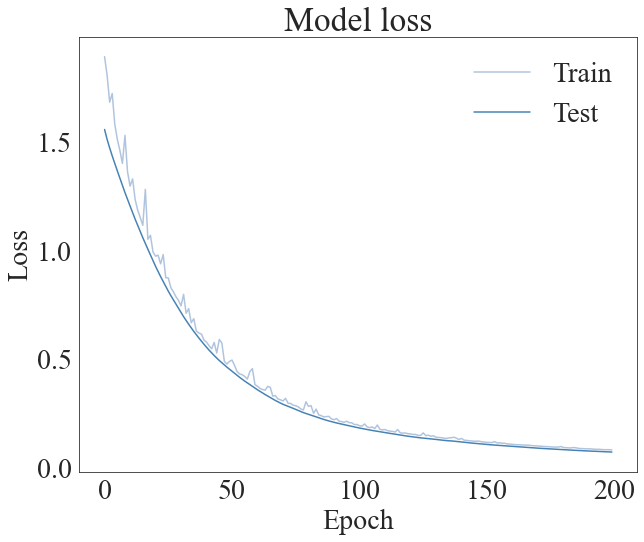

In [113]:
# Select predictor columns
predictor_columns = ['Latitude', 'Elevation', 'Rice', 'Open_Forest', 'Village',
       'Bare_Earth']

# Select target columns
target_columns = ['An._Nitidus']
X = data[predictor_columns]
Y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

# Scale the input data
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Create the model
model = create_model()

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Fit the model and record the history
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Print performance metrics
for i in range(Y_test.shape[1]):
    mse = mean_squared_error(Y_test.iloc[:, i], Y_pred[:, i])
    print('Target Variable:', target_columns[i])
    print('MSE:', mse)
    print('RMSE:', np.sqrt(mse))
    print('MAE:', mean_absolute_error(Y_test.iloc[:, i], Y_pred[:, i]))
    print("R^2:", r2_score(Y_test.iloc[:, i], Y_pred[:, i]))
    print()

# Prepare for 10-fold CV
kf = KFold(n_splits=10)
cv_scores = []

# Perform 10-fold CV manually and print the average RMSE
for train_index, test_index in kf.split(X_train):
    model_cv = create_model()
    model_cv.fit(X_train[train_index], Y_train.iloc[train_index], epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])
    Y_pred_cv = model_cv.predict(X_train[test_index])
    cv_scores.append(mean_squared_error(Y_train.iloc[test_index], Y_pred_cv))
cv_rmse = np.sqrt(np.mean(cv_scores))
print('10-fold CV RMSE:', cv_rmse)

# Plot history for loss on training and validation set
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], color='lightsteelblue')
plt.plot(history.history['val_loss'], color='steelblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.show()